In [152]:
import numpy as np
import pandas as pd

from nltk.corpus import names
import nltk; nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

import re

from pymorphy2 import MorphAnalyzer

from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.models.ldamulticore import LdaMulticore
import gensim

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sych_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
df_sw = pd.read_csv('stopwords.csv', encoding = 'utf-8', sep=";")
for index, row in df_sw.iterrows():
        russian_stopwords.append(row['stopword'])

In [108]:
# Assign spreadsheet filename to `file`
file = 'Все глобалы за существование ЧБ.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

In [154]:
# Print the sheet names
sheet_names_list = xl.sheet_names
df = None

for i in range(len(sheet_names_list)):
    # Load a sheet into a DataFrame by name: df1
    print(f'sheet_names_list={sheet_names_list[i]}')
    df_current = xl.parse(sheet_names_list[i])
    df_current = df_current.loc[:,['mesTExt','type','dialogid', 'Mdate']]
    df_current = df_current.drop_duplicates()

    df_current['Mdate'] = pd.to_datetime(df_current['Mdate'],format='%Y-%m-%d')
    df_current['Mdate'] = df_current['Mdate'].dt.date

    df_filter = df_current['type'].isin([1])
    df1 = df_current[df_filter]

    a = df1.groupby(['dialogid', 'Mdate'])['mesTExt'].transform(lambda answer : " ".join(str(x) for x in answer))
    df12= a.to_frame()

    df4 = pd.concat([df12, df1.loc[:,['dialogid','Mdate']]], axis=1)
    df4 = df4.drop_duplicates()

    #df_filter = df_current['type'].isin([2])
    #df5 = df_current[df_filter]
    #df5 = df5.loc[:,['dialogid', 'Mdate','AgentEmail']]
    #df5 = df5.drop_duplicates()

    #df_req=pd.merge(df4, df5, on=['dialogid', 'Mdate'], how='inner')
    if i>0:
        df = pd.concat([df,df4], axis=0, ignore_index=True, sort=False)
    else:
        df = df4
    
df.to_csv("Заявки в чатбот.csv", encoding = 'utf-16', sep=";", index=False)   


sheet_names_list=май 18
sheet_names_list=Июнь 18
sheet_names_list=Июль 18
sheet_names_list=Авг 18
sheet_names_list=Сент 18
sheet_names_list=Окт 18
sheet_names_list=Ноя 18
sheet_names_list=Дек 18
sheet_names_list=Янв 19
sheet_names_list=Фев 19
sheet_names_list=Март 19
sheet_names_list=Апр 19
sheet_names_list=Май 19
sheet_names_list=Июнь 19
sheet_names_list=Июль 19
sheet_names_list=Авг 19
sheet_names_list=Сен 19
sheet_names_list=Окт 19
sheet_names_list=Ноя 19
sheet_names_list=Дек 19
sheet_names_list=Янв 20
sheet_names_list=Фев 20
sheet_names_list=Март 20
sheet_names_list=Апр 20


In [155]:
deleted_symbols = r'[\\\\\'[\]!"$%&()*+,-./:;<=>?@^_`{|}~«»\n]'
func = lambda text : re.sub(deleted_symbols, ' ', text)
df["without_punctuation_text"] = df["mesTExt"].apply(func)

In [156]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
func = lambda text : re.sub(emoji_pattern, ' ', text)
df["without_punctuation_text"] = df["without_punctuation_text"].apply(func)

In [157]:
df.head()

mesTExt  dialogid       Mdate  \
0                                       124 1 Привет   2792215  2018-05-19   
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...   2792225  2018-05-19   
2  Привет Хабаровск 11 У меня сломался ноутбук Не...   2792454  2018-05-19   
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...   2792602  2018-05-19   
4                                             Привет   2792225  2018-05-20   

                            without_punctuation_text  
0                                       124 1 Привет  
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...  
2  Привет Хабаровск 11 У меня сломался ноутбук Не...  
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...  
4                                             Привет

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24380 entries, 0 to 24379
Data columns (total 4 columns):
mesTExt                     24380 non-null object
dialogid                    24380 non-null int64
Mdate                       24380 non-null object
without_punctuation_text    24380 non-null object
dtypes: int64(1), object(3)
memory usage: 762.0+ KB


In [120]:
df.head()

mesTExt  dialogid       Mdate  \
0                                       124 1 Привет   2792215  2018-05-19   
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...   2792225  2018-05-19   
2  Привет Хабаровск 11 У меня сломался ноутбук Не...   2792454  2018-05-19   
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...   2792602  2018-05-19   
4                                             Привет   2792225  2018-05-20   

                            without_punctuation_text  
0                                       124 1 Привет  
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...  
2  Привет Хабаровск 11 У меня сломался ноутбук Не...  
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...  
4                                             Привет

In [138]:
df1 = df.drop(["mesTExt"], axis=1)
df1.to_csv("Заявки в чатбот (без пунктуации).csv", encoding = 'utf-16', sep=";", index=False) 

In [159]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem.isdigit() == False])   
df['without_numbers_text'] = df["without_punctuation_text"].apply(func)
df.head()

mesTExt  dialogid       Mdate  \
0                                       124 1 Привет   2792215  2018-05-19   
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...   2792225  2018-05-19   
2  Привет Хабаровск 11 У меня сломался ноутбук Не...   2792454  2018-05-19   
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...   2792602  2018-05-19   
4                                             Привет   2792225  2018-05-20   

                            without_punctuation_text  \
0                                       124 1 Привет   
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...   
2  Привет Хабаровск 11 У меня сломался ноутбук Не...   
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...   
4                                             Привет   

                                without_numbers_text  
0                                             Привет  
1  Привет Привет Привет Пока End Привет END ПРиве...  
2  Привет Хабаровск У меня сломался ноутбук Не ра...  
3  Я тут Сок добрый протек Сломан ноутбук ерп вис...  
4                                             Привет

In [160]:
df["tokenized_text"] = df['without_numbers_text']
df = df.drop(["without_numbers_text", "without_punctuation_text"], axis=1)
df.head()

mesTExt  dialogid       Mdate  \
0                                       124 1 Привет   2792215  2018-05-19   
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...   2792225  2018-05-19   
2  Привет Хабаровск 11 У меня сломался ноутбук Не...   2792454  2018-05-19   
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...   2792602  2018-05-19   
4                                             Привет   2792225  2018-05-20   

                                      tokenized_text  
0                                             Привет  
1  Привет Привет Привет Пока End Привет END ПРиве...  
2  Привет Хабаровск У меня сломался ноутбук Не ра...  
3  Я тут Сок добрый протек Сломан ноутбук ерп вис...  
4                                             Привет

In [161]:
n_words = len(set(" ".join(df["tokenized_text"]).split()))
n_words

44813

In [162]:
df["lowercase_text"] = df["tokenized_text"].apply(lambda text : text.lower())
df.head()

mesTExt  dialogid       Mdate  \
0                                       124 1 Привет   2792215  2018-05-19   
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...   2792225  2018-05-19   
2  Привет Хабаровск 11 У меня сломался ноутбук Не...   2792454  2018-05-19   
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...   2792602  2018-05-19   
4                                             Привет   2792225  2018-05-20   

                                      tokenized_text  \
0                                             Привет   
1  Привет Привет Привет Пока End Привет END ПРиве...   
2  Привет Хабаровск У меня сломался ноутбук Не ра...   
3  Я тут Сок добрый протек Сломан ноутбук ерп вис...   
4                                             Привет   

                                      lowercase_text  
0                                             привет  
1  привет привет привет пока end привет end приве...  
2  привет хабаровск у меня сломался ноутбук не ра...  
3  я тут сок добрый протек сломан ноутбук ерп вис...  
4                                             привет

In [12]:
!pip install pymorphy2

In [163]:
df["lemmatized_text"] = df["lowercase_text"]

In [164]:
def to_lemmatize2(df):
    all_word_str = " ".join(df["lowercase_text"])
    all_word_list = all_word_str.split()
    all_unique_word = Series(all_word_list).unique()
    lemmatized_word_dict = {}
    lemmatizer = MorphAnalyzer()
    for word in all_unique_word:
        lemmatized_word_dict[word] = lemmatizer.normal_forms(word)[0]
    lemm_func = lambda text: ' '.join([lemmatized_word_dict[word] for word in text.split()])
    df['lemmatized_text'] = df['lowercase_text'].apply(lemm_func)
    return df, all_unique_word

In [165]:
%%time
df, _ = to_lemmatize2(df)

Wall time: 13.6 s


In [166]:
df.head()

mesTExt  dialogid       Mdate  \
0                                       124 1 Привет   2792215  2018-05-19   
1  Привет Привет Привет Пока 1 End Привет 1 11 EN...   2792225  2018-05-19   
2  Привет Хабаровск 11 У меня сломался ноутбук Не...   2792454  2018-05-19   
3  Я тут 1 11 12 Сок добрый протек Сломан ноутбук...   2792602  2018-05-19   
4                                             Привет   2792225  2018-05-20   

                                      tokenized_text  \
0                                             Привет   
1  Привет Привет Привет Пока End Привет END ПРиве...   
2  Привет Хабаровск У меня сломался ноутбук Не ра...   
3  Я тут Сок добрый протек Сломан ноутбук ерп вис...   
4                                             Привет   

                                      lowercase_text  \
0                                             привет   
1  привет привет привет пока end привет end приве...   
2  привет хабаровск у меня сломался ноутбук не ра...   
3  я тут сок добрый протек сломан ноутбук ерп вис...   
4                                             привет   

                                     lemmatized_text  
0                                             привет  
1  привет привет привет пока end привет end приве...  
2  привет хабаровск у я сломаться ноутбук не рабр...  
3  я тут сок добрый протечь сломать ноутбук ерп в...  
4                                             привет

In [167]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem not in russian_stopwords])   
df['lemmatized_text_del_stop_words'] = df["lemmatized_text"].apply(func)
df.tail(20)

mesTExt  dialogid  \
24360  Добрый день. Не работает апс Выключаешь его, в...  13971309   
24361                                                nan  13881324   
24362  Добрый день.В автозаказе поставщик Новозеланск...  12928130   
24363  Добрый день Не смогу сменить пароль nan но я в...  11858557   
24364  Доброго утра: Поставщик Ист Лоджистикал. Подтв...   5466884   
24365  Добрый день Сегодня была смена юр.лица на самб...   9955770   
24366  Доброе утро. \nПрошу перезагрузить RC-LOG59. С...  12787402   
24367  Здравствуйте! ПОдскажите, пожалуйста, как пере...   5206910   
24368  Да Добрый день.\nНе могу свести заказ, не кото...  13369903   
24369  Добрый день! Прошу помочь в настройке работы п...  13484130   
24370  nan Добрый день. Заказ оплатили вчера, когда д...  13841940   
24371  Доброе утро. Проблема nan nan Ещё поддон nan n...  11268285   
24372  Добрый день. Коллеги, можно по задачи 848505 у...  13521341   
24373  Сейчас проверю Еще не было приходов В чем была...   3917468   
24374  Добрый день . Сейчас на с25 выгрузился Истлодж...  14527466   
24375                       Моя почта заблокированна Нет  14527477   
24376  Добрый день! У меня не уходят письма, подскажи...  13595155   
24377  Добрый день, сегодня в ЛУП в промо  № 41716 бы...   6895322   
24378  Добрый день. Управляющий д10 Эрикайкина Лариса...   8846186   
24379                       nan nan Давайте. Сюда можно?  13122790   

            Mdate                                     tokenized_text  \
24360  2020-04-29  Добрый день  Не работает апс Выключаешь его  в...   
24361  2020-04-29                                                nan   
24362  2020-04-29  Добрый день В автозаказе поставщик Новозеланск...   
24363  2020-04-29  Добрый день Не смогу сменить пароль nan но я в...   
24364  2020-04-29  Доброго утра  Поставщик Ист Лоджистикал  Подтв...   
24365  2020-04-29  Добрый день Сегодня была смена юр лица на самб...   
24366  2020-04-29  Доброе утро   Прошу перезагрузить RC LOG59  Сп...   
24367  2020-04-29  Здравствуйте  ПОдскажите  пожалуйста  как пере...   
24368  2020-04-29  Да Добрый день  Не могу свести заказ  не котор...   
24369  2020-04-29  Добрый день  Прошу помочь в настройке работы п...   
24370  2020-04-29  nan Добрый день  Заказ оплатили вчера  когда д...   
24371  2020-04-29  Доброе утро  Проблема nan nan Ещё поддон nan n...   
24372  2020-04-29  Добрый день  Коллеги  можно по задачи ускорить...   
24373  2020-04-29  Сейчас проверю Еще не было приходов В чем была...   
24374  2020-04-29  Добрый день   Сейчас на с25 выгрузился Истлодж...   
24375  2020-04-29                       Моя почта заблокированна Нет   
24376  2020-04-29  Добрый день  У меня не уходят письма  подскажи...   
24377  2020-04-29  Добрый день  сегодня в ЛУП в промо  № были вне...   
24378  2020-04-29  Добрый день  Управляющий д10 Эрикайкина Лариса...   
24379  2020-04-29                       nan nan Давайте  Сюда можно    

                                          lowercase_text  \
24360  добрый день  не работает апс выключаешь его  в...   
24361                                                nan   
24362  добрый день в автозаказе поставщик новозеланск...   
24363  добрый день не смогу сменить пароль nan но я в...   
24364  доброго утра  поставщик ист лоджистикал  подтв...   
24365  добрый день сегодня была смена юр лица на самб...   
24366  доброе утро   прошу перезагрузить rc log59  сп...   
24367  здравствуйте  подскажите  пожалуйста  как пере...   
24368  да добрый день  не могу свести заказ  не котор...   
24369  добрый день  прошу помочь в настройке работы п...   
24370  nan добрый день  заказ оплатили вчера  когда д...   
24371  доброе утро  проблема nan nan ещё поддон nan n...   
24372  добрый день  коллеги  можно по задачи ускорить...   
24373  сейчас проверю еще не было приходов в чем была...   
24374  добрый день   сейчас на с25 выгрузился истлодж...   
24375                       моя почта заблокированна нет   
24376  добрый день  у меня не уходят письма  

In [168]:
text_clean= []
for index, row in df.iterrows():
        text_clean.append(row['lemmatized_text_del_stop_words'].split())
text_clean

[[],
 ['сломаться',
  'ноготь',
  'сломать',
  'ноготь',
  'сломать',
  'ноготь',
  'сломаться',
  'ноутбук',
  'весь',
  'пропасть',
  'делать',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'ерп',
  'автозаказ',
  'сок',
  'протечь',
  'сок',
  'протечь'],
 ['хабаровск', 'сломаться', 'ноутбук', 'рабртаять', 'автозаказ', 'автозаказ'],
 ['сок',
  'протечь',
  'сломать',
  'ноутбук',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'оператор',
  'добавить',
  'номер',
  'телефон',
  'личный',
  'кабинет',
  'парль'],
 [],
 ['ерп', 'ерп', 'ерп', 'упасть', 'напрочь'],
 ['ерп',
  'ерп',
  'ерп',
  'чинить',
  'сволочь',
  'зависнуть',
  'ерп',
  'загружаться',
  'заказ',
  'проводиться',
  'это',
  'пользователь',
  'каждый',
  'делать'],
 ['висеть',
  'ерп',
  'висеть',
  'ерп',
  'весить',
  'erp',
  'висеть',
  'програм',
  'ерп',
  'загружаться',
  'заказ',
  'заказ',
  'проводиться',
  'документ',
  'еклмна',
  'проводить

In [169]:
len(text_clean)

24380

In [170]:
bigram = Phrases(text_clean) # Создаем биграммы на основе корпуса
trigram = Phrases(bigram[text_clean])# Создаем триграммы на основе корпуса

In [171]:
for idx in range(len(text_clean)):
    for token in bigram[text_clean[idx]]:
        if '_' in token:
            # Токен это би грамма, добавим в документ.
            text_clean[idx].append(token)
    for token in trigram[text_clean[idx]]:
        if '_' in token:
            # Токен это три грамма, добавим в документ.
            text_clean[idx].append(token)

номер_телефон
личный_кабинет
номер_телефон
личный_кабинет
номер_телефон
личный_кабинет
выкидывать_база
немного_хороший
немного_хороший
немного_хороший
выкидывать_база
доступ_интернет
весь_равно
весь_равно
весь_равно
весь_нормальный
весь_нормальный
весь_нормальный
прогружаться_заказ
сильно_висеть
отдел_координация
сильно_висеть
прогружаться_заказ
прогружаться_заказ
сильно_висеть
отдел_координация
сильно_висеть
прогружаться_заказ
прогружаться_заказ
сильно_висеть
отдел_координация
сильно_висеть
прогружаться_заказ
сколько_ждать
сколько_ждать
сколько_ждать
сильно_висеть
весь_отлично
сильно_висеть
весь_отлично
сильно_висеть
весь_отлично
весь_отлично
весь_отлично
весь_отлично
сильно_висеть
сильно_висеть
сильно_висеть
стать_хороший
стать_хороший
стать_хороший
имя_фамилия
имя_фамилия
имя_фамилия
тест_тест
тест_тест
тест_тест
весь_равно
почистить_кэш
весь_равно
почистить_кэш
весь_равно
почистить_кэш
марс_шоколад
ван_мелла
марс_шоколад
марс_шоколад
ван_мелла
выгружаться_заказ
ван_мелла
выгружатьс

тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
кна_филиал
кна_филиал
кна_филиал
долго_грузиться
долго_грузиться
долго_грузиться
постоянно_выкидывать
постоянно_выкидывать
постоянно_выкидывать
br_br
div_id
отправить_iphone
div_div
br_p
style_font
size_10pt
font_family
arial_span
style_font
family_calibri
span_style
font_size
11pt_span
span_p
hr_br
table_style
width_660px
tbody_tr
td_style
font_size
11pt_height
25px_font
family_calibri
width_122px
valign_top
p_style
font_size
11pt_font
family_calibri
td_style
font_size
11pt_height
25px_font
family_calibri
valign_top
p_style
font_size
11pt_font
family_calibri
алексей_оксенич
отдел_технический
тело_соты
e_mail
oksenich_a
dv_nevada
p_p
style_font
size_11pt
font_family
a_href
ru_surveymonkey
com_r
p_style
font_size
10pt_font
отправить_iphone
алексей_оксенич
руководитель_отдел
технический_поддержка
тело_соты
e_mail
oksenich_a
dv_nevada
ru_оценить
ru_surveymonkey
com_r
br_br
div_id
отправить_iphone
div_div
br_p
style_font
font_fami

оксенич_алексей
невад_группа
алексей_оксенич
руководитель_отдел
технический_поддержка
e_mail
dv_nevada
ru_оценить
com_r
оксенич_алексей
алексей_оксенич_руководитель_отдел
технический_поддержка_тело_соты
e_mail_oksenich_a
dv_nevada_ru_оценить
ru_surveymonkey_com_r
отправить_iphone
алексей_оксенич
руководитель_отдел
технический_поддержка
тело_соты
e_mail
oksenich_a
dv_nevada
ru_оценить
ru_surveymonkey
com_r
отправить_iphone
невад_группа
алексей_оксенич
руководитель_отдел
технический_поддержка
e_mail
dv_nevada
ru_оценить
com_r
отправить_iphone
алексей_оксенич_руководитель_отдел
технический_поддержка_тело_соты
e_mail_oksenich_a
dv_nevada_ru_оценить
ru_surveymonkey_com_r
долго_загружаться
долго_загружаться
долго_загружаться
выгружаться_заказ
ничто_измениться
выгружаться_заказ
ничто_измениться
выгружаться_заказ
ничто_измениться
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
выбрасывать_программа
выбрасывать_программа
выбрасывать_программа
style_font
definitions_font
face_font
fa

family_calibri
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
0001pt_font
size_0pt
font_family
calibri_sans
serif_a
link_span
msohyperlink_color
#0563c1_text
decoration_underline
a_visited
span_msohyperlinkfollowed
color_#954f72
text_decoration
underline_span
emailstyle17_font
family_calibri
sans_serif
color_windowtext
msochpdefault_font
family_calibri
sans_serif
page_wordsection1
size_0pt
0pt_margin
0cm_5pt
0cm_0cm
div_wordsection1
page_wordsection1
style_div
class_wordsection1
p_class
p_div
p_style
font_size
10pt_font
family_arial
span_style
font_family
calibri_span
style_font
size_11pt
span_span
p_hr
br_table
style_width
660px_tbody
tr_td
style_font
size_11pt
height_25px
font_family
calibri_width
122px_valign
top_p
style_font
size_11pt
style_font
definitions_font
font_family
font_family
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
font_size
0pt_font
family_calibri
serif_a
link_span
font_family
serif_color
msochp

t_delivered
because_the
email_admin
for_the
organization_dv
nevada_ru
created_an
email_rule
restriction_please
contact_the
email_admin
for_that
organization_and
ask_them
to_remove
or_update
the_rule
restriction_br
for_more
information_about
this_error
see_a
href_https
go_microsoft
com_fwlink
linkid_dsn
code_in
exchange_online
office_a
br_br
p_br
br_br
br_br
br_p
b_диагностический
сведение_администратор
b_p
p_формировать
сервер_mail1
sweetland_local
br_p
p_khazad
dum_mail
br_remote
server_returned
transport_rules
rejectmessage_the
message_was
rejected_by
organization_policy
br_p
p_исходный
заголовок_сообщение
p_pre
received_from
dv_nevada
ru_by
mail1_sweetland
local_wit
p_b
удаться_выполнить
доставка_следующий
получатель_группа
b_p
a_href
mailto_khazad
dum_mail
ru_khazad
dum_mail
br_you
are_not
allowed_to
send_external
mail_br
br_your
message_wasn
t_delivered
because_the
email_admin
for_the
organization_dv
nevada_ru
created_an
email_rule
restriction_please
contact_the
email_admin
for_th

font_family
calibri_sans
serif_a
link_span
msohyperlink_color
#0563c1_text
decoration_underline
a_visited
span_msohyperlinkfollowed
color_#954f72
text_decoration
underline_span
emailstyle17_font
family_calibri
sans_serif
color_windowtext
msochpdefault_font
family_calibri
sans_serif
page_wordsection1
size_0pt
0pt_margin
0cm_5pt
0cm_0cm
div_wordsection1
page_wordsection1
style_div
class_wordsection1
p_class
msonormal_span
lang_en
us_test
span_p
div_p
style_font
size_10pt
font_family
arial_span
style_font
family_calibri
span_style
font_size
11pt_span
span_p
hr_br
table_style
width_660px
tbody_tr
td_style
font_size
11pt_height
25px_font
family_calibri
width_122px
valign_top
p_style
style_font
definitions_font
font_family
font_family
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
font_size
0pt_font
family_calibri
serif_a
link_span
font_family
serif_color
msochpdefault_font
family_calibri
page_wordsection1
size_0pt
0pt_margin
0cm_0cm
div_wordsection1
page_w

page_wordsection1
style_div
class_wordsection1
p_class
p_div
p_style
font_size
10pt_font
family_arial
span_style
font_family
calibri_span
style_font
size_11pt
span_span
p_hr
br_table
style_width
660px_tbody
tr_td
style_font
size_11pt
height_25px
font_family
calibri_width
122px_valign
top_p
style_font
size_11pt
font_family
style_font
definitions_font
font_family
font_family
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
font_size
0pt_font
family_calibri
serif_a
link_span
font_family
serif_color
msochpdefault_font
family_calibri
page_wordsection1
size_0pt
0pt_margin
0cm_0cm
div_wordsection1
page_wordsection1
style_div
wordsection1_p
msonormal_тест
p_div
p_style
font_size
font_family
arial_span
style_font
family_calibri
span_style
font_size
span_span
br_table
style_width
tbody_tr
td_style
font_size
font_family
calibri_width
top_p
style_font
font_family
style_font_definitions_font
face_font_family_cambria
math_font_face_font
family_calibri_style_definitio

p_br
br_br
br_br
br_p
b_диагностический
сведение_администратор
b_p
p_формировать
sweetland_local
br_p
mail_ru
br_remote
message_was
rejected_by
br_p
p_исходный
заголовок_сообщение
p_pre
dv_nevada
ru_by
sweetland_local
p_b
удаться_выполнить
доставка_следующий
получатель_группа
b_p
mail_ru
mail_ru
br_you
mail_br
br_your
because_the
email_admin
for_the
dv_nevada
contact_the
email_admin
this_error
go_microsoft
code_in
office_a
br_br
p_br
br_br
br_br
br_p
b_диагностический
сведение_администратор
b_p
p_формировать
sweetland_local
br_p
mail_ru
br_remote
message_was
rejected_by
br_p
p_исходный
заголовок_сообщение
p_pre
dv_nevada
ru_by
sweetland_local
p_b_удаться_выполнить
доставка_следующий_получатель_группа
b_p
a_href_mailto_khazad
dum_mail_ru_khazad
dum_mail
br_you_are_not
allowed_to_send_external
mail_br_br_your
message_wasn_t_delivered
because_the_email_admin
for_the_organization_dv
nevada_ru_created_an
email_rule_restriction_please
contact_the_email_admin
for_that_organization_and
ask_the

div_class
class_div
class_js
helper_mailru
css_attribute
postfix_js
readmsg_msg
mailru_css
attribute_postfix
div_div
id_style
body_mailru
css_attribute
postfix_div
class_class
mailru_css
attribute_postfix
br_br
br_br
тюрик_александр
div_div
div_div
div_div
div_div
div_class
js_helper
js_readmsg
msg_div
div_id
style_body
div_class
class_div
class_js
helper_mailru
css_attribute
postfix_js
readmsg_msg
mailru_css
attribute_postfix
div_div
id_style
body_mailru
css_attribute
postfix_div
class_class
mailru_css
attribute_postfix
br_br
br_br
тюрик_александр
div_div
div_div
div_div
div_div
div_class
js_helper
js_readmsg
msg_div
div_id
style_body
div_class
class_div
class_js
helper_mailru
css_attribute
postfix_js
readmsg_msg
mailru_css
attribute_postfix
div_div
id_style
body_mailru
css_attribute
postfix_div
class_class
mailru_css
attribute_postfix
br_br
br_br
тюрик_александр
div_div
div_div
div_div
div_div
msg_div
div_id
style_body
div_div
id_style
br_br
br_br
александр_div
div_div
div_div
div_di

dum_mail
ru_khazad
dum_mail
br_you
are_not
allowed_to
send_external
mail_br
br_your
message_wasn
t_delivered
because_the
email_admin
for_the
organization_dv
nevada_ru
created_an
email_rule
restriction_please
contact_the
email_admin
for_that
organization_and
ask_them
to_remove
or_update
the_rule
restriction_br
for_more
information_about
this_error
see_a
href_https
go_microsoft
com_fwlink
linkid_dsn
code_in
exchange_online
office_a
br_br
p_br
br_br
br_br
br_p
b_диагностический
сведение_администратор
b_p
p_формировать
сервер_mail1
sweetland_local
br_p
p_khazad
dum_mail
br_remote
server_returned
transport_rules
rejectmessage_the
message_was
rejected_by
organization_policy
br_p
p_исходный
заголовок_сообщение
p_pre
received_from
dv_nevada
ru_by
mail1_sweetland
local_wit
p_b
удаться_выполнить
доставка_следующий
получатель_группа
b_p
mail_ru
mail_ru
br_you
mail_br
br_your
because_the
email_admin
for_the
dv_nevada
contact_the
email_admin
this_error
go_microsoft
code_in
office_a
br_br
p_br
br_br

#1f497d_msochpdefault_font_size
0pt_page_wordsection1_size
0pt_0pt_margin_0cm
5pt_0cm_0cm_div
wordsection1_page_wordsection1_style
div_class_wordsection1_p
class_msonormal
margin_left
span_style
color_#1f497d
span_p
база_подвисать
база_подвисать
база_подвисать
div_class
js_helper
js_readmsg
msg_div
div_id
style_body
div_class
class_div
class_js
helper_mailru
css_attribute
postfix_js
readmsg_msg
mailru_css
attribute_postfix
div_div
id_style
body_mailru
css_attribute
postfix_div
class_class
mailru_css
attribute_postfix
br_br
br_br
тюрик_александр
div_div
div_div
div_div
div_div
msg_div
div_id
style_body
div_div
id_style
br_br
br_br
александр_div
div_div
div_div
div_div
div_class_js_helper
js_readmsg_msg_div
div_id_style_body
div_class_class_div
class_js_helper_mailru
css_attribute_postfix_js
readmsg_msg_mailru_css
attribute_postfix_div_div
id_style_body_mailru
css_attribute_postfix_div
class_class_mailru_css
attribute_postfix_br_br
br_br_тюрик_александр
div_div_div_div
div_div_div_div
p_

div_id_style_body
div_class_class_br
br_br_br_тюрик
александр_div_div_div
p_b
удаться_выполнить
доставка_следующий
получатель_группа
b_p
a_href
mailto_khazad
dum_mail
ru_khazad
dum_mail
br_you
are_not
allowed_to
send_external
mail_br
br_your
message_wasn
t_delivered
because_the
email_admin
for_the
organization_dv
nevada_ru
created_an
email_rule
restriction_please
contact_the
email_admin
for_that
organization_and
ask_them
to_remove
or_update
the_rule
restriction_br
for_more
information_about
this_error
see_a
href_https
go_microsoft
com_fwlink
linkid_dsn
code_in
exchange_online
office_a
br_br
p_br
br_br
br_br
br_p
b_диагностический
сведение_администратор
b_p
p_формировать
сервер_mail1
sweetland_local
br_p
p_khazad
dum_mail
br_remote
server_returned
transport_rules
rejectmessage_the
message_was
rejected_by
organization_policy
br_p
p_исходный
заголовок_сообщение
p_pre
received_from
dv_nevada
ru_by
mail1_sweetland
local_wit
p_b
удаться_выполнить
доставка_следующий
получатель_группа
b_p
mail

b_диагностический
сведение_администратор
b_p
p_формировать
sweetland_local
br_p
mail_ru
br_remote
message_was
rejected_by
br_p
p_исходный
заголовок_сообщение
p_pre
dv_nevada
ru_by
sweetland_local
p_b_удаться_выполнить
доставка_следующий_получатель_группа
b_p
a_href_mailto_khazad
dum_mail_ru_khazad
dum_mail
br_you_are_not
allowed_to_send_external
mail_br_br_your
message_wasn_t_delivered
because_the_email_admin
for_the_organization_dv
nevada_ru_created_an
email_rule_restriction_please
contact_the_email_admin
for_that_organization_and
ask_them_to_remove
or_update_the_rule
restriction_br_for_more
information_about_this_error
see_a_href_https
go_microsoft_com_fwlink
linkid_dsn_code_in
exchange_online_office_a
br_br_p_br
br_br_br_br
br_p_b_диагностический
сведение_администратор_b_p
p_формировать_сервер_mail1
sweetland_local_br_p
p_khazad_dum_mail
br_remote_server_returned
transport_rules_rejectmessage_the
message_was_rejected_by
organization_policy_br_p
p_исходный_заголовок_сообщение
p_pre_r

пять_минута
пять_минута
пять_минута
сервер_dev
sweetland_local
попытка_запустить
ничто_происходить
диспетчер_задача
сервер_dev
sweetland_local
попытка_запустить
ничто_происходить
диспетчер_задача
сервер_dev
sweetland_local
попытка_запустить
ничто_происходить
диспетчер_задача
проверить_отписаться
фамилия_—
проверить_отписаться
ваш_фамилия
проверить_отписаться
фамилия_—
srvr_it
dev_ref
srvr_it
dev_ref
srvr_it_dev_ref
шмель_благовещенск
шмель_благовещенск
шмель_благовещенск
заявка_сд
заявка_сд
заявка_сд
https_confluence
dv_nevada
sweetland_local
число_байт
число_байт
https_confluence
dv_nevada
sweetland_local
дать_ответ
число_байт
число_байт
https_confluence_dv_nevada
sweetland_local
число_байт
число_байт
весь_равно
счёт_фактура
весь_равно
счёт_фактура
весь_равно
счёт_фактура
style_font
definitions_font
face_font
family_cambria
math_font
face_font
family_calibri
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
0001pt_font
size_0pt
font_family
calibri_sans


вещевой_довольствие
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
сервер_доступный
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
сервер_доступный
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
недоступный_база
вещевой_довольствие
сервер_доступный
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
сервер_доступный
недоступный_база
вещевой_довольствие
недоступный_база
вещевой_довольствие
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
сервер_доступный
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
недоступный_база
вещевой_довольствие
недоступный_база
вещевой_довольствие
сервер_доступный
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
сервер_доступный
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
недоступный_база
вещевой_довольствие
сервер_доступный
srv_rn
app04_ref
clothing_allowance
посмотреть_причина
сервер_доступный
недоступный_база
вещевой_довольствие
недоступный_база
вещевой_довольствие
srv_rn
app04_ref
clothing_allowance


фин_упр
документ_провестись
ещё_актуальный
ещё_актуальный
задача_закрыть
ещё_актуальный
маршрутный_лист
вопрос_срочный
маршрутный_лист
вопрос_срочный
маршрутный_лист
вопрос_срочный
рбс_1с
помощник_системный
график_поставка
рбс_1с
задача_срочный
помощник_системный
график_поставка
рбс_1с
помощник_системный
график_поставка
половина_час
половина_час
половина_час
идти_загрузка
идти_загрузка
идти_загрузка
график_поставка
график_поставка
график_поставка
почта_офисный
почта_офисный
долго_ждать
сколько_ждать
около_часы
рабочий_место
почта_офисный
почта_офисный
нужный_доступ
почта_офисный
долго_ждать
сколько_ждать
около_часы
рабочий_место
почта_офисный
почта_офисный
почта_офисный
долго_ждать
сколько_ждать
около_часы
рабочий_место
почта_офисный
время_ожидание
время_ожидание
время_ожидание
перегрузить_комп
перегрузить_комп
сколько_ещё
перегрузить_комп
системный_администратор
системный_администратор
системный_администратор
база_казначейство
база_казначейство
база_казначейство
тестовый_база
it_bars


margin_bottom
0001pt_font
size_0pt
font_family
calibri_sans
serif_a
link_span
msohyperlink_color
#0563c1_text
decoration_underline
a_visited
span_msohyperlinkfollowed
color_#954f72
text_decoration
underline_span
emailstyle17_font
family_calibri
sans_serif
color_windowtext
msochpdefault_font
family_calibri
sans_serif
page_wordsection1
size_0pt
0pt_margin
0cm_5pt
0cm_0cm
div_wordsection1
page_wordsection1
style_div
class_wordsection1
p_class
p_div
p_style
font_size
10pt_font
family_arial
span_style
font_family
calibri_span
style_font
size_11pt
span_span
p_hr
br_table
style_width
660px_tbody
tr_td
style_font
size_11pt
height_25px
font_family
calibri_width
122px_valign
top_p
style_font
size_11pt
font_family
style_font
definitions_font
font_family
font_family
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
font_size
0pt_font
family_calibri
serif_a
link_span
font_family
serif_color
msochpdefault_font
family_calibri
page_wordsection1
size_0pt
0pt_margin
0cm_0

style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
font_size
0pt_font
family_calibri
serif_a
link_span
0cm_margin
0cm_font
size_0pt
font_family
font_family
serif_color
font_family
serif_color
#1f497d_msochpdefault
font_size
0pt_page
wordsection1_size
0pt_0pt
margin_0cm
0cm_0cm
div_wordsection1
page_wordsection1
style_div
wordsection1_p
msonormal_span
lang_en
us_test
span_p
div_p
style_font
font_family
arial_span
style_font
family_calibri
span_style
style_font_definitions_font
face_font_family_cambria
math_font_face_font
family_calibri_style_definitions
p_msonormal_li_msonormal
div_msonormal_margin_0cm
margin_bottom_0001pt_font
size_0pt_font_family
calibri_sans_serif_a
link_span_msohyperlink_color
#0563c1_text_decoration_underline
a_visited_span_msohyperlinkfollowed
color_#954f72_text_decoration
underline_p_msonormal0_li
msonormal0_div_msonormal0_margin
right_0cm_margin_left
0cm_font_size_0pt
font_family_times_new
roman_serif_span_emailstyle18
font_family_

p_style
font_size
font_family
arial_span
style_font
family_calibri
span_style
font_size
span_span
br_table
style_width
tbody_tr
td_style
font_size
font_family
calibri_width
top_p
style_font
font_family
style_font_definitions_font
face_font_family_cambria
math_font_face_font
family_calibri_style_definitions
p_msonormal_li_msonormal
div_msonormal_margin_0cm
margin_bottom_0001pt_font
size_0pt_font_family
calibri_sans_serif_a
link_span_msohyperlink_color
#0563c1_text_decoration_underline
a_visited_span_msohyperlinkfollowed
color_#954f72_text_decoration
underline_span_emailstyle17_font
family_calibri_sans_serif
color_windowtext_msochpdefault_font
family_calibri_sans_serif
page_wordsection1_size_0pt
0pt_margin_0cm_5pt
0cm_0cm_div_wordsection1
page_wordsection1_style_div
class_wordsection1_p_class
p_div_p_style
font_size_10pt_font
family_arial_span_style
font_family_calibri_span
style_font_size_11pt
span_span_p_hr
br_table_style_width
660px_tbody_tr_td
style_font_size_11pt
height_25px_font_fa

margin_left
0cm_font
size_0pt
font_family
times_new
roman_serif
span_emailstyle18
font_family
calibri_sans
serif_color
windowtext_span
emailstyle19_font
family_calibri
sans_serif
color_#1f497d
span_emailstyle20
font_family
calibri_sans
serif_color
#1f497d_span
emailstyle21_font
family_calibri
sans_serif
color_#1f497d
msochpdefault_font
size_0pt
page_wordsection1
size_0pt
0pt_margin
0cm_5pt
0cm_0cm
div_wordsection1
page_wordsection1
style_div
class_wordsection1
p_class
msonormal_span
style_font
definitions_font
font_family
font_family
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
font_size
0pt_font
family_calibri
serif_a
link_span
0cm_margin
0cm_font
size_0pt
font_family
font_family
serif_color
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_msochpdefault
font_size
0pt_page
wordsection1_size
0pt_0pt
margin_0cm
0cm_0cm
div_wordsection1
page_wordsection1
style_div
wordsection1_p
msonormal_span
st

марс_корма
продуктовый_магазин
аналитик_канал
современный_торговля
традиционный_торговля
продуктовый_магазин
продуктовый_магазин
продуктовый_магазин
продуктовый_магазин
тип_тт
детский_магазин
детский_магазин
продуктовый_магазин
продуктовый_магазин
современный_торговля
традиционный_торговля
традиционный_торговля
традиционный_розница
канал_сбыт
традиционный_розница
продукт_питание
традиционный_розница
канал_сбыт
традиционный_розница
продукт_питание
традиционный_розница
канал_сбыт
традиционный_розница
продукт_питание
база_подвисать
база_подвисать
база_подвисать
традиционный_торговля
продукт_питание
продукт_питание
канал_сбыт
традиционный_торговля
тип_тт
традиционный_торговля
продукт_питание
продукт_питание
канал_сбыт
традиционный_торговля
тип_тт
традиционный_торговля
продукт_питание
продукт_питание
канал_сбыт
традиционный_торговля
тип_тт
традиционный_торговля
продукт_питание
приём_товар
канал_сбыт
традиционный_торговля
телеграмма_бот
проверка_инна
приходить_аналитик
традиционный_торговля


serif_a
link_span
0cm_margin
0cm_font
size_0pt
font_family
font_family
serif_color
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_msochpdefault
font_size
0pt_page
wordsection1_size
0pt_0pt
style_font_definitions_font
face_font_family_cambria
math_font_face_font
family_calibri_style_definitions
p_msonormal_li_msonormal
div_msonormal_margin_0cm
margin_bottom_0001pt_font
size_0pt_font_family
calibri_sans_serif_a
link_span_msohyperlink_color
#0563c1_text_decoration_underline
a_visited_span_msohyperlinkfollowed
color_#954f72_text_decoration
underline_p_msonormal0_li
msonormal0_div_msonormal0_margin
right_0cm_margin_left
0cm_font_size_0pt
font_family_times_new
roman_serif_span_emailstyle18
font_family_calibri_sans
serif_color_windowtext_span
emailstyle19_font_family_calibri
sans_serif_color_#1f497d
span_emailstyle20_font_family
calibri_sans_serif_color
#1f497d_

a_visited
span_msohyperlinkfollowed
color_#954f72
text_decoration
underline_p
msonormal0_li
msonormal0_div
msonormal0_margin
right_0cm
margin_left
0cm_font
size_0pt
font_family
times_new
roman_serif
span_emailstyle18
font_family
calibri_sans
serif_color
windowtext_span
emailstyle19_font
family_calibri
sans_serif
color_#1f497d
span_emailstyle20
font_family
calibri_sans
serif_color
#1f497d_span
emailstyle21_font
family_calibri
sans_serif
color_#1f497d
span_emailstyle22
font_family
calibri_sans
serif_color
#1f497d_span
emailstyle23_font
family_calibri
sans_serif
color_#1f497d
span_emailstyle24
font_family
calibri_sans
serif_color
style_font
definitions_font
font_family
font_family
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
font_size
0pt_font
family_calibri
serif_a
link_span
0cm_margin
0cm_font
size_0pt
font_family
font_family
serif_color
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
fon

подавать_заявка
иметь_ввиду
ждать_ответ
подавать_заявка
иметь_ввиду
ждать_ответ
подавать_заявка
иметь_ввиду
ждать_ответ
предварительный_проведение
заявка_сд
передать_информация
ошибка_конфигурация
предварительный_проведение
заявка_сд
передать_информация
ошибка_конфигурация
предварительный_проведение
заявка_сд
передать_информация
ошибка_конфигурация
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест
тест_тест
style_font
definitions_font
face_font
family_cambria
math_font
face_font
family_calibri
style_definitions
p_msonormal
li_msonormal
div_msonormal
margin_0cm
margin_bottom
0001pt_font
size_0pt
font_family
calibri_sans
serif_a
link_span
msohyperlink_color
#0563c1_text
decoration_underline
a_visited
span_msohyperlinkfollowed
color_#954f72
text_decoration
underline_p
msonormal0_li
msonormal0_div
msonormal0_margin
right_0cm
margin_left
0cm_font
size_0pt
font_family
times_new
roman_serif
span_emailstyle18
font_family
calibri_sans
serif_color
windowtext_span
emailstyle19_font
family_ca

канал_сбыт
магазин_специализация
продукт_питание
аналитик_канал
petcare_магазин
аналитик_кола
аналитик_площадь
инна_тт
контракт_ваннмелла
территория_алдан
канал_сбыт
магазин_специализация
продукт_питание
аналитик_канал
petcare_магазин
аналитик_кола
аналитик_площадь
контракт_юнилевера
общий_прайс
специализация_продукт
сумма_задолженность
тип_тт
инна_тт
контракт_ваннмелла
территория_алдан_канал_сбыт
магазин_специализация_продукт_питание
аналитик_канал
petcare_магазин_аналитик_кола
аналитик_площадь
инна_тт
контракт_ваннмелла
территория_алдан_канал_сбыт
магазин_специализация_продукт_питание
аналитик_канал
petcare_магазин_аналитик_кола
аналитик_площадь
инна_тт
контракт_ваннмелла
территория_алдан_канал_сбыт
магазин_специализация_продукт_питание
аналитик_канал
petcare_магазин_аналитик_кола
аналитик_площадь
контракт_ваннмелла
территория_алдан_канал_сбыт
магазин_специализация_продукт_питание
аналитик_канал
petcare_магазин_аналитик_кола
аналитик_площадь
инна_тт
контракт_ваннмелла
территория_алда

font_family
font_family
serif_color
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
font_family
serif_color
#1f497d_span
style_font_definitions_font
face_font_family_cambria
math_font_face_font
family_calibri_style_definitions
p_msonormal_li_msonormal
div_msonormal_margin_0cm
margin_bottom_0001pt_font
size_0pt_font_family
calibri_sans_serif_a
link_span_msohyperlink_color
#0563c1_text_decoration_underline
a_visited_span_msohyperlinkfollowed
color_#954f72_text_decoration
underline_p_msonormal0_li
msonormal0_div_msonormal0_margin
right_0cm_margin_left
0cm_font_size_0pt
font_family_times_new
roman_serif_span_emailstyle18
font_family_calibri_sans
serif_color_windowtext_span
emailstyle19_font_family_calibri
sans_serif_color_#1f497d
span_emailstyle20_font_family
calibri_sans_serif_color
#1f497d_span_emailstyle21_font
family_calibri_sans_serif
color_#1f497d_s

вчера_с16
ошибка_конфигурация
с10_с16
директор_согласовать
документ_выдача
зарплата_смк
связанный_документ
согласоваться_с10
вчера_с16
ошибка_конфигурация
с10_с16
директор_согласовать
документ_выдача_премиальный_часть
зарплата_смк_связанный_документ
согласоваться_с10
вчера_с16
ошибка_конфигурация
вроде_нормальный
вроде_нормальный
вроде_нормальный
просить_срочно
просить_срочно
просить_срочно
группа_абд
федосеев_сергей
помощник_са
группа_абд
база_смк
помощник_са
группа_абд
федосеев_сергей_помощник_са
сделать_профилактика
сделать_профилактика
сделать_профилактика
группа_абд
группа_абд
группа_абд
ип_нагибин
год_долинск
территория_сахалин
канал_сбыт
специализация_продукт
ип_нагибин
год_долинск
территория_сахалин
канал_сбыт
специализация_продукт
ип_нагибин
год_долинск
территория_сахалин
канал_сбыт
специализация_продукт
ип_нагибин
год_долинск
территория_сахалин
канал_сбыт
специализация_продукт
весь_получиться
формировать_заказ
ип_нагибин
год_долинск
территория_сахалин
канал_сбыт
специализация

тестовый_база
srvr_it_dev_ref
группа_телек
пропасть_связь
смк_группа
смк_группа
группа_абд
смк_группа
группа_абд
конец_рабочий
смк_группа
смк_группа
группа_абд
группа_телек
пропасть_связь
смк_группа
принять_работа
смк_группа
принять_работа
группа_абд
смк_группа
принять_работа
группа_абд
заявка_закрыть
конец_рабочий
смк_группа
принять_работа
смк_группа
принять_работа
группа_абд
группа_телек
пропасть_связь
смк_группа
смк_группа
группа_абд
смк_группа
группа_абд
конец_рабочий
смк_группа
смк_группа
группа_абд
просить_срочно
касса_маркета
ру_комсомольск
просить_срочно
касса_маркета
просить_срочно
касса_маркета
ру_комсомольск
контракт_прогресс
договор_контрагент
контракт_прогресс
договор_контрагент
контракт_прогресс
договор_контрагент
касса_маркетереть
выходить_ошибка
касса_маркетереть
касса_маркетереть
выходить_ошибка
касса_маркетереть
касса_маркетереть
выходить_ошибка
касса_маркетереть
подключиться_сервер
rds_samberi
подключиться_сервер
rds_samberi
подключиться_сервер
rds_samberi
rds_samber

торговый_точка
город_холмск
проект_монделиса
серверный_группа
федосеев_сергей
помощник_са
группа_абд
федосеев_сергей
помощник_са
группа_абд
федосеев_сергей
помощник_са
группа_абд
база_hms
корректный_остаток
федосеев_сергей
помощник_са
серверный_группа
доступ_hms
помощник_са
группа_абд
база_смк
помощник_са
группа_абд
база_смк
документ_инвентаризация
помощник_са
документ_инвентаризация
группа_абд
база_hms
корректный_остаток
база_смк
помощник_са
серверный_группа
федосеев_сергей_помощник_са
группа_абд
федосеев_сергей_помощник_са
группа_абд
федосеев_сергей_помощник_са
группа_абд
база_hms
корректный_остаток
федосеев_сергей_помощник_са
фин_нв
фин_нв
фин_нв
тест_тест
тест_тест
тест_тест
с16_помощник
системный_администратор
заявка_сд
заявка_сд
заявка_сд
толкачев_александр
харин_илья
группа_тп
лигостаев_владислав
графика_поставка
с16_помощник
системный_администратор
заявка_сд
заявка_сд
заявка_сд
харин_илья
группа_тп
лигостаев_владислав
графика_поставка
с16_помощник_системный_администратор
заявка

dv_nevada
клик_вить
клик_вить
клик_клик
вить_qv
клик_клик
клик_клик_вить_qv
сервер_rn
bd02_test
база_казначейство
srvr_rn
юдин_кирилл
сторонний_разработчик
s26_bd
z_отчёт
крайний_срок
юдин_кирилл
сервер_rn
база_смк
база_казначейство
srvr_rn
юдин_кирилл
сторонний_разработчик
рабочий_база
z_отчёт
задача_срочный
крайний_срок
юдин_кирилл
сервер_rn
bd02_test
база_казначейство
srvr_rn
юдин_кирилл
сторонний_разработчик
s26_bd
z_отчёт
крайний_срок
юдин_кирилл
вестись_работа
закрывать_задача
вестись_работа
закрывать_задача
вестись_работа
закрывать_задача
заявка_закрывать
заявка_закрывать
заявка_закрывать
комплект_документ
задание_перевозка
заранее_благодарить
комплект_документ
задание_перевозка
просить_настроить
заранее_благодарить
комплект_документ
задание_перевозка
заранее_благодарить
прошлый_минута
группа_абд
майоров_иван
группа_абд
майоров_иван
группа_абд
майоров_иван
выдавать_ошибка
распечатать_документ
выдавать_ошибка
выдавать_ошибка
аналитика_ип
весь_получиться
аналитика_ип
марс_шоколад


общий_прайс
нужно_добавить
общий_прайс
заявка_портал
общий_прайс
заполнить_аналитика
ответ_приходить
согласовать_отсрочка
договор_поставка
заполнить_аналитика
ответ_приходить
согласовать_отсрочка
договор_поставка
заполнить_аналитика
ответ_приходить
согласовать_отсрочка
договор_поставка
штрих_код
тестовый_база
it_bars
sm_complex
s1_sql
штрих_код
тестовый_база
it_bars
sm_complex
s1_sql
закрывать_заявка
штрих_код
тестовый_база
it_bars
sm_complex_s1_sql
просить_срочно
решить_данный
сегодня_утром
просить_срочно
решить_данный
сегодня_утром
просить_срочно
решить_данный
сегодня_утром
время_ожидание
отправить_erp
время_ожидание
время_ожидание
сильно_висеть
фин_нв
сильно_висеть
фин_нв
сильно_висеть
фин_нв
зуп_упр
ошибка_субд
зуп_упр
ошибка_субд
зуп_упр
ошибка_субд
благовещенск_дегтярев
весь_нормальный
благовещенск_дегтярев
весь_нормальный
благовещенск_дегтярев
весь_нормальный
данный_товар
канал_petcare
марс_шоколад
марс_шоколад
эник_бот
заполнить_значение
аналитик_тт
эник_бот
заполнить_значение


данный_момент
мобильный_приложение
са_дц
номер_обращение
подробно_описать
данный_момент
мобильный_приложение
са_дц
номер_обращение
подробно_описать
данный_момент
мобильный_приложение
торговый_точка
инна_адрес
продукт_питание
график_приёмка
касса_площадь
кв_метр
продукт_питание
приём_товар
контракт_марс
ожидаться_согласование
нужно_сделать
торговый_точка
инна_адрес
продукт_питание
график_приёмка
касса_площадь
кв_метр
продукт_питание
приём_товар
контракт_марс
ожидаться_согласование
торговый_точка
инна_адрес
продукт_питание
график_приёмка
касса_площадь
кв_метр
продукт_питание
приём_товар
контракт_марс
ожидаться_согласование
маркета_ру
пко_провести
весь_нормальный
маркета_ру
пко_провести
весь_нормальный
маркета_ру
пко_провести
весь_нормальный
доп_соглашение
заполнить_аналитика
современный_розница
доп_соглашение
заполнить_аналитика
современный_розница
доп_соглашение
заполнить_аналитика
современный_розница
аналитик_приходить
аналитик_приходить
аналитик_приходить
касса_маркета
ру_хабаровск
ка

ошибка_устранить
просить_срочно
ставка_ндс
заявка_сд
ставка_ндс
печатный_форма
просить_срочно
просить_срочно
ставка_ндс
заявка_сд
ставка_ндс
печатный_форма
просить_срочно
группа_edi
машина_стоить
группа_edi
машина_стоить
группа_edi
машина_стоить
группа_edi
машина_стоить
группа_edi
машина_стоить
группа_edi
машина_стоить
группа_edi
просить_исправить
группа_edi
просить_исправить
группа_edi
просить_исправить
группа_edi
просить_исправить
группа_edi
просить_исправить
группа_edi
просить_исправить
группа_edi
просить_исправить
группа_edi
просить_исправить
группа_edi
просить_исправить
заполнить_аналитика
заполнить_аналитика
заполнить_аналитика
выдавать_сообщение
заполнить_аналитика
выдавать_сообщение
заполнить_аналитика
заполнить_аналитика
задание_инвентаризация
формирование_отчёт
составной_алкоголь
вопрос_решить
остаться_вопрос
задание_инвентаризация
формирование_отчёт
составной_алкоголь
вопрос_решить
остаться_вопрос
задание_инвентаризация
формирование_отчёт
составной_алкоголь
вопрос_решить
ост

каждый_минута
появляться_ошибка
сантиметр_фото
шульженко_максим
группа_тп_аз_http
s3_az01
каждый_минута
сантиметр_фото
шульженко_максим
час_назад
тип_точка
час_назад
тип_точка
час_назад
тип_точка
написать_сюда
группа_телек
абд_самбрать
s4_hms
samberi_com
задание_параметр
приходько_денис
кэш_чистить
системный_администратор
поданевый_владислав
написать_сюда
группа_телек
самбрать_s4
samberi_com
задание_параметр
приходько_денис
кэш_чистить
системный_администратор
поданевый_владислав
написать_сюда
группа_телек
абд_самбрать
s4_hms
samberi_com
задание_параметр
приходько_денис
кэш_чистить
системный_администратор
поданевый_владислав
ошибка_пко
ошибка_пко
ошибка_пко
поставщик_финк
попадать_позиция
попадать_позиция
поставщик_финк
попадать_позиция
сколько_время
сколько_время
сколько_время
фин_упр
вроде_хороший
фин_упр
вроде_хороший
фин_упр
вроде_хороший
confluence_dv
nevada_ru
минута_назад
dv_nevada
минута_назад
confluence_dv
nevada_ru
минута_назад
сервер_it
база_erp2017
отладка_сервер
it_dev
база

системный_администратор
группа_абд
системный_администратор
группа_абд
заполнение_аналитика
контракт_ричь
аналитик_заполнить
аналитик_заполнить
заполнение_аналитика
контракт_ричь
попробовать_отписаться
аналитик_заполнить
аналитик_заполнить
заполнение_аналитика
контракт_ричь
аналитик_заполнить
аналитик_заполнить
прислать_скрин
фото_—
рабочий_стол
прислать_скрин
фото_—
рабочий_стол
прислать_скрин
фото_—
рабочий_стол
корсак_год
ул_дом
статус_действовать
чат_бот
нужный_помощь
корсак_год
ул_дом
статус_действовать
чат_бот
чат_бот
маркета_ру
чат_бот
маркета_ру
маркета_ру
рабочий_закончиться
корсак_год
ул_дом
статус_действовать
чат_бот
нужный_помощь
корсак_год
ул_дом
статус_действовать
чат_бот
чат_бот
нужно_сделать
маркета_ру
чат_бот
маркета_ру
маркета_ру
рабочий_закончиться
корсак_год
ул_дом
статус_действовать
чат_бот
нужный_помощь
корсак_год
ул_дом
статус_действовать
чат_бот
чат_бот
маркета_ру
чат_бот
маркета_ру
маркета_ру
рабочий_закончиться
группа_автозаказ
сут_с24
взять_работа
группа_автоз

рабочий_место
сотрудник_опвс
ждать_обратный
сухой_склад
жмурко_игорь
задание_завершить
группа_абд
помощник_са
группа_абд
помощник_са
группа_абд
помощник_са
просить_прощение
просить_прощение
группа_абд
s4_hms
s4_hms
s4_hms
виртуальный_машина
иметь_статус
ушаков_антон
группа_абд
s4_hms
обнаружить_ошибка
s4_hms
s4_hms
виртуальный_машина
иметь_статус
ушаков_антон
группа_абд_s4_hms
s4_hms
s4_hms
виртуальный_машина
иметь_статус
ушаков_антон
or_pc
тестовый_база
or_pc
тестовый_база
or_pc
тестовый_база
сменить_пароль
доменный_авторизация
сменить_пароль
доменный_авторизация
сменить_пароль
доменный_авторизация
касса_маркетереть
касса_маркетереть
касса_маркетереть
приходить_ответ
ответ_прийти
приходить_ответ
приходить_аналитик
прийти_ответ
ответ_прийти
приходить_ответ
ответ_прийти
долго_открываться
долго_открываться
долго_открываться
просить_активировать
просить_активировать
позиция_код
просить_активировать
выдать_право
группа_абд
с3_s3
z_отчёт
сатаев_иван
выдать_право
группа_абд
с3_s3
z_отчёт
сат

контракт_юнилевера
падать_заявка
юнилевера_сахалин
контракт_юнилевера
падать_заявка
юнилевера_сахалин
контракт_юнилевера
выгружаться_заказ
марс_шоколад
выгружаться_заказ
марс_шоколад
выгружаться_заказ
марс_шоколад
выгружаться_заказ
марс_шоколад
выгружаться_заказ
марс_шоколад
выгружаться_заказ
марс_шоколад
выгружаться_заказ_марс_шоколад
выгружаться_заказ_марс_шоколад
выгружаться_заказ_марс_шоколад
марс_корма
марс_корма
марс_корма
проверка_сб
проверка_инна
проверка_сб
проверка_инна
проверка_сб
проверка_инна
смена_пароль
учётный_запись
пароль_вводить
смена_пароль
учётный_запись
пароль_вводить
смена_пароль
учётный_запись
пароль_вводить
разблокировать_учётный
разблокировать_учётный
разблокировать_учётный
жутко_тормозить
сервер_rn
bd_test
жутко_тормозить
сервер_rn
bd_test
жутко_тормозить
сервер_rn
bd_test
задача_портал
инна_кпп
аналитика_прислать
майский_чаять
аналитика_прислать
майский_чаять
майский_чаять
инна_кпп
аналитика_прислать
майский_чаять
аналитика_прислать
майский_чаять
майский_чая

эхуп_сумма
хабаровский_край
год_хабаровск
товар_услуга
эхуп_сумма
хабаровский_край
год_хабаровск
товар_услуга
эхуп_сумма
ооо_альва
год_хабаровск
чат_бот
пз_реализация_товар_услуга
эхуп_сумма
хабаровский_край_год_хабаровск
товар_услуга_эхуп_сумма
хабаровский_край_год_хабаровск
товар_услуга_эхуп_сумма
ооо_альва
год_хабаровск
чат_бот
дв_ооо
эник_бот
контракт_юнилевера
найти_сэд
аналитика_прислать
аналитика_заполнить
дв_ооо
эник_бот
контракт_юнилевера
найти_сэд
аналитика_прислать
аналитика_заполнить
дв_ооо
эник_бот
контракт_юнилевера
найти_сэд
аналитика_прислать
аналитика_заполнить
смк_группа
абд_дискаунтер
http_rn
чирковый_павел
слететь_лицензия
решать_вопрос
смк_группа
абд_дискаунтер
http_rn
слететь_лицензия
решать_вопрос
смк_группа_абд_дискаунтер
http_rn
чирковый_павел
слететь_лицензия
решать_вопрос
служба_безопасность
весь_порядок
служба_безопасность
весь_порядок
служба_безопасность
весь_порядок
проверка_инна
проверка_инна
проверка_инна
писать_неверный
писать_неверный
весь_получиться
п

просить_срочно
просить_срочно
просить_срочно
формироваться_отчёт
qlikview_сравнительный
анализ_сегмент
отчёт_дирекция
отчёт_qlikview
отвечать_колтунов
формироваться_отчёт
qlikview_сравнительный
анализ_сегмент
отчёт_дирекция
отчёт_qlikview
отвечать_колтунов
формироваться_отчёт
qlikview_сравнительный
анализ_сегмент
отчёт_дирекция
отчёт_qlikview
отвечать_колтунов
формироваться_отчёт
qlikview_сравнительный
анализ_сегмент
отчёт_дирекция
отчёт_qlikview
отвечать_колтунов
формироваться_отчёт_qlikview_сравнительный
анализ_сегмент_отчёт_дирекция
отчёт_qlikview_отвечать_колтунов
формироваться_отчёт_qlikview_сравнительный
анализ_сегмент_отчёт_дирекция
отчёт_qlikview_отвечать_колтунов
компьютер_book
компьютер_book
распечатать_документ
компьютер_book
привязать_контракт
инна_кпп
привязать_контракт
инна_кпп
привязать_контракт
инна_кпп
выгрузить_карточка
1с_wms
ст_б
плав_свежий
плав_свежий
плав_свежий
плав_свежий
плав_свежий
плав_свежий
ст_б
задача_закрывать
выгрузить_карточка
1с_wms
ст_б
ст_б
миграция

система_edi
ожидать_исправление
сервер_it
почта_линк
dev_sed
sweetland_local
удалённый_доступ
хранилище_разработка
хранилище_разработка
dit_dev1
1c_storage
тестовый_хранилище
dit_dev1
1c_storage
тестовый_хранилище
dit_dev1
1c_storage
нужный_доступ
сервер_it
корпоративный_почта
dev_sed
sweetland_local
удалённый_доступ
хранилище_разработка
хранилище_разработка
dit_dev1
1c_storage
тестовый_хранилище
dit_dev1
1c_storage
тестовый_хранилище
dit_dev1
1c_storage
сервер_it
почта_линк
dev_sed
sweetland_local
удалённый_доступ
хранилище_разработка
хранилище_разработка
dit_dev1_1c_storage
тестовый_хранилище
dit_dev1_1c_storage
тестовый_хранилище
dit_dev1_1c_storage
просить_прощение
просить_прощение
ванна_мелла
ванна_мелла
просить_оперативно
принять_товар
система_edi
эй_пи
подтвердить_заказ
сформировать_заказ
сформировать_заказ
нужный_срочный
просить_оперативно
принять_товар
система_edi
эй_пи
подтвердить_заказ
просить_оперативно
принять_товар
система_edi
эй_пи
подтвердить_заказ
внутренний_заказ
тран

данный_момент
группа_абд
сервер_s1
данный_момент
касса_ют
касса_ют
касса_ют
база_подвисать
посмотреть_хороший
база_подвисать
посмотреть_хороший
база_подвисать_посмотреть_хороший
просьба_перевыгрузить
1с_wms
просьба_перевыгрузить
1с_wms
просьба_перевыгрузить
1с_wms
кадровый_перемещение
весь_равно
остаться_вопрос
кадровый_перемещение
весь_равно
выскакивать_ошибка
остаться_вопрос
кадровый_перемещение
весь_равно
остаться_вопрос
wi_fi
wi_fi
ттн_егаиса
статус_отбор
ттн_егаиса
статус_отбор
ттн_егаиса
статус_отбор
эауп_сумма
подтверждение_заказ
эауп_сумма
эауп_сумма
долго_ждать
долго_ждать
долго_ждать
смк_группа
выгружаться_заказ
заявка_сд
смк_группа
выгружаться_заказ
заявка_сд
смк_группа
выгружаться_заказ
заявка_сд
машина_стоить
машина_стоить
машина_стоить
wi_fi
некоторый_время
сайт_открываться
некоторый_время
wi_fi
некоторый_время
принять_товар
просить_оперативно
пз_эбуп
принять_товар
просить_оперативно
пз_эбуп
принять_товар
просить_оперативно
пз_эбуп
выгружаться_заказ
рбс_1с
выгружаться_зак

весь_равно
заявка_сд
вопрос_большой
заявка_закрывать
запрашивать_пароль
письмо_приходить
запрашивать_пароль
создать_новый
связь_сервер
попытка_зайти
весь_равно
заявка_сд
вопрос_большой_заявка_закрывать
запрашивать_пароль
письмо_приходить
запрашивать_пароль
создать_новый
попытка_зайти
сравнительный_анализ
доступный_информация
колтунов_светлана
остаться_вопрос
доступный_информация
колтунов_светлана
остаться_вопрос
сравнительный_анализ
доступный_информация_колтунов_светлана
остаться_вопрос
выход_отпуск
учётный_запись
писать_верный
выход_отпуск
рабочий_комп
учётный_запись
писать_верный
пароль_логин
выход_отпуск
учётный_запись
писать_верный
извинить_беспокойство
извинить_беспокойство
извинить_беспокойство
логин_пароль
ввод_пароль
логин_пароль
ввод_пароль
логин_пароль
ввод_пароль
далёкий_делать
далёкий_делать
далёкий_делать
поменять_пароль
учёткий_заблокировать
рабочий_место
закрывать_задача
новый_пароль
поменять_пароль
учёткий_заблокировать
рабочий_место
закрывать_задача
поменять_пароль
учё

пом_са
фото_прилагать
группа_оса
https_corportal_samberi_com
с16_помощник_системный_администратор
толкачев_александр
недоступный_кор
группа_тп_абд_с16
пом_са_толкачев_александр
фото_прилагать
группа_абд
база_hms
база_сут
просить_прогрузить
дмитрий_верих
помощник_са
весь_порядок
группа_абд
база_hms
база_сут
просить_прогрузить
дмитрий_верих
помощник_са
подождать_завтра
задача_закрывать
чат_бот
время_ожидание
группа_абд
база_hms
база_сут
задание_hms
задание_hms
задание_сут
просить_прогрузить
задание_сут
дмитрий_верих
помощник_са
весь_порядок
группа_абд
база_hms
база_сут
задание_hms
задание_hms
задание_сут
просить_прогрузить
задание_сут
дмитрий_верих
помощник_са
подождать_завтра
задача_закрывать
чат_бот
время_ожидание
группа_абд
база_hms
база_сут
просить_прогрузить
дмитрий_верих_помощник_са
весь_порядок
группа_абд
база_hms
база_сут
просить_прогрузить
дмитрий_верих_помощник_са
подождать_завтра
задача_закрывать
чат_бот
время_ожидание
информационный_база
заявка_закрывать
информационный_база
з

никакой_реакция
служебный_сообщение
сканирование_пп
шк_паллет
служебный_сообщение
отсканировать_шк
смк_группа
абд_дискаунтер
принять_товар
сканирование_пп
ничто_происходить
никакой_реакция
служебный_сообщение
выдаваться_сообщение
сканирование_пп
шк_паллет
служебный_сообщение
отсканировать_шк
подтверждение_заказ
смк_группа_абд_дискаунтер
rn_discount
принять_товар
сканирование_пп
ничто_происходить
чирковый_павел
никакой_реакция
служебный_сообщение
сканирование_пп
шк_паллет
служебный_сообщение
отсканировать_шк
касса_маркета
ру_хабаровск
ошибка_пко
касса_маркета
ру_хабаровск
ошибка_пко
касса_маркета_ру_хабаровск
ошибка_пко
отладка_сервер
it_prog
отладка_сервер
it_prog
отладка_сервер
it_prog
почта_линк
почта_линк
сколько_ещё
почта_линк
свой_рабочий
пользователь_sweetland
shubin_vi
сервер_it
хранилище_tcp
dit_dev1
sweetland_local
пользователь_shubin
выдавать_ошибка
хранилище_конфигурация
база_srvr
it_prog
ref_sm
it_prog
c_users
shubin_vi
база_разработка
srvr_it
prog_ref
sm_complex
свой_рабоч

сотрудник_опвс
ap00_ap00
ap00_ap00
ap00_ap00
выдавать_ошибка
старший_кладовщик
выдавать_ошибка
старший_кладовщик
выдавать_ошибка
старший_кладовщик
смк_группа
абд_дискаунтер
rn_discount
просить_ускорить
учётный_запись
принять_товар
чирковый_павел
смк_группа
абд_дискаунтер
просить_ускорить
учётный_запись
принять_товар
неверный_указать
заявка_портал
смк_группа_абд_дискаунтер
rn_discount
просить_ускорить
учётный_запись
принять_товар
чирковый_павел
ваш_ответ
группа_абд
код_товар
код_товар
код_товар
код_товар
хватать_право
группа_абд
задача_срочный
код_товар
код_товар
код_товар
код_товар
задача_срочный
хватать_право
группа_абд
код_товар
код_товар
код_товар
код_товар
хватать_право
задача_закрывать
товар_принять
задача_закрывать
задача_закрывать
невад_восток
дата_доставка
галка_вз
стоковый_заказ
формат_дискаунтер
статус_прямой
формат_дискаунтер
статус_прямой
галка_вз
завтра_утром
галка_вз
невад_восток
дата_доставка
формирование_заказ
галка_вз
стоковый_заказ
формат_дискаунтер
прямой_заказ
форма

тест_тест
тест_тест
сервис_деск
сервис_деск
сервис_деск
падать_заявка
юнилевера_сахалин
профилактика_ерп
падать_заявка
юнилевера_сахалин
профилактика_ерп
падать_заявка
юнилевера_сахалин
профилактика_ерп
приходить_письмо
приходить_письмо
просить_устранить
приходить_письмо
серверный_группа
обратный_связь
серверный_группа
обратный_связь
серверный_группа
обратный_связь
лицензия_обнаружить
лицензия_обнаружить
просто_крутиться
просто_крутиться
ошибка_выдавать
просто_крутиться
завтра_утром
завтра_утром
завтра_утром
группа_абд
сервер_s1
группа_абд
сервер_s1
группа_абд
сервер_s1
печатный_форма
территория_находка
печатный_форма
территория_находка
печатный_форма
территория_находка
привязать_контракт
аналитика_заполнить
привязать_контракт
аналитика_заполнить
привязать_контракт
аналитика_заполнить
ошибка_пко
ошибка_пко
ошибка_пко
автозаказ_попадать
кома_обращаться
автозаказ_попадать
кома_обращаться
автозаказ_попадать
кома_обращаться
контракт_ричь
заполнить_аналитик
ожидаться_согласование
стараться_

большой_помощь
большой_помощь
просить_исправить
просить_исправить
просить_исправить
просить_срочно
операция_проводиться
операция_проводиться
просить_срочно
операция_проводиться
операция_проводиться
просить_срочно
операция_проводиться
операция_проводиться
отдел_кодификация
личный_кабинет
выдавать_ошибка
просить_помочь
решение_дать
отдел_кодификация
личный_кабинет
выдавать_ошибка
просить_помочь
решение_дать
отдел_кодификация
личный_кабинет
выдавать_ошибка
просить_помочь_решение_дать
статус_отбор
статус_отбор
статус_отбор
статус_отбор
статус_отбор
статус_отбор
изменить_статус
статус_отбор
статус_отбор
статус_отбор
вета_справка
мм_подтверждение
нужно_срочно
вета_справка
мм_подтверждение
нужно_срочно
вета_справка
мм_подтверждение
нужно_срочно
ооо_альва
хабаровский_край
год_хабаровск
ооо_альва
хабаровский_край
год_хабаровск
ооо_альва
хабаровский_край_год_хабаровск
рабочий_стол
рабочий_стол
вз_нв
невад_восток
рабочий_стол
рабочий_стол
вз_нв
невад_восток
рабочий_стол
рабочий_стол
вз_нв
невад_в

цена_встать
цена_встать
должный_встать
код_товар
цена_встать
цена_встать
должный_встать
отправить_письмо
код_товар
цена_встать
цена_встать
должный_встать
группа_тп
са_лим
график_поставка
группа_тп
са_лим
график_поставка
группа_тп
са_лим
график_поставка
консолидированный_заказ
консолидированный_заказ
консолидированный_заказ
касса_ют
камчатка_выдавать
касса_ют
камчатка_выдавать
касса_ют_камчатка_выдавать
заблокироваться_учётный
заблокироваться_учётный
заблокироваться_учётный
группа_абд
группа_абд
закрывать_заявка
группа_абд
группа_автозаказ
группа_автозаказ
связь_сервер
группа_автозаказ
просить_срочно
просить_срочно
формирование_заказ
связь_сервер
просить_срочно
егаиса_ттн
поставить_приход
лев_толстой
егаиса_ттн
поставить_приход
лев_толстой
егаиса_ттн
поставить_приход
лев_толстой
цб_рц
цб_рц
цб_рц
заполнить_аналитик
заполнить_аналитик
заполнить_аналитик
обратиться_дт
обратиться_дт
обратиться_дт
заведение_номенклатура
руководитель_направление
прошлый_минута
заведение_номенклатура
руководи

попытка_зайти
база_hms
ввод_пароль
оказать_помощь
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
менеджер_отдел
попытка_зайти
база_hms
ввод_пароль
оказать_помощь
бот_звать
указать_свой
имя_фамилия
менеджер_отдел
попытка_зайти
база_hms
ввод_пароль
оказать_помощь
давать_познакомиться_бот_звать
указать_свой_имя_фамилия
менеджер_отдел
1с_сут
1с_сут
s24_bd
1с_сут
1с_сут
s24_bd
1с_сут
1с_сут
s24_bd
сервер_co
удаваться_подключиться
удалённый_рабочий
срок_действие
пароль_истечь
сменить_пароль
вопрос_большой
сервер_co
удаваться_подключиться
удалённый_рабочий
срок_действие
пароль_истечь
сменить_пароль
вопрос_большой
сервер_co
удаваться_подключиться_удалённый_рабочий
срок_действие_пароль_истечь
сменить_пароль
вопрос_большой
смк_группа
са_лим
са_лим
выгружаться_заказ
взять_работа
смк_группа
са_лим
группа_аз
са_лим
выгружаться_заказ
взять_работа
смк_группа
са_лим
са_лим
выгружаться_заказ
взять_работа
аз_самбрать
подключиться_удалённый
подключиться_удалённый
подключиться_удалённый
выходить_

весь_нормальный
касса_эник
ошибка_пко
касса_маркета
ру_хабаровск
ошибка_пко
касса_эник
ошибка_пко
касса_маркета
ру_хабаровск
ошибка_пко
касса_эник
ошибка_пко
касса_маркета_ру_хабаровск
ошибка_пко
база_srvr
it_prog
ref_sm
complex_pv
sql_kamaev
сервер_itilium
завершить_сеанс
ит_прога
терминальный_сервер
ит_прога
попытка_подключение
хранилище_конфигурация
tcp_dit
dev1_sweetland
tcp_dit
dev1_sweetland
tcp_dit
dev1_sweetland
хранилище_разработка
иметь_вид
неверный_пароль
база_srvr
it_prog
ref_sm
complex_pv
sql_kamaev
сервер_itilium
завершить_сеанс
ит_прога
локальный_база
терминальный_сервер
ит_прога
локальный_база
попытка_подключение
хранилище_конфигурация
tcp_dit
dev1_sweetland
tcp_dit
dev1_sweetland
tcp_dit
dev1_sweetland
хранилище_разработка
рабочий_база
иметь_вид
неверный_пароль
база_srvr_it_prog
ref_sm_complex_pv
sql_kamaev
сервер_itilium
завершить_сеанс
ит_прога
терминальный_сервер
ит_прога
попытка_подключение
хранилище_конфигурация
tcp_dit_dev1_sweetland
tcp_dit_dev1_sweetland
tcp_di

or_pc
or_dev
тестовый_контур
вводить_пароль
иметь_право
or_dev
terminal_opt
акт_сверка
акт_сверка
акт_сверка
сервер_it
сервер_it
появляться_ошибка
сервер_it
группа_абд
ночной_инвентаризация
контрольный_пересчёт
произойти_ошибка
чат_бот
контролёр_управление
группа_абд
ночной_инвентаризация
контрольный_пересчёт
произойти_ошибка
чат_бот
контролёр_управление
нужно_сделать
группа_абд
ночной_инвентаризация
контрольный_пересчёт
произойти_ошибка
чат_бот
контролёр_управление
истечь_пароль
выйти_отпуск
учётный_запись
просить_помочь
сменить_пароль
выйти_отпуск
учётный_запись
просить_помочь
сменить_пароль
выйти_отпуск
учётный_запись
просить_помочь
сменить_пароль
остаться_вопрос
остаться_вопрос
остаться_вопрос
финк_группа
поставить_приход
поставить_приход
галка_вз
долго_загружаться
долго_загружаться
поставить_приход
поставить_приход
галка_вз
долго_загружаться
долго_загружаться
финк_группа
поставить_приход
поставить_приход
галка_вз
долго_загружаться
долго_загружаться
отчёт_дирекция
отчёт_дирекция
до

касса_эник
выдать_ошибка
касса_ют
камчатка_выдавать
касса_эник
выдать_ошибка
заявка_закрыть
касса_ют_камчатка_выдавать
касса_эник
выдать_ошибка
confluence_dv
nevada_ru
dv_nevada
confluence_dv
nevada_ru
рбс_1с
дата_вывоз
дата_вывоз
правильно_понимать
формировать_заказ
выгружаться_1с
сформировать_заказ
привязать_договор
рбс_1с
дата_вывоз
дата_вывоз
правильно_понимать
рбс_1с
дата_вывоз
дата_вывоз
правильно_понимать
менеджер_зона
коробка_килограмм
сегодня_выходной
менеджер_зона
коробка_килограмм
сегодня_выходной
менеджер_зона
коробка_килограмм
сегодня_выходной
помочь_решить
помочь_решить
выдавать_следующий
помочь_решить
необходимый_перевыгрузить
карточка_товар
1с_wms
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
заявка_закрывать
необходимый_перевыгрузить
карточка_товар
1с_wms
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
филимон_вар
иск_450г
заявка_закрывать
необходимый_перевы

код_товар
код_товар
группа_абд
возникать_ошибка
группа_абд
возникать_ошибка
группа_абд
возникать_ошибка
сбросить_пароль
rn_bd
извинить_беспокойство
сбросить_пароль
rn_bd
извинить_беспокойство
сбросить_пароль
rn_bd
извинить_беспокойство
необходимый_срочно
минусовый_остаток
распоряжение_инвентаризация
1с_сут
ночной_инвентаризация
алкоголь_продаваться
выдавать_ошибка
1с_сут
инвентаризация_алкоголь
необходимый_срочно
минусовый_остаток
распоряжение_инвентаризация
некоторый_позиция
1с_сут
ночной_инвентаризация
алкоголь_продаваться
выдавать_ошибка
1с_сут
провести_инвентаризация
необходимый_срочно
минусовый_остаток
распоряжение_инвентаризация
1с_сут
ночной_инвентаризация
алкоголь_продаваться
выдавать_ошибка
1с_сут
инвентаризация_алкоголь
разблокировать_уза
разблокировать_уза
разблокировать_уза
активный_кнопка
принять_пересчёт
эй_пи
подтвердить_заказ
доверительный_приёмка
доверительный_приёмка
поставить_приход
активный_кнопка
принять_пересчёт
эй_пи
подтвердить_заказ
доверительный_приёмка
довери

каждый_минута
bd_ref
sm_complex
фоновый_задание
обновить_журнал
это_значит
смк_группа
са_лим
каждый_минута
приходить_сообщение
bd_ref
sm_complex
фоновый_задание
обновить_журнал
это_значит
смк_группа
са_лим
каждый_минута
bd_ref_sm_complex
фоновый_задание
обновить_журнал
это_значит
фес_продукт
указать_свой
имя_фамилия
ют_дв
общий_прайс
фес_продукт
указать_свой
имя_фамилия
ют_дв
общий_прайс
фес_продукт
указать_свой_имя_фамилия
ют_дв
общий_прайс
группа_абд
обращение_сд
вопрос_срочный
уходить_домой
группа_абд
обращение_сд
вопрос_срочный
уходить_домой
группа_абд
обращение_сд
вопрос_срочный
уходить_домой
эник_биробиджан
эник_биробиджан
эник_биробиджан
ооо_альва
ооо_альва
ооо_альва
цб_рц
закрывать_задача
цб_рц
закрывать_задача
цб_рц
закрывать_задача
весь_норма
весь_норма
весь_норма
message_received
system_error
внешний_разработчик
семикина_никита
сервер_dev
doc_t1
co_ts1
dev_doc
co_ts1
dev_doc
system_error
внешний_разработчик
нужный_доступ
сервер_dev
co_ts1
dev_doc
co_ts1
dev_doc
message_recei

мм_подтверждение
чат_бот
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
мм_подтверждение
чат_бот
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
мм_подтверждение
пз_кросс
пз_кросс
пз_кросс
сделать_профилактика
вмс_хф
сделать_профилактика
вмс_хф
сделать_профилактика_вмс_хф
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
тест_тест
тест_тест
тест_тест
rds_samberi
rds_samberi
rds_samberi
южный_парк
южный_парк
южный_парк
ит_дева
srvr_it
dev_ref
ит_дева
srvr_it
dev_ref
ит_дева
srvr_it_dev_ref
группа_абд
с3_s3
проведение_приходный
конфликт_блокировка
сатаев_иван
группа_абд
с3_s3
проведение_приходный
конфликт_блокировка
сатаев_иван
группа_абд
с3_s3
проведение_приходный
конфликт_блокировка
сатаев_иван
марс_корма
марс_корма
марс_корма
erp_1c
erp_1c
erp_1c
сервер_co
срок_действие
сервер_co
срок_действие

удинкан_александр
сеанс_завершить
сеанс_завершить
сеанс_завершить
группа_абд
завтра_утром
остапенко_дмитрий
помощник_са
группа_абд
завтра_утром
остапенко_дмитрий
помощник_са
группа_абд
завтра_утром
остапенко_дмитрий
помощник_са
серверный_группа
серверный_группа
связь_сервер
серверный_группа
база_бух
база_бух
база_бух
долго_грузить
заявка_сд
уйти_домой
долго_грузить
заявка_сд
уйти_домой
график_работа
долго_грузить
заявка_сд
уйти_домой
группа_оса
с16_s16
пом_са
толкачев_александр
группа_оса
пом_са
сервер_хмс
группа_оса
с16_s16
пом_са_толкачев_александр
скорова_валентин
дать_ситуация
весь_нормальный
скорова_валентин
копия_база
дать_ситуация
весь_нормальный
скорова_валентин
дать_ситуация
весь_нормальный
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
сбросить_пароль
уза_vladimirova
samberi_com
домен_delta
уза_vladimirova
dv_nevada
домен_sweetland
обращение_закрывать
сбросить_пароль
уза_vladimirova
samberi_com
домен_delta
уза_vladimirova
dv_nevada
д

сатаев_иван
код_товар
код_товар
код_товар
просить_разблокировать
терминал_опт
получаться_войти
просить_разблокировать
терминал_опт
получаться_войти
просить_разблокировать
терминал_опт
получаться_войти
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
rds_samberi
учёткий_заблокировать
rds_samberi
учёткий_заблокировать
rds_samberi
учёткий_заблокировать
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
закончиться_срок
закончиться_срок
закончиться_срок
смк_группа
обращение_s26
bd_озвучить
часы_хабаровск
майоров_иван
смк_группа
обращение_s26
bd_озвучить
часы_хабаровск
майоров_иван
смк_группа
обращение_s26_bd_озвучить
часы_хабаровск_майоров_иван
образоват

просить_оперативно
ягода_клубника
эксперт_направление
обратиться_са
касса_пробиваться
остаться_вопрос
огромный_помощь
просить_оперативно
ягода_клубника
эксперт_направление
касса_пробиваться
остаться_вопрос
подтверждение_аралия
подтверждение_аралия
подтверждение_аралия
просить_выгрузить
выдавать_ошибка
выдавать_ошибка
выдавать_ошибка
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
1с_сут
выгружаться_заказ
просить_исправить
выгружаться_заказ
вопрос_большой
1с_сут
выгружаться_заказ
просить_исправить
выгружаться_заказ
вопрос_большой
1с_сут
выгружаться_заказ
просить_исправить
выгружаться_заказ
вопрос_большой
монделиса_камчатка
монделиса_камчатка
монделиса_камчатка
ошибка_пко
ошибка_пко
ошибка_пко
it_dev
база_erp2017
запуск_отладка
it_dev
база_erp2017
запуск_отладка
it_dev
база_erp2017
запуск_отладка
служебный_сообщение
п

ночной_смена
подать_заявка
ночной_смена
ночной_смена
подать_заявка
ночной_смена
эй_пи
старший_оператор
дзюба_екатерина
эй_пи
технический_ошибка
технический_ошибка
старший_оператор
эй_пи
старший_оператор
дзюба_екатерина
печатный_форма
печатный_форма
печатный_форма
весь_равно
ошибка_выдавать
весь_равно
весь_равно
старший_оператор
дзюба_екатерина
доверительный_приёмка
обратный_связь
старший_оператор
доверительный_приёмка
обратный_связь
товар_принять
старший_оператор
дзюба_екатерина
доверительный_приёмка
обратный_связь
сразу_отписаться
сразу_отписаться
сразу_отписаться
сменить_пароль
сменить_пароль
верный_пароль
сменить_пароль
смк_группа
заявка_закрывать
смк_группа
принять_работа
заявка_закрывать
смк_группа
заявка_закрывать
база_подвисать
база_подвисать
база_подвисать
терминал_опт
просить_разблокировать
терминал_опт
просить_разблокировать
терминал_опт
терминал_опт
просить_разблокировать
терминал_опт
просить_разблокировать
терминал_опт
терминал_опт
просить_разблокировать
терминал_опт
просит

цена_установиться
цена_установиться
цена_установиться
просить_помочь
просить_помочь
просить_помочь
тест_тест
тест_тест
тест_тест_тест
тест_тест
тест_тест
тест_тест
параметр_автозаказ
весь_получиться
параметр_автозаказ
обнаружить_ошибка
тест_тест
тест_тест
тест_тест
просить_разобраться
просить_разобраться
просить_разобраться
выкидывать_база
video_message
received_system
error_occured
фото_—
system_error
фото_—
video_message_received_system
error_occured
фото_—
вопрос_остаться
чёрный_экран
чёрный_экран
чёрный_экран
большой_помощь
большой_помощь
большой_помощь
пз_кросс
пз_кросс
кросс_док
пз_кросс
батуевский_ветка
пз_мм
батуевский_ветка
пз_кросс
пз_кросс
кросс_док
пз_кросс
батуевский_ветка
пз_мм
батуевский_ветка
пз_кросс
пз_кросс
кросс_док
пз_кросс
батуевский_ветка
пз_мм
батуевский_ветка
зона_приёмка
приходный_накладный
зона_приёмка
приходный_накладный
несколько_пользователь
зона_приёмка
приходный_накладный
тестовый_база
тестовый_база
тестовый_база
заблокировать_учётный
пароль_вводить
забл

сбросить_пароль
сервер_rn
тестовый_контур
копия_база
невад_восток
сбросить_пароль
сервер_rn
bd02_test
тестовый_контур
невад_восток
телеграмма_бот
торговый_точка
телеграмма_бот
торговый_точка
телеграмма_бот
торговый_точка
телеграмма_бот
торговый_точка
приём_товар
традиционный_торговля
телеграмма_бот
торговый_точка
приём_товар
традиционный_торговля
телеграмма_бот
торговый_точка
приём_товар
традиционный_торговля
вай_фай
инна_кпп
номер_телефон
проверка_сб
бот_реагировать
бот_реагировать
новый_тт
вай_фай
инна_кпп
номер_телефон
проверка_сб
вай_фай
инна_кпп
номер_телефон
проверка_сб
ошибка_пко
весь_норма
ошибка_пко
весь_норма
ошибка_пко
весь_норма
выдавать_ошибка
выдавать_ошибка
выдавать_ошибка
заполнить_аналитика
марс_шоколад
год_петропавловск
камчатский_ул
овощ_фрукт
заполнить_аналитика
марс_шоколад
камчатский_ул
овощ_фрукт
заполнить_аналитика
марс_шоколад
год_петропавловск
камчатский_ул
овощ_фрукт
договор_марс
корма_камчатка
инна_кпп
контракт_марс
территория_камчатка
канал_сбыт
магазин_спе

dv_nevada
попытка_зайти
сервер_dev
kozlov_e
dv_nevada
попытка_зайти
сервер_dev
kozlov_e
dv_nevada
попытка_зайти
звать_семикина
никита_являться
сторонний_разработчик
сервер_dev
обратить_внимание
dev_cpm
весь_порядок
co_ts1
co_ts1
dev_doc
dev_doc
звать_семикина
никита_являться
сторонний_разработчик
соединение_сервер
dev_doc
dev_cpm
весь_порядок
co_ts1
co_ts1
dev_doc
dev_doc
звать_семикина_никита_являться
сторонний_разработчик
сервер_dev
обратить_внимание
dev_cpm
весь_порядок
co_ts1
co_ts1
dev_doc
dev_doc
сервер_it
сервер_it
сервер_it
весь_равно
весь_равно
весь_равно
цена_встать
цена_встать
амурский_область
цена_встать
цена_встать
амурский_область
цена_встать
цена_встать
амурский_область
hms_mobile
выверка_состав
штрих_код
сплошной_инвентаризация
данный_момент
hms_mobile
выверка_состав
штрих_код
сплошной_инвентаризация
просить_проверить
данный_момент
hms_mobile
выверка_состав
штрих_код
сплошной_инвентаризация
данный_момент
дать_ответ
пз_эбуп
дать_ос
зона_приёмка
долго_ждать
пз_эбуп
дать_о

приходить_письмо
маршрутный_лист
данный_момент
ночной_смена
выгружаться_заказ
дата_доставка
выгружаться_заказ
дата_доставка
выгружаться_заказ
дата_доставка
южный_парк
южный_парк
южный_парк
ошибка_пко
ошибка_пко
ошибка_пко
завести_договор
завести_договор
марс_корма
проходить_касса
завести_договор
завести_договор
марс_корма
проходить_касса
завести_договор
завести_договор
марс_корма
проходить_касса
формировать_заказ
проверка_сб
проверка_сб
проверка_сб
учётный_дать
ничто_измениться
http_joxi
жёсткий_диск
учётный_дать
ничто_измениться
жёсткий_диск
учётный_дать
ничто_измениться
http_joxi
жёсткий_диск
войти_учеткать
рабочий_ноутбук
войти_учеткать
рабочий_ноутбук
войти_учеткать
рабочий_ноутбук
поставить_приход
расходный_ордер
поставить_приход
поставить_приход
расходный_ордер
поставить_приход
поставить_приход
расходный_ордер
поставить_приход
течение_час
сервер_пинговаться
данный_момент
шульженко_максим
данный_момент
выдавать_сообщение
течение_час
сервер_пинговаться
данный_момент
шульженко_макси

ошибка_пко
ошибка_пко
ошибка_пко
задача_портал
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
нужно_срочно
фото_—
цб_рц
позиция_попадать
обратный_связь
нужно_срочно
фото_—
цб_рц
позиция_попадать
решить_вопрос
принять_работа
сформировать_заказ
обратный_связь
нужно_срочно
фото_—
цб_рц
позиция_попадать
обратный_связь
группа_абд
s4_hms
ушаков_антон
иметь_статус
весь_равно
группа_абд
s4_hms
ушаков_антон
иметь_статус
весь_равно
изменение_статус
группа_абд_s4_hms
ушаков_антон
иметь_статус
весь_равно
большой_помощь
большой_помощь
большой_помощь
код_товар
ничто_меняться
код_товар
ничто_меняться
код_товар
ничто_меняться
ошибка_пко
ошибка_пко
ошибка_пко
общий_прайс
whatsapp_contact
общий_прайс
whatsapp_contact
общий_прайс
whatsapp_contact
завести_договор
клиент_ип
завести_договор
клиент_ип
завести_договор
клиент_ип
this_is
sy

this_is
system_message
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
mail_ru
рабочий_стол
рабочий_стол
рабочий_стол
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
srvr_itilium
ref_sd
фото_—
srvr_itilium
ref_sd
фото_—
закрывать_заявка
srvr_itilium_ref_sd
фото_—
звать_семикина
никита_являться
сторонний_разработчик
srvr_uh
ref_uh
недостаточно_память
пробовать_разный
вопрос_снятой
звать_семикина
никита_являться
сторонний_разработчик
uh_ref
недостаточно_память
пробовать_разный
вопрос_снятой
звать_семикина_никита_являться
сторонний_разработчик
srvr_uh
ref_uh
недостаточно_память
пробовать_разный
вопрос_снятой
имя_компьютер
единый_сервис
wi_fi
имя_компьютер
единый_сервис
имя_компьютер
единый_сервис
wi_fi
заявка_актуальный
пз_эбуп
пз_эбуп
пз_э

сканирование_местоположение
распоряжение_место
некорректный_планограмм
задание_завершить
нулевой_результат
группа_абд_самбрать_горовца
сервер_доступный
группа_абд_самбрать_горовца
сканирование_местоположение
распоряжение_место
некорректный_планограмм
задание_завершить
нулевой_результат
адресный_хранение
адресный_хранение
адресный_хранение
тест_тест
тест_тест
тест_тест
чат_бот
чат_бот
чат_бот
подключиться_удалёнка
подключиться_удалёнка
пароль_сменить
подключиться_удалёнка
марс_шоколад
марс_шоколад
половина_час
договор_марс
марс_шоколад
марс_шоколад
марс_шоколад
марс_шоколад
половина_час
договор_марс
марс_шоколад
марс_шоколад
марс_шоколад
марс_шоколад
половина_час
договор_марс
марс_шоколад
марс_шоколад
сэд_рн
srvr_rn
rn_sed
рабочий_база
сэд_рн
srvr_rn
rn_sed
сэд_рн
srvr_rn
rn_sed
сэд_рн
сэд_рн
сэд_рн
удаваться_войти
пз_кросс
лев_толстой
пз_кросс
лев_толстой
пз_кросс
лев_толстой
недоступный_база
недоступный_база
недоступный_база
ошибка_пко
ошибка_пко
ошибка_пко
данный_момент
представлятьс

помощник_са
остапенко_дмитрий
группа_абд
оператор_зп
номер_обращение
помощник_са
остапенко_дмитрий
группа_абд
оператор_зп
номер_обращение
помощник_са_остапенко_дмитрий
продиться_лайна
скрин_прикладывать
продиться_лайна
весь_равно
продиться_лайна
скрин_прикладывать
продиться_лайна
весь_равно
продиться_лайна
скрин_прикладывать
продиться_лайна
весь_равно
эй_пи
эй_пи
эй_пи
марс_корма
марс_шоколад
марс_шоколад
общий_прайс
майский_чаять
марс_корма
марс_шоколад
марс_шоколад
общий_прайс
майский_чаять
марс_корма_марс_шоколад
марс_шоколад
общий_прайс
майский_чаять
просить_рассмотреть
заявка_сдеск
просить_рассмотреть
заявка_сдеск
просить_рассмотреть_заявка_сдеск
ошибка_пко
скрин_видно
ошибка_пко
скрин_видно
ошибка_пко
скрин_видно
фото_ниже
доверительный_приёмка
штрих_код
номер_реализация
фото_ниже
доверительный_приёмка
штрих_код
номер_реализация
фото_ниже
доверительный_приёмка
штрих_код
номер_реализация
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_m

вопрос_большой
пз_реализация
вопрос_большой
пз_реализация
вопрос_большой
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
mail_ru
магазин_светлый
гореть_жёлтый
загрузка_сменный
магазин_светлый
загрузка_сменный
магазин_светлый
гореть_жёлтый
загрузка_сменный
ричь_камчатка
подать_заявка
привязать_договор
ричь_камчатка
подать_заявка
ричь_камчатка
подать_заявка
выгружаться_заказ
rbs_1с
минута_назад
ничто_измениться
выгружаться_заказ
rbs_1с
минута_назад
ничто_измениться
выгружаться_заказ_rbs_1с
минута_назад
ничто_измениться
цена_продажа
цена_продажа
просить_устранить
цена_продажа
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
sy

this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
делать_возврат
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows


янтарь_подтверждение
янтарь_подтверждение
янтарь_подтверждение
задача_сд
1с_сут
возобновить_задача
просить_срочно
1с_сут
завтра_утром
задача_сд
вопрос_остаться
1с_сут
возобновить_задача
просить_срочно
1с_сут
завтра_утром
задача_сд
1с_сут
возобновить_задача
просить_срочно
1с_сут
завтра_утром
заявка_сд
сделать_выгрузка
бланк_активация
весь_равно
заявка_сд
сделать_выгрузка
течение_время
бланк_активация
весь_равно
заявка_сд
сделать_выгрузка
бланк_активация
весь_равно
база_подвисать
база_подвисать
база_подвисать
выгружаться_заказ
марс_шоколад
выгружаться_заказ
марс_шоколад
выгружаться_заказ_марс_шоколад
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
плата_морозов
вопрос_большой
подтверждение_мм
плата_морозов
вопрос_большой
плата_морозов
вопрос_большой
расходный_накладный
приходный_накладный
возникать_ошибка
конфликт_бло

this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
ошибка_возникать
erp_1c
сервер_co
попытка_подключение
erp_1c
учётный_запись
erp_1c
сервер_co
попытка_подключение
erp_1c
учётный_запись
erp_1c
сервер_co
попытка_подключение
erp_1c
учётный_запись
база_подвисать
база_подвисать
база_подвисать
учёткий_заблокироваться
удалённый_стол
учёткий_заблокироваться
удалённый_стол
учёткий_заблокироваться
удалённый_стол
касса_маркетереть
касса_маркетереть
касса_маркетереть
весить_ерп
весить_ерп
весить_ерп
касса_эник
касса_эник
касса_эник
#_невад
тт_#whatsapp
#_невад
#_невад_тт_#whatsapp
делать_возврат
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
list_ru
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
list_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
l

with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
ассортиментный_матрица
ассортиментный_матрица
ассортиментный_матрица
группа_абд
нажатие_кнопка
выдавать_ошибка
сантиметр_фото
заявка_кп
группа_абд
обнаружить_ошибка
нажатие_кнопка
выдавать_ошибка
сантиметр_фото
заявка_кп
группа_абд
нажатие_кнопка
выдавать_ошибка
сантиметр_фото
заявка_кп
активировать_продажа
активировать_продажа
активировать_продажа
группа_автозаказ
данный_момент
примерн

client_whatsapp
mail_ru
mail_ru
mail_ru
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
rds_samberi
rds_samberi
rds_samberi
звать_татьяна
ку_с15
срочный_порядок
отработать_задача
звать_татьяна
ку_с15
срочный_порядок
отработать_задача
звать_татьяна
ку_с15
срочный_порядок
отработать_задача
касса_эник
смена_открытый
касса_эник
смена_открытый
касса_эник
смена_открытый
метр_ип
бланк_активация
статус_транзит
хабаровск_биробиджан
метр_ип
бланк_активация
статус_транзит
хабаровск_биробиджан
метр_ип
бланк_активация
статус_транзит
хабаровск_биробиджан
подключиться_сервер
подключиться_сервер
подключиться_сервер
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp

выдавать_ошибка
время_сутки
z_отчёт
время_сутки
z_отчёт
время_сутки
z_отчёт
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
сервис_деск
течение_получас
сервис_деск
течение_получас
приёмка_товар
сервис_деск
течение_получас
вне_регламент
вне_регламент
вне_регламент
просить_помочь
прогрузить_активность
просить_помочь
прогрузить_активность
просить_помочь
прогрузить_активность
z_отчёт
z_отчёт
z_отчёт
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
данный_момент
данный_момент
данный_момент
заявка_актуальный
распечатать_чек
пко_эауп
сумма_пко
эауп_сумма
компания_ооо
распечатать_чек
пко_эауп
сумма_пко
эауп_сумма
компания_ооо
распечатать_чек
пко_эауп_сумма_пко
эауп_сумма
компания_ооо
агент_плюс
адрес_доставка
комсомольск_амур
комсомольск_амур
агент_плюс
комсомольск_амур
комсомольск_амур
агент_плюс
адрес_доставка
комсомольск_амур
комсомольск_амур
1с_сут
1с_сут
1с_сут
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_st

учётный_дать
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
цена_ссп
код_товар
код_товар
цена_ссп
дальнейший_действие
цена_ссп
код_товар
код_товар
цена_ссп
дальнейший_действие
цена_ссп
код_товар
код_товар
цена_ссп
дальнейший_действие
вопрос_большой
вопрос_большой
вопрос_большой
смк_группа
абд_дискаунтер
rn_discount
база_hms
база_сут
чирковый_павел
закрывать_обращение
смк_группа
абд

client_whatsapp
звать_семикина
никита_александр
являться_сторонний
srvr_dev
cpm_ref
сервер_dev
вводить_логин
it_prog
звать_семикина
никита_александр
сторонний_разработчик
srvr_dev
ref_uh
сервер_dev
вводить_логин
it_prog
звать_семикина_никита_александр
являться_сторонний
srvr_dev
cpm_ref
сервер_dev
вводить_логин
it_prog
беспокоить_компания
год_благовещенск
беспокоить_компания
год_благовещенск
нужно_добавить
беспокоить_компания
год_благовещенск
просить_помочь
база_цб
цб_рц
закрывать_задача
просить_помочь
база_цб
просить_протолкнуть
цб_рц
вопрос_большой
просить_помочь
база_цб
цб_рц
закрывать_задача
просить_помочь
база_цб
просить_протолкнуть
цб_рц
вопрос_большой
просить_помочь
база_цб
цб_рц
закрывать_задача
просить_помочь
база_цб
просить_протолкнуть
цб_рц
вопрос_большой
стать_хороший
стать_хороший
стать_хороший
it_prog
it_prog
it_prog
подключиться_сервер
it_prog
подключиться_сервер
it_prog
подключиться_сервер
it_prog
подключиться_сервер
it_prog
подключиться_сервер
it_prog
подключиться_серв

пользователь_sweetland
co_ts1
внешний_разработчик
co_ts1
диспетчер_задача
co_ts1
цена_промый
цена_продажа
цена_ссп
вернуться_цена
ошибка_конфигурация
цена_измениться
цена_промый
цена_продажа
цена_ссп
вернуться_цена
ошибка_конфигурация
цена_промый
цена_продажа
цена_ссп
вернуться_цена
ошибка_конфигурация
удаваться_подключиться
ввод_пароль
удаться_подключиться
сервер_шлюз
удалённый_рабочий
системный_администратор
долго_ждать
yandex_ru
удаваться_подключиться
ввод_пароль
удалённый_подключение
удаться_подключиться
удалённый_компьютер
сервер_шлюз
удалённый_рабочий
системный_администратор
долго_ждать
нужный_доступ
yandex_ru
удаваться_подключиться
ввод_пароль
удаться_подключиться
сервер_шлюз_удалённый_рабочий
системный_администратор
долго_ждать
yandex_ru
необходимый_срочно
активировать_позиция
форт_трейд
дв_ооо
код_товар
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
логист_утз
необходимый_срочно
дв_ооо
код_товар
бот_звать
указать_свой
имя_фамилия
логист_утз
необходимый_срочно
активиро

a_chat_with_this
client_whatsapp
база_разработка
dev_cpm
dev_cpm
база_разработка
dev_cpm
dev_cpm
база_разработка
dev_cpm
dev_cpm
подключиться_удалённый
рабочий_стол
подключиться_удалённый
рабочий_стол
подключиться_удалённый_рабочий_стол
удалённый_доступ
терминал_опт
жутко_тормозить
удалённый_доступ
терминал_опт
жутко_тормозить
удалённый_доступ
терминал_опт
жутко_тормозить
смк_группа
rc_bd01
возникать_ошибка
заявка_сд
смк_группа
rc_bd01
возникать_ошибка
заявка_сд
смк_группа
rc_bd01
возникать_ошибка
заявка_сд
ваш_ответ
база_разработка
dev_cpm
dev_cpm
база_разработка
dev_cpm
dev_cpm
база_разработка
dev_cpm
dev_cpm
сменить_пароль
долго_ждать
вопрос_решить
сменить_пароль
долго_ждать
вопрос_решить
сменить_пароль
долго_ждать
вопрос_решить
следующий_неделя
ют_дв
следующий_неделя
ют_дв
следующий_неделя
ют_дв
провести_инвентаризация
провести_инвентаризация
промый_цена
касса_биться
цена_встать
промый_цена
касса_биться
цена_встать
промый_цена
касса_биться
цена_встать
формирование_приходный
магазин

system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
проблемный_смена
сделать_выгрузка
проблемный_смена
сделать_выгрузка
проблемный_смена
сделать_выгрузка
время_сутки
арц_прогрузить
задание_ар00
ар00_ар00
ар00_ар00
ар00_ар00
время_сутки
арц_прогрузить
задание_ар00
ар00_ар00
ар00_ар00
ар00_ар00
время_сутки
арц_прогрузить
задание_ар00
ар00_ар00_ар00_ар00
ар00_ар00
цена_ссп
провести_переоценка
цена_ssp
цена_ссп
провести_переоценка
цена_ssp
цена_ссп
провести_переоценка
цена_ssp
приходный_накладный
выдавать_ошибка
получение_значение
атрибут_контекст
служебный_сообщение
приходный_накладный
приходный_накладный
выдавать_ошибка
получение_значение
служебный_сообщение
приходный_накладный
приходный_накладный
выдавать_ошибка
получение_значение_атрибут_контекст
служебный_сообщен

ооо_продиться
закрыть_смена
долго_думать
сменный_отчёт
касса_гореть
ооо_продиться
закрыть_смена
долго_думать
закрыть_операционный
закрыть_операционный
закрыть_операционный
цена_продажа
цена_ссп
цена_продажа
цена_ссп
цена_продажа
цена_ссп
майский_чаять
падать_заявка
марс_корма
марс_шоколад
майский_чаять
падать_заявка
марс_корма
марс_шоколад
майский_чаять
падать_заявка_марс_корма
марс_шоколад
каждый_минута
каждый_минута
каждый_минута
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
просить_предоставить
отчёт_клик
просить_предоставить
отчёт_клик
просить_предоставить
отчёт_клик
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_

client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
gmail_com
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
gmail_com
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_th

a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
прайс_лист
пропасть_доступ
rdp_co
ts_ttk
dv_nevada
истечь_срок
действие_пароль
учётный_запись
sweetland_popov
пропасть_доступ
rdp_co
ts_ttk
dv_nevada
истечь_срок
действие_пароль
учётный_запись
пропасть_доступ
rdp_co
ts_ttk_dv_nevada
истечь_срок_действие_пароль
учётный_запись
sweetland_popov
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
gmail_com
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
gmail_com
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
gmail_com
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_thi

with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
пользователь_sweetland
batrasova_a
пришлый_письмо
течение_часы
вход_система
данный_момент
смена_пароль
пользователь_sweetland
пришлый_письмо
течение_часы
данный_момент
изменить_пароль
смена_пароль
пароль_сменить
пользователь_sweetland_batrasova_a
пришлый_письмо
течение_часы
вход_система
данный_момент
смена_пароль
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
чат_бот
заполнить_аналитик
канал_сбыт
график_приёмка
заполнить_аналитик
со

client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
подсказать_пжл
месяц_назад
подсказать_пжл
месяц_назад
подсказать_пжл
месяц_назад
нужный_ваш
нужный_ваш
нужный_ваш
нужный_ваш
выходить_рамка
нужный_ваш
нужный_ваш
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
this_is
system_m

with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
группа_товар
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp

system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
учётный_запись
учётный_запись
учётный_запись
сервер_uh
свободный_место
сервер_uh
свободный_место
сервер_uh
свободный_место
нужно_срочно
появляться_ошибка
нужно_срочно
нужно_срочно
выскакивать_окно
вводить_свой
весь_равно
выскакивать_окно
вводить_свой
весь_равно
выскакивать_окно
вводить_свой
весь_равно
время_сутки
час_назад
время_сутки
час_назад
время_сутки
час_назад
смк_группа
абд_дискаунтер
rn_discount
база_hms
чирковый_павел
ожидать_исправление
смк_группа
абд_дискаунтер
база_hms
ожидать_исправление
смк_группа_абд_дискаунтер
rn_discount
база_hms
чирковый_павел
ожидать_исправление
системный_администратор
весь_норма
системный_администрат

весить_ерп
нцс_хабаровск
цена_закуп
просить_срочно
нцс_хабаровск
верный_цена
нцс_хабаровск
цена_закуп
формирование_заказ
просить_срочно
нцс_хабаровск
верный_цена
формировать_заказ
нцс_хабаровск
цена_закуп
просить_срочно
нцс_хабаровск
верный_цена
тест_тест
тест_тест
тест_тест
поставщик_санга
ассистент_руководитель
подтвердить_заказ
подтвердить_заказ
зона_приёмка
течение_минута
подтвердить_заказ
подтвердить_заказ
обратный_связь
принимать_товар
ассистент_руководитель
принимать_товар
подтвердить_заказ
подтвердить_заказ
зона_приёмка
принимать_товар
течение_минута
подтвердить_заказ
подтвердить_заказ
обратный_связь
поставщик_санга
ассистент_руководитель
подтвердить_заказ
подтвердить_заказ
зона_приёмка
течение_минута
подтвердить_заказ
подтвердить_заказ
обратный_связь
данный_момент
фото_—
вес_килограмм
данный_момент
принимать_товар
фото_—
вес_килограмм
данный_момент
фото_—
вес_килограмм
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_al

остаться_вопрос
заблокировать_учётный
просить_разблокировать
рабочий_стол
сетевой_папка
рабочий_стол
сетевой_папка
рабочий_стол
сетевой_папка
рабочий_стол
тажа_самый
рабочий_стол
тажа_самый
рабочий_стол
тажа_самый
акт_расхождение
акт_расхождение
остаться_вопрос
акт_расхождение
акт_расхождение
остаться_вопрос
акт_расхождение
акт_расхождение
остаться_вопрос
ночной_инвентаризация
данный_момент
база_сут
помощник_системный
информация_передать
ночной_инвентаризация
данный_момент
инвентаризация_hms
база_сут
помощник_системный
информация_передать
ночной_инвентаризация
данный_момент
база_сут
помощник_системный
информация_передать
кор_портал
кор_портал
кор_портал
с11_с12
цуа_активный
с11_с12
с11_с12
срок_действие
пароль_истечь
срок_действие
пароль_истечь
срок_действие_пароль_истечь
верный_пароль
мм_подтверждение
принять_товар
мм_подтверждение
принять_товар
мм_подтверждение
принять_товар
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start


this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
минута_назад
sweetland_local
сервер_пинговаться
сколько_примерно
минута_назад
связь_сервер
sweetland_local
сервер_пинговаться
сколько_примерно
минута_назад
sweetland_local
сервер_пинговаться
сколько_примерно
ивановка_продукт
закрыть_операционный
сделать_выгрузка
ивановка_продукт
закрыть_операционный
сделать_выгрузка
ивановка_продукт
за

which_allows_to_start
a_chat_with_this
client_whatsapp
мм_подтверждение
весь_равно
мм_подтверждение
весь_равно
мм_подтверждение
весь_равно
mail_ru
mail_ru
mail_ru
оформлять_всд
оформлять_всд
прошлый_неделя
оформление_всд
оформление_всд
оформлять_всд
оформлять_всд
свой_компьютер
прошлый_неделя
оформление_всд
оформление_всд
оформлять_всд
оформлять_всд
прошлый_неделя
оформление_всд
оформление_всд
учётный_дать
учётный_дать
учётный_дать
сервер_co
сервер_co
завершение_сеанс
сервер_co
сервер_co
завершение_сеанс
сервер_co
сервер_co
завершение_сеанс
группа_hms
https_corportal
samberi_com
company_personal
user_tasks
task_view
группа_hms
https_corportal
samberi_com
company_personal
группа_hms
https_corportal_samberi_com
company_personal_user_tasks
task_view
долго_загружаться
полтора_час
ситуация_повториться
приёмка_товар
долго_загружаться
приёмка_товар
полтора_час
ситуация_повториться
долго_загружаться
полтора_час
ситуация_повториться
подключиться_сервер
co_ts1
подходить_пароль
cgfcb_j
подключить

to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
касса_маркетереть
касса_маркетереть
касса_маркетереть
запрашивать_пароль
ничто_происходить
пароль_менять
месяц_назад
запрашивать_пароль
ничто_происходить
пароль_менять
месяц_назад
запрашивать_пароль
ничто_происходить
пароль_менять
месяц_назад
co_ts1
co_ts1
co_ts1
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
сильно_виснуть
удалённый_доступ
сильно_виснуть
удалённый_доступ
сильно_виснуть
удалённый_доступ
чёрный_экран


this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
ошибка_пко
ошибка_пко
ошибка_пко
торговый_агент
территория_сахалин
провести_возврат
торговый_агент
территория_сахалин
провести_возврат
торговый_агент
территория_сахалин
провести_возврат
поставщик_айса
поставщик_айса
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
зав_маг
зав_маг
зав_маг
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_mess

весь_норма
весь_норма
весь_норма
всд_меркурий
всд_меркурий
всд_меркурий
долго_ждать
принять_пересчёт
долго_ждать
принять_пересчёт
долго_ждать
принять_пересчёт
прямой_статус
гм_хабаровск
поставщик_финк
ббн_кмс
транзитный_заказ
азия_фрукт
решить_данный
прямой_статус
гм_хабаровск
ббн_кмс
транзитный_заказ
азия_фрукт
решить_данный
прямой_статус
гм_хабаровск
поставщик_финк
ббн_кмс
транзитный_заказ
азия_фрукт
решить_данный
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
эй_пи
активный_кнопка
принять_пересчёт
выйти_пакинг
фото_—
эй_пи
подтверждение_заказ
активный_кнопка
принять_пересчёт
выйти_пакинг
фото_—
товар_принять
эй_пи
активный_кнопка_принять_пересчёт
выйти_пакинг
фото_—
эник_комсомольск
поставщик_эник
эник_комсомольск
подтверждение_заказ
касса_маркетереть
касса_маркетереть
касса_маркетереть
сверка_остаток
номер_реал

to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
веб_сервис
it_prog
ws_nvdexchange
1cws_wsdl
aun_dev
dev_cpm
co_ts1
it_prog
веб_сервис
it_prog
попытка_открыть
it_prog
веб_сервис
it_prog
ws_nvdexchange
aun_dev
dev_cpm
co_ts1
it_prog
веб_сервис
it_prog
попытка_открыть
it_prog
веб_сервис
it_prog
ws_nvdexchange_1cws_wsdl
aun_dev
dev_cpm
co_ts1
it_prog
веб_сервис
it_prog
попытка_открыть
it_prog
вопрос_закрытый
вопрос_закрыт

system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
арц_прогрузить
арц_прогрузить
арц_прогрузить
арц_прогрузить
арц_прогрузить
арц_прогрузить
закрытый_расхождение
закрытый_расхождение
сделать_выгрузка
сделать_выгрузка
сделать_выгрузка
сделать_выгрузка
сделать_выгрузка
сделать_выгрузка
гореть_красный
гореть_красный
касса_гореть_красный
магазин_светлый
ул_театральный
касса_гореть
закрыть_операцио

оперативно_прогрузить
минусовый_остаток
звать_татьяна
вид_продукция
правильно_понять
вид_продукция
звать_татьяна
вид_продукция
правильно_понять
вид_продукция
звать_татьяна
вид_продукция
правильно_понять
вид_продукция
удаваться_подключиться
удаваться_подключиться
удаваться_подключиться
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
сменить_пароль
сменить_пароль
отправить_письмо
сменить_пароль
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
clien

истечь_срок_действие_пароль
срок_действие
учётный_запись
made_in
srvr_made
in_dv
ref_trade
ошибка_субд
microsoft_sql
server_native
sqlsrvr_sqlstate
state_severity
native_line
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
остаться_вопрос
dv_ref
ошибка_выполнение
ошибка_субд
microsoft_sql
state_severity
просить_помощь
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
остаться_вопрос
made_in
srvr_made
in_dv
ref_trade
ошибка_субд_microsoft_sql
server_native
sqlsrvr_sqlstate_state_severity
native_line
давать_познакомиться_бот_звать
указать_свой_имя_фамилия
последовать_ответ_течение_минута
звонить_номер_чат_бот
важный_подробный_описание_помочь
сократить_время_решение_—
остаться_вопрос
просить_помочь
просить_помочь
просить_помочь
финк_группа
финк_группа
поставщик_айса
почис

client_whatsapp
доверительный_приёмка
эй_пи
истый_лоджистикал
сканирование_шк
доверительный_приёмка
эй_пи
истый_лоджистикал
ошибка_выдавать
сканирование_шк
доверительный_приёмка_эй_пи
истый_лоджистикал
сканирование_шк
сменить_пароль
оператор_зея
истечь_срок
сменить_пароль
оператор_зея
истечь_срок
сменить_пароль
оператор_зея
истечь_срок
попытка_запустить
база_srvr
it_dev
ref_erp2017
попытка_запустить
база_srvr
it_dev
ref_erp2017
попытка_запустить
база_srvr_it_dev
ref_erp2017
подписание_документ
подписание_документ
подписание_документ
подписание_документ
подписание_документ
подписание_документ
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_t

заявка_закрывать
подтверждение_воронежский
подтверждение_воронежский
подтверждение_воронежский
город_хабаровск
город_хабаровск
долго_ещё
город_хабаровск
пз_эбуп
пз_эбуп
пз_эбуп
изменить_цена
цена_встать
пройти_переоценка
изменить_цена
цена_встать
просить_устранить
пройти_переоценка
изменить_цена
цена_встать
пройти_переоценка
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
пз_реализация
эник_комсомольск
заявка_закрывать
пз_реализация
заявка_закрывать
экупа_экупа
пз_реализация
эник_комсомольск
заявка_закрывать
пз_реализация
заявка_закрывать
экупа_экупа
пз_реализация
эник_комсомольск
заявка_закрывать
пз_реализация
заявка_закрывать
экупа_экупа
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_

client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
mail_ru
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
обращение_закрывать
обращение_закрывать
обращение_закрывать
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_m

ар00_ар00
ночь_арц
задание_ар00
арц_прогрузить
задание_ар00
ар00_ар00
ночь_арц
задание_ар00
заполнить_аналитик
сказать_обратиться
чат_бот
эник_бот
написать_чат
заполнить_аналитик
доп_соглашение
доп_соглашение
заполнить_аналитик
сказать_обратиться
чат_бот
эник_бот
написать_чат
заполнить_аналитик
аналитика_приходить
доп_соглашение
доп_соглашение
заполнить_аналитик
сказать_обратиться
чат_бот
эник_бот
написать_чат
заполнить_аналитик
доп_соглашение
доп_соглашение
истый_лоджистикал
истый_лоджистикал
закрывать_задача
ждать_ответ
истый_лоджистикал
истый_лоджистикал
закрывать_задача
ждать_ответ
истый_лоджистикал
истый_лоджистикал
закрывать_задача
ждать_ответ
ошибка_возникать
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
whatsapp_contact
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
whatsapp_contact
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
whatsapp_contact
склад_кнарц
просить_оказать
склад_кнарц
просить_разоб

whatsapp_contact
сделать_выгрузка
сделать_выгрузка
whatsapp_contact
подтверждение_краснореченский
подтверждение_краснореченский
подтверждение_краснореченский
консолидированный_заказ
консолидированный_заказ
консолидированный_заказ
база_srvr
база_srvr
база_srvr
хбр_кмс
просить_прогрузить
хбр_кмс
просить_прогрузить
хбр_кмс
просить_прогрузить
встать_цена
встать_цена
встать_цена
встать_цена
встать_цена
встать_цена
кассир_цк
платёжный_ведомость
просьба_помочь
кассир_цк
заявка_закрывать
кассир_цк
просьба_помочь
кассир_цк
заявка_закрывать
кассир_цк
платёжный_ведомость
просьба_помочь
кассир_цк
заявка_закрывать
группа_hms
карим_роман
группа_hms
группа_hms
карим_роман
#_невад
тт_#whatsapp
#_невад
#_невад_тт_#whatsapp
весь_норма
весь_норма
весь_норма
фото_—
фото_—
фото_—
активный_продажа
менеджер_направление
системный_администратор
активный_продажа
менеджер_направление
системный_администратор
активный_продажа
менеджер_направление
системный_администратор
транспортный_модуль
программа_егаиса
транспо

компания_ооо
личный_кабинет
google_chrome
подключиться_сервер
co_ts1
подходить_пароль
пароль_подходить
подключиться_сервер
co_ts1
подходить_пароль
пароль_подходить
подключиться_сервер_co_ts1
подходить_пароль
пароль_подходить
эй_пи
штрих_код
эй_пи
штрих_код
эй_пи
штрих_код
подсказать_пжл
ничто_происходить
google_chrome
ничто_происходить
ничто_происходить
завтра_утром
подсказать_пжл
ничто_происходить
google_chrome
ничто_происходить
ничто_происходить
завтра_утром
подсказать_пжл
ничто_происходить
google_chrome
ничто_происходить
ничто_происходить
завтра_утром
подтверждение_заказ
снизить_цена
изменение_цена
прайс_лист
получаться_войти
компьютер_перезагружать
гугл_хром
гугл_хром
течение_час
написать_чат
любой_случай
снизить_цена
изменение_цена
прайс_лист
получаться_войти
компьютер_перезагружать
гугл_хром
гугл_хром
течение_час
написать_чат
любой_случай
снизить_цена
изменение_цена
прайс_лист
получаться_войти
компьютер_перезагружать
гугл_хром
гугл_хром
течение_час
написать_чат
любой_случай
компа

with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp

this_is
system_message
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
mail_ru
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
mail_ru
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_sys

база_srvr
rn_smk
dev_ref
sm_complex
s29_sql
zharikov_pyatikop
сервер_rn
smk_dev
закончиться_место
база_srvr
rn_smk
dev_ref
sm_complex
s29_sql
zharikov_pyatikop
сервер_rn
smk_dev
закончиться_место
данный_момент
давать_закрой
сервер_rn
smk_dev
сервер_rn
smk_dev
база_srvr
rn_smk
dev_ref
сильно_тормозить
стать_хороший
база_srvr_rn_smk
dev_ref_sm_complex
s29_sql_zharikov_pyatikop
сервер_rn_smk_dev
закончиться_место
база_srvr_rn_smk
dev_ref_sm_complex
s29_sql_zharikov_pyatikop
сервер_rn_smk_dev
закончиться_место
данный_момент
давать_закрой
сервер_rn_smk_dev
сервер_rn_smk_dev
база_srvr_rn_smk
dev_ref
сильно_тормозить
стать_хороший
звать_мария
эй_пи
наш_сторона
машина_стоить
фото_—
фото_—
остаться_вопрос
заявка_закрывать
причина_отсутствие
звать_мария
эй_пи
наш_сторона
машина_стоить
фото_—
фото_—
остаться_вопрос
заявка_закрывать
причина_отсутствие
ваш_сообщение
вопрос_остаться
звать_мария_эй_пи
наш_сторона
машина_стоить
фото_—
фото_—
остаться_вопрос
заявка_закрывать
причина_отсутствие
подтверж

system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
whatsapp_contact
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
whatsapp_contact
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
whatsapp_contact
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_

просить_прощение
всд_выписать
час_назад
пара_секунда
всд_выписать
час_назад
пара_секунда
просить_прощение
подключиться_сервер
rn_smk
подключиться_сервер
rn_smk
подключиться_сервер
rn_smk
группа_edi
просить_помочь
база_цб
поставщик_утверждать
просить_срочно
группа_edi
просить_помочь
база_цб
поставщик_утверждать
просить_срочно
группа_edi
просить_помочь
база_цб
поставщик_утверждать
просить_срочно
тест_тест
тест_тест
тест_тест
ветеринарный_врач
писать_верный
репин_екатерина
ветеринарный_врач
писать_верный
репин_екатерина
ветеринарный_врач
писать_верный
репин_екатерина
yandex_ru
yandex_ru
yandex_ru
подтверждение_заказ
mail_ru
mail_ru
mail_ru
#_невад
тт_#whatsapp
килограмм_шт
килограмм_шт
килограмм_шт
килограмм_шт
#_невад
килограмм_шт
килограмм_шт
килограмм_шт
килограмм_шт
#_невад_тт_#whatsapp
килограмм_шт
килограмм_шт
килограмм_шт
килограмм_шт
подключение_удалённый
рабочий_стол
подключение_удалённый
рабочий_стол
подключение_удалённый_рабочий_стол
заявка_заведение
заявка_заведение
неверный_у

должный_встать
переоценка_пройти
встать_цена
товар_каталог
должный_встать
переоценка_пройти
встать_цена
товар_каталог
должный_встать
переоценка_пройти
сломаться_принтер
настроить_принтер
необходимый_срочно
сломаться_принтер
настроить_принтер
необходимый_срочно
сломаться_принтер
настроить_принтер
необходимый_срочно
арц_прогрузить
арц_прогрузить
арц_прогрузить
просить_активировать
просить_активировать
просить_активировать
группа_телек
с16_пом
са_толкачев
вчера_вечером
отключение_свет
группа_телек
с16_пом
вчера_вечером
отключение_свет
группа_телек_с16_пом
са_толкачев
вчера_вечером
отключение_свет
пз_докум
пз_докум
пз_докум
комп_перезагружать
попытка_зайти
неделя_назад
неделя_назад
решение_—
чат_бот
данный_момент
комп_перезагружать
попытка_зайти
неделя_назад
неделя_назад
решение_—
чат_бот
данный_момент
комп_перезагружать
попытка_зайти
неделя_назад
неделя_назад
решение_—
чат_бот
данный_момент
плата_сл
сухой_75л
сухой_75л
заявка_закрывать
плата_сл
закрывать_заявка
заявка_закрывать
плата_сл
с

рабочий_база
srvr_rn
bd_ref
sm_complex
просить_оперативно
ошибка_возникать
пара_минута
корп_портал
вопрос_решить
заявка_закрывать
srvr_rn
bd_ref_sm_complex
просить_оперативно
пара_минута
корп_портал
вопрос_решить
заявка_закрывать
выдавать_ошибка
выдавать_ошибка
выдавать_ошибка
войти_личный
выдавать_ошибка
создать_новый
войти_личный
выдавать_ошибка
создать_новый
войти_личный
выдавать_ошибка
создать_новый
мясокомбинат_лесозаводский
зона_приёмка
принять_товар
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
филимон_вар
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
иск_450г
единица_кор
штрих_код
сегодня_утром
штрих_код
штрих_код
логист_рц
зона_приёмка
принять_товар
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
филимон_вар
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
gln_строка
иск_450г
единица_

служебный_сообщение
сменный_отчёт
сменный_отчёт
сменный_отчёт
документ_инвентаризация
с15_потапов
вета_справка
поставщик_инкотечь
вроде_норма
с15_потапов
вета_справка
поставщик_инкотечь
обновление_всд
выгружаться_1с
вроде_норма
с15_потапов
вета_справка
поставщик_инкотечь
вроде_норма
свободный_место
кэш_чистить
жёсткий_диск
почистить_кэш
около_часы
сервер_хмс
свободный_место
пытаться_зайти
кэш_чистить
жёсткий_диск
почистить_кэш
около_часы
свободный_место
кэш_чистить
жёсткий_диск
почистить_кэш
около_часы
признак_доверительный
ооо_быв
доверительный_приёмка
поставщик_эник
доверительный_приёмка
ооо_быв
доверительный_приёмка
товар_принять
признак_доверительный
ооо_быв
доверительный_приёмка
дальнейший_действие
дальнейший_действие
дальнейший_действие
ооо_венга
отдел_доставка
статус_отгрузить
ооо_венга
отдел_доставка
статус_отгрузить
ооо_венга
отдел_доставка
статус_отгрузить
долго_ещё
подтверждение_краснореченский
долго_ждать
долго_ждать
подтверждение_краснореченский
долго_ждать
долго_ждать
под

компания_ооо
личный_кабинет
отправить_согласование
вопрос_большой
система_edi
электронный_почта
предоставить_доступ
система_edi
электронный_почта
предоставить_доступ
система_edi
электронный_почта
предоставить_доступ
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
инна_адрес
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
инна_адрес
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
инна_адрес
мария_бондаренко
специалист_сертификат
невад_восток
доверительный_приёмка
встать_приход
мария_бондаренко
специалист_сертификат
невад_восток
выдавать_следующий
доверительный_приёмка
встать_приход
мария_бондаренко_специалист_сертификат
невад_восток_доверительный_приёмка
встать_приход
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
сказать_обратиться
сказать_обратиться
сказать_обратиться
токарев_арин
александр_советский
просить_помочь
токарев_арин
александр_советский
выдавать_ошибка
х_отчёт
распечатать_документ
тока

удалённый_доступ
co_ts
одноразовый_пароль
co_ts
одноразовый_пароль
co_ts
одноразовый_пароль
цена_закуп
просить_оперативно
прогрузить_изменение
гм_хбр
ббн_кмс
цена_закуп
дать_позиция
просить_оперативно
прогрузить_изменение
гм_хбр
ббн_кмс
цена_закуп
просить_оперативно_прогрузить_изменение
гм_хбр_ббн_кмс
товар_принять
ссылка_установка
ссылка_установка
ссылка_установка
сломаться_принтер
настроить_принтер
необходимый_срочно
сломаться_принтер
выдавать_ошибка
необходимый_срочно
сломаться_принтер
настроить_принтер
необходимый_срочно
сломаться_принтер
выдавать_ошибка
необходимый_срочно
сломаться_принтер
настроить_принтер
необходимый_срочно
сломаться_принтер
выдавать_ошибка
необходимый_срочно
сильно_тормозить
долго_открываться
сильно_тормозить
долго_открываться
сильно_тормозить
долго_открываться
заявка_закрывать
база_hms
ар00_ар00
ар00_ар00
принять_товар
принять_товар
выходить_ошибка
заявка_закрывать
закрывать_заявка
заявка_закрывать
база_hms
ар00_ар00
ар00_ар00
принять_товар
кнопка_активный
при

заявка_закрывать
дать_ситуация
заявка_закрывать
эксперт_направление
просить_добавить
эксперт_направление
эксперт_направление
вета_врач
вета_врач
вета_врач
присвоить_номер
присвоить_номер
присвоить_номер
проходить_скидка
просить_исправить
проходить_скидка
просить_исправить
проходить_скидка
просить_исправить
проходить_касса
товар_запретить
проходить_касса
товар_запретить
проходить_касса
товар_запретить
оперативно_решить
оперативно_решить
составной_алкоголь
карточка_товар
whatsapp_contact
составной_алкоголь
карточка_товар
whatsapp_contact
составной_алкоголь
карточка_товар
whatsapp_contact
магазин_колизей
магазин_колизей
магазин_колизей
менеджер_оп
акцизный_марка
менеджер_оп
акцизный_марка
менеджер_оп
акцизный_марка
отключение_электроэнергия
отключение_электроэнергия
просить_проверить
отключение_электроэнергия
подключиться_удалённый
чат_бот
выходить_ошибка
закрывать_задача
подключиться_удалённый
чат_бот
выходить_ошибка
закрывать_задача
подключиться_удалённый
чат_бот
выходить_ошибка
закрыва

выдавать_ошибка
принимать_пересчёт
принять_товар
принять_товар
принять_товар
формирование_пн
амурский_бройлер
пн_сформироваться
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
формирование_пн
амурский_бройлер
пн_сформироваться
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
формирование_пн
амурский_бройлер
пн_сформироваться
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
менеджер_зона
приём_товар
менеджер_зона
заявка_закрыть
приём_товар
менеджер_зона
приём_товар
кнопка_принять
кнопка_принять
кнопка_принять
принять_товар
доверительный_приёмка
служебный_сообщение
принять_товар
доверительный_приёмка
принять_товар
доверительный_приёмка
поздний_написать
принять_товар
доверительный_приёмка
служебный_сообщение
принять_тов

ошибка_пко
сервис_деск
кома_обратиться
просить_прощение
ситуация_повториться
транзитный_заказ
завтра_утром
транзитный_заказ
заявка_закрывать
заявка_закрывать
сервис_деск
кома_обратиться
ситуация_повториться
транзитный_заказ
завтра_утром
транзитный_заказ
принять_работа
заявка_закрывать
принять_работа
заявка_закрывать
задача_сервис_деск
кома_обратиться
просить_прощение
ситуация_повториться
транзитный_заказ
завтра_утром
транзитный_заказ
заявка_закрывать
заявка_закрывать
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is


срочно_нужно
карточка_покупатель
карточка_покупатель
карточка_покупатель
пз_мм
пз_мм
долго_ещё
пз_мм
весить_ерп
весить_ерп
весить_ерп
отдел_координация
1c_erp
вопрос_большой
отдел_координация
1c_erp
вопрос_большой
отдел_координация
1c_erp
вопрос_большой
мм_подтверждение
подтверждение_мм
подтверждение_мм
подтверждение_мм
мм_подтверждение
заблокировать_учёткий
заблокировать_учёткий
заблокировать_учёткий
ошибка_пко
ошибка_пко
ошибка_пко
карточка_покупатель
стать_активный
карточка_покупатель
стать_активный
карточка_покупатель
стать_активный
решить_вопрос
дать_ответ
сменить_пароль
удалённый_доступ
удалённый_доступ
весь_равно
сменить_пароль
удалённый_доступ
удалённый_доступ
весь_равно
сменить_пароль
удалённый_доступ
удалённый_доступ
весь_равно
полный_объём
полный_объём
полный_объём
изменение_цена
личный_кабинет
изменение_цена
личный_кабинет
изменение_цена
личный_кабинет
удалённый_доступ
mail_ru
mail_ru
gmail_com
mail_ru
mail_ru
mail_ru
mail_ru
удалённый_доступ
удалённый_доступ
mail_ru
mail_r

алкогольный_продукция
заявка_закрывать
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
mail_ru
mail_ru
mail_ru
сервер_rn
smk_dev
данный_момент
хранилище_разработка
сервер_rn
smk_dev
данный_момент
хранилище_разработка
сервер_rn_smk_dev
данный_момент
хранилище_разработка
uh_prop
uh_prop
uh_prop
печать_ценник
департамент_торговля
департамент_торговля
печать_ценник
департамент_торговля
департамент_торговля
печать_ценник
департамент_торговля
департамент_торговля
магазин_д8
магазин_д8
магазин_д8
заявка_закрывать
заявка_закрывать
заявка_закрывать
выдавать_ошибка
выдавать_ошибка
выдавать_ошибка
просить_снять
просить_снять
рабочий_место
кор_портал
страница_авторизация
рабочий_место
кор_портал
страница_авторизация
рабочий_место
кор_портал
страница_авторизация
кор_портал
кор_портал
кор_портал
кор_портал
кор_портал
кор_портал
в

специалист_сертификат
поставить_приход
ничто_измениться
всд_погасить
доверительный_приёмка
поздний_написать
поставить_приход
специалист_сертификат
поставить_приход
ничто_измениться
всд_погасить
доверительный_приёмка
поздний_написать
поставить_приход
специалист_сертификат
поставить_приход
ничто_измениться
всд_погасить
доверительный_приёмка
поздний_написать
поставить_приход
подсказать_почему
подсказать_почему
подсказать_почему
стать_активный
помидор_красный
стать_активный
помидор_красный
стать_активный
помидор_красный
тест_тест
тест_тест
тест_тест_тест
принимать_пересчёт
заявка_сд
вета_справка
долго_решаться
принимать_пересчёт
поставить_товар
заявка_сд
дать_ответ
вета_справка
принимать_пересчёт
заявка_сд
вета_справка
центральный_офис
центральный_офис
центральный_офис
кор_портал
весь_порядок
кор_портал
весь_порядок
кор_портал
весь_порядок
компьютер_rc
половина_час
компьютер_включить
компьютер_rc
половина_час
логист_рц
компьютер_включить
компьютер_rc
половина_час
компьютер_включить
ветерин

1с_нв
нужно_срочно
просить_взять
статус_импортировать
прекращать_работа
прекращать_работа
прекращать_работа
ошибка_пко
ошибка_пко
ошибка_пко
рабочий_место
дальнейший_действие
рабочий_место
дальнейший_действие
рабочий_место
дальнейший_действие
сервис_деск
сервис_деск
сервис_деск
сервис_деск
сервис_деск
сервис_деск
график_работа
график_работа
перезагрузка_компьютер
касса_маркетереть
весь_равно
перезагрузка_компьютер
касса_маркетереть
весь_равно
перезагрузка_компьютер
касса_маркетереть
весь_равно
вопрос_решить
личный_кабинет
вопрос_решить
личный_кабинет
вопрос_решить
личный_кабинет
просить_помочь
просить_помочь
просить_помочь
оператор_светлый
ул_театральный
касса_гореть
оператор_светлый
ул_театральный
касса_гореть
оператор_светлый_ул_театральный
касса_гореть
ночь_арц
ар00_ар00
ар00_ар00
ночь_арц
ар00_ар00
ар00_ар00
ночь_арц
ар00_ар00_ар00_ар00
выйти_пакинг
дзюба_екатерина
кладовщик_приёмщик
выйти_пакинг
выйти_пакинг
дзюба_екатерина
кладовщик_приёмщик
тест_тест
тест_тест
тест_тест_тест
пре

корп_портал
просить_оперативно
невад_алко
обращение_тема
невад_алко
корпоративный_портал
время_решение
корп_портал
просить_оперативно
невад_алко
обращение_тема
невад_алко
рабочий_часы
корпоративный_портал
время_решение
рабочий_часы
корп_портал
просить_оперативно
невад_алко
обращение_тема
невад_алко
корпоративный_портал
время_решение
арт_маркета
ждать_ответ
передача_егаиса
выходить_сообщение
выходить_сообщение
просить_прощение
арт_маркета
ждать_ответ
передача_егаиса
выходить_сообщение
выходить_сообщение
арт_маркета
ждать_ответ
передача_егаиса
выходить_сообщение
выходить_сообщение
просить_прощение
выходить_окно
вводить_логин
писать_верный
выходить_окно
вводить_логин
писать_верный
выходить_окно
вводить_логин
писать_верный
проверить_отписаться
проверить_отписаться
проверить_отписаться
почистить_кеш
закрывать_задача
группа_hms
с9_s9
hms_mobile
любой_действие
сатаев_иван
заявка_закрывать
почистить_кеш
закрывать_задача
группа_hms
с9_s9
hms_mobile
любой_действие
сатаев_иван
заявка_закрывать
по

имя_комп
hf_8s
hf_8s
год_хабаровск
настоящий_момент
завести_новый
заявка_заведение
просить_оказать
имя_фамилия
оказать_помощь
год_хабаровск
настоящий_момент
завести_новый
группа_товар
заявка_заведение
просить_оказать
имя_фамилия
оказать_помощь
год_хабаровск
настоящий_момент
завести_новый
заявка_заведение
просить_оказать
имя_фамилия
оказать_помощь
доступ_сетевой
единый_сервис
доступ_сетевой
единый_сервис
доступ_сетевой
единый_сервис
торговый_точка
сделать_отказ
ждать_ответ
торговый_точка
сделать_отказ
ждать_ответ
торговый_точка
сделать_отказ
ждать_ответ
вводить_пароль
вводить_пароль
вводить_пароль
учётный_запись
учётный_запись
учётный_запись
эл_почта
касса_маркетереть
касса_эник
эл_почта
касса_маркетереть
касса_эник
эл_почта
касса_маркетереть
касса_эник
холодок_тарас
холодок_тарас
холодок_тарас
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
принять_товар
карточка_контрагент
карточка_товар
служебный_сообщение
система_edi
передать_информация
вопрос_большой
обращение_зак

произойти_ошибка
произойти_ошибка
произойти_ошибка
подтверждение_заказ
задача_закрывать
тест_тест
задача_закрывать
тест_тест
задача_закрывать
тест_тест
регламентный_задание
регламентный_задание
регламентный_задание
вводить_пароль
верный_пароль
вводить_пароль
вводить_пароль
продиться_лайна
продиться_лайна
продиться_лайна
тт_свободный
наш_универсам
фото_выше
пройти_успешно
наш_универсам
фото_выше
пройти_успешно
наш_универсам
тт_свободный
наш_универсам
фото_выше
пройти_успешно
наш_универсам
фото_выше
пройти_успешно
наш_универсам
тт_свободный
наш_универсам
фото_выше
пройти_успешно
наш_универсам
фото_выше
пройти_успешно
наш_универсам
долгий_олесь
офис_менеджер
долгий_олесь
офис_менеджер
бухгалтерия_рн
долгий_олесь
офис_менеджер
сегодня_активировать
просить_оперативно
гм_хабаровск
биробиджан_комсомольск
просить_прогрузить
гм_хабаровск
биробиджан_комсомольск
сегодня_активировать
просить_оперативно
гм_хабаровск
биробиджан_комсомольск
просить_прогрузить
гм_хабаровск
биробиджан_комсомольск
сегод

ст_оператор
ст_оператор
ст_оператор
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
магазин_светлый
перемещение_конный
выдавать_ошибка
доставить_принять
магазин_светлый
перемещение_конный
выдавать_ошибка
доставить_принять
выдавать_данный
магазин_светлый
перемещение_конный
выдавать_ошибка
доставить_принять
заявка_актуальный
касса_биться
касса_биться
касса_биться
взять_работа
перезагрузка_компьютер
взять_работа
перезагрузка_компьютер
взять_работа
перезагрузка_компьютер
вводить_свой
вводить_свой
фамилия_имя
течение_время
вводить_свой
перезагрузить_комп
пароль_вход
перезагрузить_комп
пароль_вход
перезагрузить_комп
пароль_вход
имя_пользоваться
заявка_актуальный
маркетереть_хабаровск
маркетереть_хабаровск
свой_учётный
внести_изменение
внести_изменение
свой_учётный
внести_изменение
внести_изменение
свой_учётный
внести_изме

ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
тажа_самый
дать_обратный
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00
весь_получиться
ар00_ар00
ар00_ар00
ар00_ар00
ар00_ар00

минута_назад
фото_—
просить_помочь
фото_—
просить_помочь
фото_—
просить_помочь
вопрос_решить
заявка_закрывать
карточка_товар
компания_тамга
вопрос_решить
заявка_закрывать
карточка_товар
компания_тамга
вопрос_решить
заявка_закрывать
карточка_товар
компания_тамга
подходить_пароль
подходить_пароль
подходить_пароль
перезагрузка_помочь
перезагрузка_помочь
перезагрузка_помочь
перезагрузка_помочь
перезагрузка_помочь
перезагрузка_помочь
тт_конный
далёкий_делать
тт_конный
далёкий_делать
тт_конный
далёкий_делать
электронный_почта
внешний_адресат
сервис_деск
электронный_почта
внешний_адресат
сервис_деск
электронный_почта
внешний_адресат
сервис_деск
файл_эксель
заявка_заведение
ничто_измениться
благодарить_помощь
просить_помощь
файл_эксель
заявка_заведение
ничто_измениться
благодарить_помощь
файл_эксель
заявка_заведение
ничто_измениться
благодарить_помощь
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
ип_дроздовый
this_is
system_message
to_start
a_chat
with_this
clie

to_start
a_chat
with_this
client_whatsapp
mail_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
mail_ru
посмотреть_задача
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
группа_абд
дряхлов_алексей
помощник_са
учёткий_заблокировать
группа_абд
обнаружить_ошибка
помощник_са
учёткий_заблокировать
группа_абд
дряхлов_алексей_помощник_са
учёткий_заблокировать
принять_доверительный
заявка_закрывать
поставщик_истый
вообще_ничто
доверительный_приёмка
сколько_время
это_занять
принимать_пересчёт
заявка_закрывать
принять_доверительный
приёмка_алкоголь
появляться_ошибка
заявка_закрывать
поставщик_истый
общий_сумма
вообще_ничто
доверительный_приёмка
сколько_время
это_занять
весь_получиться
принимать_пересчёт
заявка_закрывать
принять_доверительный
заявка_закрывать
поставщик_истый
вообще_ничто
доверит

тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
тест_тест
чат_бот
влиять_товарооборот
либо_технический
возможность_оформить
причина_выход
строй_рабочий
https_confluence
dv_nevada
сегодня_выходной
чат_бот
либо_технический
возможность_оформить
заявка_портал
причина_выход
строй_рабочий
https_confluence
dv_nevada
сегодня_выходной
чат_бот
влиять_товарооборот
либо_технический_возможность_оформить
причина_выход_строй_рабочий
https_confluence_dv_nevada
сегодня_выходной
выходить_сообщение
большой_помощь
выходить_сообщение
большой_помощь
выходить_сообщение
большой_помощь
выходить_ошибка
ошибка_вызов
метод_контекст
выполнение_обработчик
васюта_екатерина
весь_таки
должный_прийти
торговый_зал
обращение_закрывать
выходить_ошибка
ошибка_вызов
метод_контекст
ошибка_выполнение
васюта_екатерина
весь_таки
должный_прийти
торговый_зал
обращение_закрывать
выходить_ошибка
ошибка_вызов_метод_контекст
выполнение_обработчик
васюта_екатерина
весь_таки
должный_прийти
торговый_зал
о

гм_хабаровск
биробиджан_комсомольск
данный_момент
ждать_ос
задача_закрывать
просить_прогрузить
гм_хабаровск
биробиджан_комсомольск
данный_момент
ждать_ос
задача_закрывать
просить_прогрузить
новый_зеландия
гм_хабаровск_биробиджан_комсомольск
данный_момент
ждать_ос
задача_закрывать
вкладка_егаиса
отдел_пепсико
отдел_пепсико
отдел_пепсико
требовать_пароль
ваш_помощь
требовать_пароль
ваш_помощь
требовать_пароль
ваш_помощь
зет_отчёт
зет_отчёт
терминал_опт
терминал_опт
терминал_опт
письмо_уходить
заявка_закрывать
письмо_уходить
заявка_закрывать
письмо_уходить
заявка_закрывать
советский_гавань
советский_гавань
советский_гавань
эл_почта
enikom_ru
повторный_вход
эл_почта
enikom_ru
повторный_вход
эл_почта
enikom_ru
повторный_вход
гл_бух
срочно_нужный
whatsapp_contact
гл_бух
срочно_нужный
whatsapp_contact
гл_бух
срочно_нужный
whatsapp_contact
группа_автозаказ
https_corportal
samberi_com
company_personal
user_tasks
task_view
заявка_закрывать
группа_автозаказ
https_corportal
samberi_com
company_per

представитель_город
график_мерчендайзер
вкладка_мерчендайзер
нажатие_кнопка
график_мерчендайзер
вкладка_мерчендайзер
группа_товар
нажатие_кнопка
представитель_город
график_мерчендайзер
вкладка_мерчендайзер
нажатие_кнопка
заполнить_аналитика
марс_корма
аналитика_заполнить
завтра_утром
заполнить_аналитика
марс_корма
аналитика_заполнить
проверить_инна
завтра_утром
заполнить_аналитика
марс_корма
аналитика_заполнить
завтра_утром
товар_принять
появляться_ошибка
—_☝
агент_плюс
—_☝
агент_плюс
—_☝
агент_плюс
чек_печататься
маркетереть_сахалин
чек_печататься
чек_печататься
маркетереть_сахалин
рогозинский_елена
рогозинский_елена
рогозинский_елена
смена_пароль
co_ts1
получаться_войти
co_ts1
учётный_дать
co_ts1
авторизация_указанный
появляться_окно
авторизация_указанный
попытка_вход
старый_новый
смена_пароль
co_ts1
получаться_войти
co_ts1
учётный_дать
co_ts1
авторизация_указанный
появляться_окно
авторизация_указанный
попытка_вход
старый_новый
смена_пароль
co_ts1
получаться_войти
co_ts1
учётный_дать

закрытие_смена
кассовый_книга
тк_триумф
закрытие_смена
смена_закрыться
закрыть_смена
смена_закрытый
закрытие_смена
кассовый_книга
тк_триумф
закрытие_смена
смена_закрыться
закрыть_смена
смена_закрытый
закрытие_смена
кассовый_книга
тк_триумф
закрытие_смена
смена_закрыться
закрыть_смена
управление_холдинг
обращение_закрывать
обращение_закрывать
управление_холдинг
обращение_закрывать
код_товар
код_товар
код_товар
терминал_опт
отчёт_продажа
🤦_‍♀
терминал_опт
отчёт_продажа
🤦_‍♀
терминал_опт
отчёт_продажа
🤦_‍♀
кассовый_книга
выдавать_ошибка
сделать_выгрузка
кассовый_книга
идти_домой
кассовый_книга
выдавать_ошибка
нужно_сделать
кассовый_книга
идти_домой
кассовый_книга
выдавать_ошибка
сделать_выгрузка
кассовый_книга
идти_домой
код_товар
торговый_оборудование
печать_ценник
код_товар
код_товар
ш_код
касса_проходить
торговый_оборудование
печать_ценник
код_товар
код_товар
торговый_оборудование
печать_ценник
код_товар
сервер_rn
просить_помочь
обращение_закрывать
сервер_rn
просить_помочь
течение_врем

договор_поставка
личный_кабинет
личный_кабинет
ваш_сторона
акт_расхождение
акт_расхождение
акт_расхождение
отправить_письмо
компания_ооо
родимый_сторонка
электронный_почта
просить_разобраться
дать_ситуация
компания_ооо
родимый_сторонка
электронный_почта
просить_разобраться
дать_ситуация
компания_ооо
родимый_сторонка
электронный_почта
просить_разобраться
дать_ситуация
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
bk_ru
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
bk_ru
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
bk_ru
невад_восток
формирование_номенклатура
невад_восток
формирование_номенклатура
группа_товар
невад_восток
формирование_номенклатура
#_невад
тт_#whatsapp
https_www
https_www
https_www
https_www
mail_ru
#_невад
https_www
https_www
https_www
https_www
mail_ru
#_невад_тт_#whatsapp
https_www
https_www
https_www
https_www
mail_ru
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
о

1с_erp
ошибка_пко
ошибка_пко
ошибка_пко
отдел_координация
отдел_координация
отдел_координация
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
ошибка_пко
ип_дроздовый
счёт_оплата
pp_pdf
pp_pdf
нужный_помощь
ип_дроздовый
счёт_оплата
нужный_помощь
ип_дроздовый
счёт_оплата
pp_pdf
pp_pdf
нужный_помощь
пз_мм
пз_мм
пз_мм
расходный_ордер
расходный_ордер
расходный_ордер
база_srvr
made_in
dv_ref
trade_mdv
база_srvr
dv_ref
база_srvr_made_in
dv_ref
trade_mdv
менеджер_зона
просить_предоставить
данный_момент
рабочий_место
иметь_возможность
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
вопрос_большой
менеджер_зона
просить_предоставить
данный_момент
рабочий_место
иметь_возможность
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
вопрос_большой
менеджер_зона
просить_предостав

план_погрузка
оперативный_помощь
сервис_деск
сервис_деск
сервис_деск
карта_копилка
кнр_код
дать_позиция
данный_товар
карта_копилка
кнр_код
весь_получиться
карта_копилка
кнр_код
регламентный_задание
розничный_продажа
z_отчёт
розничный_продажа
регламентный_задание
розничный_продажа
z_отчёт
розничный_продажа
регламентный_задание
розничный_продажа
z_отчёт
розничный_продажа
магазин_таксопарк
магазин_таксопарк
закрыть_смена
долго_думать
загрузка_сменный
идти_домой
магазин_таксопарк
магазин_таксопарк
закрыть_смена
долго_думать
загрузка_сменный
идти_домой
магазин_таксопарк
магазин_таксопарк
закрыть_смена
долго_думать
загрузка_сменный
идти_домой
группа_hms
с9_s9
сервер_пинговаться
сатаев_иван
sql_server
возникать_ошибка
чистить_кэш
стать_хороший
случай_возникновение
группа_hms
с9_s9
появляться_ошибка
сервер_пинговаться
сатаев_иван
возникать_ошибка
чистить_кэш
стать_хороший
группа_hms_с9_s9
сервер_пинговаться
сатаев_иван
sql_server
возникать_ошибка
чистить_кэш
стать_хороший
случай_возникновение


ничто_измениться
or_pc
светлана_подлосинский
нажатие_кнопка
появляться_сообщение
нарушение_право
светлана_подлосинский
светлана_подлосинский
нажатие_кнопка
появляться_сообщение
нарушение_право
светлана_подлосинский
светлана_подлосинский
нажатие_кнопка
появляться_сообщение
нарушение_право
светлана_подлосинский
кнопка_принять
служебный_сообщение
результат_отписаться
заявка_закрывать
кнопка_принять
поставщик_эник
выдавать_следующий
служебный_сообщение
результат_отписаться
заявка_закрывать
кнопка_принять
служебный_сообщение
результат_отписаться
заявка_закрывать
terminal_opt
мобильный_приложение
просить_помочь
мобильный_приложение
иметь_ввиду
ввод_пароль
почистить_кеш
вопрос_большой
terminal_opt
мобильный_приложение
просить_помочь
мобильный_приложение
иметь_ввиду
ввод_пароль
почистить_кеш
вопрос_большой
terminal_opt
мобильный_приложение
просить_помочь
мобильный_приложение
иметь_ввиду
ввод_пароль
почистить_кеш
вопрос_большой
пометить_удаление
единица_измерение
пометить_удаление
поставщик_эни

цб_рц
майский_чаять
приход_контейнер
майский_чаять
приход_контейнер
майский_чаять
приход_контейнер
прошлый_неделя
прошлый_неделя
прошлый_неделя
оператор_зп
долго_ждать
последний_обновление
оператор_зп
дать_ответ
долго_ждать
ошибка_устранить
последний_обновление
оператор_зп
долго_ждать
последний_обновление
дать_обратный
обратный_связь
письмо_приходить
обратный_связь
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
дать_обратный
обратный_связь
письмо_приходить
обратный_связь
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
дать_обратный
обратный_связь
письмо_приходить
обратный_связь
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
наш_уневерс
доставить_принять
статус_путь
доставить_принять
наш_уневерс
доставить_принять


system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
ошибка_пко
ошибка_пко
ошибка_пко
егаиса_ттн
егаиса_ттн
егаиса_ттн
обновить_всд
чёрный_экран
обновить_всд
это_связать
написать_сюда
фото_—
обновить_всд
принять_товар
обновить_всд
чёрный_экран
—_☝
qr_код
принять_универсальный
весь_порядок
обновить_всд
чёрный_экран
обновить_всд
это_связать
обновление_всд
написать_сюда
фото_—
обновить_всд
принять_товар
обновить_всд
чёрный_экран
—_☝
qr_код
принять_универсальный
весь_порядок
обновить_всд
чёрный_экран
обновить_всд
это_связать
написать_сюда
фото_—
обновить_всд
принять_товар
обновить_всд
чёрный_экран
—_☝
qr_код
принять_универсальный
весь_порядок
dit_dev1
sweetland_local
1c_storage
dit_dev1
sweetland_local
1c_storage
dit_dev1_sweetland_local
1c_storage
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is

выходить_сообщение
пн_сформироваться
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
hms_помощник
требовать_пароль
ввод_пароль
выходить_сообщение
доступ_hms
пн_сформироваться
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
hms_помощник
требовать_пароль
ввод_пароль_выходить_сообщение
согласовать_отсрочка
прикладывать_скрин
согласовать_отсрочка
прикладывать_скрин
согласовать_отсрочка
прикладывать_скрин
пз_мм
пз_мм
пз_мм
смена_пароль
истечь_пароль
смена_пароль
пароль_сменить
смена_пароль
штрих_код
штрих_код
штрих_код
чат_бот
часы_мобильный
чат_бот
мобильный_приложение
чат_бот
часы_мобильный
закрытие_смена
закрытие_смена
закрытие_смена
штрих_код
штрих_код
поставщик_эник
штрих_код
удалённый_доступ
co_ts
заявка_закрывать
удалённый_доступ
co_ts
заявка_закрывать
удалённый_доступ
co_ts
заявка_закрывать
новый_тт
шт

обращение_отдел
требоваться_восстановить
база_hms
помощник_са
группа_абд_самбрать_s4
обращение_отдел_требоваться_восстановить
база_hms
дряхлов_алексей_помощник_са
терминал_опт
терминал_опт
писать_неверный
терминал_опт
терминал_опт
писать_неверный
терминал_опт
терминал_опт
писать_неверный
расходный_накладный
статус_отгрузка
расходный_ордер
менять_статус
расходный_ордер
поменять_статус
расходный_накладный
статус_отгрузка
расходный_ордер
менять_статус
расходный_ордер
поменять_статус
расходный_накладный
статус_отгрузка
расходный_ордер
менять_статус
расходный_ордер
поменять_статус
компания_гросс
сапун_александр
компания_гросс
сапун_александр
компания_гросс
сапун_александр
закрывать_задача
чат_бот
сервер_rds
samberi_com
база_упр
http_rds
samberi_com
чат_бот
почистить_кеш
закрывать_задача
чат_бот
сервер_rds
samberi_com
база_упр
http_rds
samberi_com
пытаться_зайти
чат_бот
закрывать_заявка
почистить_кеш
закрывать_задача
чат_бот
сервер_rds
samberi_com
база_упр
http_rds
samberi_com
чат_бот
почист

плата_ф
заявка_сд
ещё_актуальный
ещё_актуальный
ещё_актуальный
hms_помощник
са_танцерёв
пропасть_доступ
требовать_пароль
ввод_пароль
выходить_сообщение
hms_помощник
са_танцерёв
пропасть_доступ
требовать_пароль
ввод_пароль
выходить_сообщение
hms_помощник_са_танцерёв
пропасть_доступ
требовать_пароль
ввод_пароль_выходить_сообщение
печатать_принтер
департамент_торговля
вопрос_снятой
отчёт_продажа
печатать_принтер
департамент_торговля
вопрос_снятой
отчёт_продажа
печатать_принтер
департамент_торговля
вопрос_снятой
отчёт_продажа
#_невад
тт_#whatsapp
детский_питание
#_невад
детский_питание
#_невад_тт_#whatsapp
детский_питание
предоставить_доступ
предоставить_доступ
предоставить_доступ
произвести_выгрузка
активность_цуа
срочный_порядок
прогрузить_изменение
цуа_едис
произвести_выгрузка
ускорить_обмен
данный_момент
минута_назад
около_часы
произвести_выгрузка
активность_цуа
следующий_позиция
срочный_порядок
прогрузить_изменение
цуа_едис
произвести_выгрузка
ускорить_обмен
данный_момент
минута_назад

сп_поярковый
приходный_накладный
продиться_лайна
поставщик_мельниченко
тк_триумф
нужно_срочно
сп_поярковый
приходный_накладный
продиться_лайна
поставщик_мельниченко
тк_триумф
нужно_срочно
сп_поярковый
приходный_накладный
продиться_лайна
поставщик_мельниченко
тк_триумф
нужно_срочно
срок_действие
действие_пароль
срок_действие
действие_пароль
свой_пароль
срок_действие
действие_пароль
холодок_тарас
холодок_тарас
холодок_тарас
склад_арк
склад_арк
склад_арк
сервис_деск
терять_связь
просьба_помочь
решение_дать
идти_речь
сервис_деск
терять_связь
просьба_помочь
решение_дать
идти_речь
сервис_деск
терять_связь
просьба_помочь
решение_дать
идти_речь
s24_bd
пёс_резник
cgfcb_j
ждать_обратный
зона_приёмка
некоторый_время
хороший_стать
s24_bd
ждать_обратный
зона_приёмка
некоторый_время
хороший_стать
s24_bd
пёс_резник
cgfcb_j
ждать_обратный
зона_приёмка
некоторый_время
хороший_стать
максименко_ян
группа_товар
edi_гросс
максименко_ян
максименко_ян
упр_медленно
база_упр
весь_нормальный
база_упр
весь_норма

пустой_экран
раб_стол
пустой_экран
раб_стол
пустой_экран
раб_стол
сегодня_выходной
сегодня_выходной
сегодня_выходной
график_поставка
график_поставка
график_поставка
заявка_закрывать
заявка_закрывать
заявка_закрывать
необходимый_срочно
почта_outlook
необходимый_срочно
необходимый_срочно
принять_товар
принять_товар
принять_товар
роять_канин
роять_канин
роять_канин
аз_дискаунтер
данный_момент
аз_дискаунтер
данный_момент
аз_дискаунтер
данный_момент
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
задача_закрывать
товар_принять
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
экупа_экупа
задача_закрывать
экупа_экупа_экупа_экупа
экупа_экупа_экупа_экупа
экупа_экупа_экупа_экупа
экупа_экупа
задача_закрывать
зависнуть_сеанс
зависнуть_сеанс
зависнуть_сеанс
фото_выше
заявка_закрывать
выдавать_ошибка
отправить_согласование
график_мерчендайзер
работа_мерчендайзер
фото_выше
заявка_закрывать
выдавать_ошибка
отправить_согласование
график_мерченд

оприходовать_товар
оприходовать_товар
просить_срочно
невад_восток
подтверждение_заказ
товар_принять
оприходовать_товар
оприходовать_товар
просить_срочно
невад_восток
пз_мм
пз_мм
пз_мм
terminal_opt
сервер_uh
терминал_опт
терминал_опт
пара_часы
terminal_opt
сервер_uh
терминал_опт
терминал_опт
пара_часы
terminal_opt
сервер_uh
терминал_опт
терминал_опт
пара_часы
кома_писать
поставщик_айса
просить_помочь
подтверждение_заказ
просить_помочь
поставщик_айса
просить_помочь
пз_мм
пз_мм
долго_ещё
пз_мм
пропасть_доступ
сервис_деск
помощник_са
клочков_дмитрий
помощник_са
пропасть_доступ
сервис_деск
помощник_са
помощник_са
пропасть_доступ
сервис_деск
помощник_са
клочков_дмитрий
помощник_са
близкий_космический
весь_равно
близкий_космический
весь_равно
близкий_космический
весь_равно
группа_тп
система_учёт
формирование_пн
задача_№
ошибка_конфигурация
иметься_ввиду
данный_момент
приходный_накладный
выдавать_ошибка
скинуть_скрин
друг_пк
группа_тп
система_учёт
формирование_пн
задача_№
ошибка_конфигурация
и

ничто_измениться
весь_равно
просить_помочь
торговый_представитель
просить_помочь
торговый_представитель
просить_помочь
торговый_представитель
it_prog
версия_платформа
база_srvr
it_prog
ref_erp2017
подключиться_хранилище
файловый_база
доступ_предоставить
it_prog
версия_платформа
база_srvr
it_prog
ref_erp2017
подключиться_хранилище
файловый_база
доступ_предоставить
it_prog
версия_платформа
база_srvr_it_prog
ref_erp2017
подключиться_хранилище
файловый_база
доступ_предоставить
завтра_утром
завтра_утром
кома_писать
завтра_утром
служебный_сообщение
служебный_сообщение
формировать_пн
служебный_сообщение
касса_эник
касса_эник
касса_эник
результат_отписаться
заявка_закрывать
просить_прогрузить
истый_лоджистикал
заявка_закрывать
результат_отписаться
заявка_закрывать
просить_прогрузить
истый_лоджистикал
заявка_закрывать
результат_отписаться
заявка_закрывать
просить_прогрузить
истый_лоджистикал
заявка_закрывать
единица_кор
задать_шк
gln_строка
единица_кор
задать_шк
штрих_код
выгружаться_заказ
узна

сбросить_пароль
новый_пароль
подключаться_дом
https_mail
enikom_ru
вводить_пароль
сбросить_пароль
https_mail
enikom_ru
вводить_пароль
вопрос_срочный
просить_срочно
вопрос_срочный
просить_срочно
провести_пн
вопрос_срочный
просить_срочно
https_corportal
samberi_com
company_personal
user_tasks
task_view
кор_портал
https_corportal
samberi_com
company_personal
нужный_доступ
кор_портал
https_corportal_samberi_com
company_personal_user_tasks
task_view
кор_портал
канди_дв
канди_дв
канди_дв
звать_семикина
никита_являться
сторонний_разработчик
сервер_rn
sed_dev
звать_семикина
никита_являться
сторонний_разработчик
сервер_rn
sed_dev
звать_семикина_никита_являться
сторонний_разработчик
сервер_rn
sed_dev
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
базовый_единица
юр_лицо
базовый_единица
прямая_статус
базовый_единица
распредел

выдавать_ошибка
доверительный_приёмка
остаться_вопрос
перезагрузить_компьютер
изменить_дата
остаться_вопрос
перезагрузить_компьютер
изменить_дата
остаться_вопрос
перезагрузить_компьютер
изменить_дата
list_ru
з_метр
list_ru
з_метр
list_ru
з_метр
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
ошибка_пко
ошибка_пко
ошибка_пко
это_связать
торговый_оборудование
это_связать
торговый_оборудование
это_связать
торговый_оборудование
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows

закупочный_цена
просить_помочь
промый_завести
закупочный_цена
прикладывать_скрин
заявка_закрыть
закупочный_цена
просить_помочь
закупочный_цена
прикладывать_скрин
opt_erp
завершение_сеанс
закрывать_обращение
opt_erp
завершение_сеанс
закрывать_обращение
opt_erp
завершение_сеанс
закрывать_обращение
база_srvr
opt_erp
dev_ref
файловый_база
сервер_opt
erp_dev
выходить_ошибка
база_srvr
opt_erp
dev_ref
файловый_база
сервер_opt
erp_dev
выходить_ошибка
база_srvr_opt_erp
dev_ref
файловый_база
сервер_opt_erp_dev
выходить_ошибка
почта_линк
сетевой_папка
почта_линк
сетевой_папка
почта_линк
сетевой_папка
opt_erp
opt_erp
opt_erp
звать_семикина
никита_являться
сторонний_разработчик
база_srvr
opt_erp
dev_ref
вроде_заработать
отладка_сервер
база_srvr
opt_erp
dev_ref
весь_таки
сервер_opt
erp_dev
звать_семикина
никита_являться
сторонний_разработчик
пытаться_зайти
база_srvr
opt_erp
dev_ref
вроде_заработать
отладка_сервер
база_srvr
opt_erp
dev_ref
весь_таки
сервер_opt
erp_dev
звать_семикина_никита_являться
с

пытаться_подключиться
пытаться_подключиться
cgfcb_j
цена_ssp
просить_срочно
цена_ssp
просить_срочно
цена_ssp
просить_срочно
цена_промый
цена_промый
цена_промый
право_доступ
системный_администратор
служебный_записка
нажатие_кнопка
ничто_происходить
просить_помочь
право_доступ
системный_администратор
нажатие_кнопка
ничто_происходить
просить_помочь
право_доступ
системный_администратор
служебный_записка
нажатие_кнопка
ничто_происходить
просить_помочь
выдавать_ошибка
попытка_открыть
яшагин_анна
выдавать_ошибка
попытка_открыть
выдавать_ошибка
попытка_открыть
яшагин_анна
возникать_ошибка
подключение_удалённый
рабочий_стол
прислать_ссылка
скачивание_приложение
возникать_ошибка
подключение_удалённый
рабочий_стол
прислать_ссылка
возникать_ошибка
подключение_удалённый_рабочий_стол
прислать_ссылка
скачивание_приложение
елена_александр
ветеринарный_врач
елена_александр
пароль_истечь
mail_ru
елена_александр
ветеринарный_врач
елена_александр
пароль_истечь
верный_пароль
mail_ru
елена_александр
ветерин

this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
вета_справка
выдавать_ошибка
значение_атрибут
расходный_накладный
выдавать_ошибка
репин_екатерина
сказать_обратиться
вета_справка
выдавать_ошибка
расходный_накладный
выдавать_ошибка
репин_екатерина
сказать_обратиться
вета_справка
выдавать_ошибка
значение_атрибут
расходный_накладный
выдавать_ошибка
репин_екатерина
сказать_обратиться
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
thi

вай_фай
выдавать_ошибка
пко_провести
весь_отлично
выдавать_ошибка
пко_провести
весь_отлично
выдавать_ошибка
пко_провести
весь_отлично
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
система_егаиса
делать_возврат
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
фес_продукт
провести_возврат
фес_продукт
фес_продукт
провести_возврат
фес_продукт
фес_продукт
провести_возврат
фес_продукт
выдавать_ошибка
взять_работа
режим_хранение
режим_хранение
ничто_меняться
свести_заказ
режим_хранение
свести_заказ
выдавать_ошибка
взять_работа
режим_хранение
сформировать_заказ
режим_хранение
ничто_меняться
свести_заказ
режим_хранение
свести_заказ
выдавать_ошибка
взять_работа
режим_хранение


пропасть_доступ
база_hms
hms_помощник
пропасть_доступ
база_hms
hms_помощник
пропасть_доступ
база_hms
hms_помощник
милютин_сергей
пропасть_доступ
база_hms
просить_разобраться
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
просить_разобраться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
просить_разобраться
давать_познакомиться_бот_звать
указать_свой_имя_фамилия
последовать_ответ_течение_минута
звонить_номер_чат_бот
важный_подробный_описание_помочь
сократить_время_решение_—
тест_тест
тест_тест
тест_тест_тест
чат_бот
ближний_время
чат_бот
ближний_время
чат_бот
ближний_время
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
промый_цена
дать

нг_неделя
распределение_нг
неделя_xlsx
прогрузка_распределение
нг_неделя
прогрузка_распределение
нг_неделя
нг_неделя
xlsx_прогрузка
распределение_нг
неделя_xlsx
прогрузка_распределение
нг_неделя
нг_неделя
xlsx_прогрузка
распределение_нг
неделя_xlsx
прогрузка_распределение
нг_неделя
xlsx_прогрузка
распределение_нг
неделя_xlsx
нг_неделя
xlsx_прогрузка
распределение_нг
неделя_xlsx
прогрузка_распределение
нг_неделя
вопрос_большой
прогрузить_распределение
прогрузить_распределение
распределение_нг
неделя_xlsx
нг_неделя
распределение_нг
неделя_xlsx
распределение_нг
неделя_xlsx
распределение_нг
нг_неделя
распределение_нг
неделя_xlsx
распределение_нг
неделя_xlsx
нг_неделя
распределение_нг
неделя_xlsx
распределение_нг
неделя_xlsx
распределение_нг
неделя_xlsx
нг_неделя
распределение_нг
неделя_xlsx
распределение_нг
неделя_xlsx
вопрос_большой
прогрузить_распределение
прогрузить_распределение
распределение_нг_неделя_xlsx
нг_неделя
распределение_нг_неделя_xlsx
прогрузка_распределение
нг_неделя
прогру

выдавать_данный
девяткин_евгений
это_связать
это_связать
пара_минута
нажатие_кнопка
договор_марс
договор_марс
договор_марс
ооо_гросс
департамент_торговля
ооо_гросс
департамент_торговля
ооо_гросс
департамент_торговля
сетевой_папка
доступ_интернет
сетевой_папка
сетевой_папка
сформировать_пн
сформировать_пн
сформировать_пн
инна_кпп
заполнение_аналитик
ответ_приходить
инна_кпп
заполнение_аналитик
ответ_приходить
аналитика_приходить
инна_кпп
заполнение_аналитик
ответ_приходить
галина_оператор
касса_пробиваться
выдавать_ошибка
галина_оператор
касса_пробиваться
выдавать_ошибка
галина_оператор
касса_пробиваться
выдавать_ошибка
заявка_актуальный
расходный_кассовый
рабочий_закончиться
завтра_утром
расходный_кассовый
расходный_кассовый
нужно_сделать
рабочий_закончиться
завтра_утром
расходный_кассовый
расходный_кассовый
рабочий_закончиться
завтра_утром
расходный_кассовый
производственный_всд
служебный_сообщение
удалённый_рабочий
производственный_всд
журнал_продукция
производственный_всд
служебный_

сантиметр_фото
поменять_статус
поменять_статус
поменять_статус
весь_отлично
извинить_беспокойство
срочно_нужно
весь_отлично
извинить_беспокойство
весь_отлично
извинить_беспокойство
просить_взять
сервис_деск
цуа_дис
бланк_цуа
транзитный_заказ
задача_сд
цуа_активно
фото_—
взять_работа
сервис_деск
поставщик_айса
сервис_деске
транзитный_заказ
весь_равно
просить_взять
сервис_деск
цуа_дис
бланк_цуа
транзитный_заказ
задача_сд
цуа_активно
фото_—
взять_работа
сервис_деск
посмотреть_задача
транзитный_заказ
весь_равно
просить_взять
сервис_деск
цуа_дис
бланк_цуа
транзитный_заказ
задача_сд
цуа_активно
фото_—
взять_работа
сервис_деск
поставщик_айса
сервис_деске
транзитный_заказ
весь_равно
загрузить_ттн
рынок_триумф
получатель_должный
продиться_лайна
весь_получиться
загрузить_ттн
рынок_триумф
получатель_должный
продиться_лайна
загрузить_ттн
рынок_триумф
получатель_должный
продиться_лайна
марс_корма
марс_корма
марс_корма
расходный_ордер
расходный_ордер
выдавать_ошибка
расходный_ордер
расходный_ордер
в

просить_взять
просить_взять
вопрос_срочный
просить_взять
просить_взять
вопрос_срочный
аналитик_контракт
марс_шоколад
марс_шоколад
контракт_ричь
марс_шоколад
марс_шоколад
внести_аналитик
аналитик_контракт
марс_шоколад
марс_шоколад
просить_помочь
просить_помочь
просить_помочь
ждать_обратный
выдавать_ошибка
ждать_обратный
выдавать_ошибка
ждать_обратный
выдавать_ошибка
просить_помочь
база_цб
задача_№
просить_помочь
база_цб
задача_№
просить_помочь
база_цб
задача_№
указать_свой
имя_фамилия
правильно_понимать
текущий_момент
принять_товар
подтвердить_заказ
система_edi
передать_информация
остаться_вопрос
указать_свой
имя_фамилия
правильно_понимать
текущий_момент
принять_товар
подтвердить_заказ
система_edi
передать_информация
остаться_вопрос
указать_свой_имя_фамилия
правильно_понимать
текущий_момент
принять_товар
подтвердить_заказ
система_edi
передать_информация
остаться_вопрос
подсказать_остаться
заявка_закрывать
подсказать_остаться
заявка_закрывать
подсказать_остаться
заявка_закрывать
this_is


большой_помощь
никто_отвечать
рынок_триумф
рынок_триумф
рынок_триумф
срочно_нужный
принять_товар
выдавать_ошибка
всд_выписать
дата_изготовление
остаться_вопрос
принять_административный
ждать_ответ
приёмка_товар
срочно_нужный
принять_товар
выдавать_ошибка
всд_выписать
дата_изготовление
остаться_вопрос
товар_принять
административный_код
ждать_ответ
срочно_нужный
принять_товар
выдавать_ошибка
всд_выписать
дата_изготовление
остаться_вопрос
принять_административный
ждать_ответ
эбуп_пз
эбуп_пз
эбуп_пз
поставщик_айса
просить_помочь
просить_помочь
весь_равно
департамент_торговля
пробиваться_касса
подтверждение_заказ
просить_помочь
просить_помочь
весь_равно
департамент_торговля
пробиваться_касса
поставщик_айса
просить_помочь
просить_помочь
весь_равно
департамент_торговля
пробиваться_касса
склад_возврат
склад_получатель
склад_возврат
склад_возврат
просить_взять
просить_взять
просить_взять
сухой_склад
заявка_закрывать
сухой_склад
заявка_закрывать
сухой_склад
заявка_закрывать
поставщик_каз
обращен

шнур_вай
удалённый_доступ
удалённый_доступ
шнур_вай
удалённый_доступ
печатать_чек
выдать_ошибка
печатать_чек
выдать_ошибка
печатать_чек
выдать_ошибка
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
регламентный_задание
розничный_продажа
z_отчёт
розничный_продажа
—_☝
регламентный_задание
розничный_продажа
z_отчёт
регламентный_задание
розничный_продажа
z_отчёт
розничный_продажа
—_☝
ре

заявка_сд
сколько_время
принять_товар
принять_товар
заявка_сд
сколько_время
принять_товар
принять_товар
заявка_сд
сколько_время
принять_товар
принять_товар
весь_норма
вопрос_большой
весь_норма
вопрос_большой
весь_норма
вопрос_большой
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест
данный_момент
цена_ssp
речь_идти
цена_ssp
данный_момент
сколько_время
данный_момент
цена_ssp
речь_идти
цена_ssp
данный_момент
сколько_время
данный_момент
цена_ssp
речь_идти
цена_ssp
данный_момент
сколько_время
невад_восток
сегодня_выходной
невад_восток
сегодня_выходной
невад_восток
сегодня_выходной
улетать_егаиса
выдавать_ошибка
улетать_егаиса
выдавать_ошибка
улетать_егаиса
выдавать_ошибка
магазин_таксопарк
течение_минута
магазин_таксопарк
течение_минута
магазин_таксопарк
течение_минута
тест_тест
тест_тест
тест_тест
incoming_whatsapp
выдавать_ошибка
выдавать_ошибка
whatsapp_

весь_получиться
удалённый_доступ
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
qr_код
qr_код
qr_код
заявка_заведение
заявка_заведение
ничто_измениться
заявка_заведение
выпадать_окно
заявка_заведение
выпадать_окно
просить_проверить
ничто_измениться
заявка_заведение
заявка_заведение
ничто_измениться
группа_абд
обращение_отдел
дряхлов_алексей
помощник_са
группа_абд
обращение_отдел
кассир_цк
дряхлов_алексей
помощник_са
группа_абд
обращение_отдел
помощник_са
группа_абд
обращение_отдел
кассир_цк
помощник_са
группа_абд
обращение_отдел
дряхлов_алексей_помощник_са
группа_абд
обращение_отдел
кассир_цк
дряхлов_алексей_помощник_са
просить_помочь
просить_помочь
просить_помочь
учётный_запись
учётный_запись
учётный_запись
сервер_opt
erp_dev
erp2o17_stuk1
сервер_opt
erp_dev
сервер_opt_erp_dev
erp2o17_stuk1
выходить_служебный
доку

заявка_закрыть
rn_bd
rn_bd03
версия_платформа
весь_равно
весь_нормальный
алкоголь_продаваться
компьютер_перезагружать
акцизный_алкоголь
алкоголь_продаваться
компьютер_перезагружать
акцизный_алкоголь
алкоголь_продаваться
компьютер_перезагружать
акцизный_алкоголь
петропавловск_камчатский
марс_корма
год_петропавловск
марс_корма
петропавловск_камчатский
марс_корма
год_петропавловск
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
чат_бот
остаться_вопрос
вопрос_большой
сформировать_заказ
чат_бот
остаться_вопрос
прислать_фото
вопрос_большой
чат_бот
остаться_вопрос
вопрос_большой
приходный_накладный
приходный_накладный
провести_приходный_накладный
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_

system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
советский_гавань
советский_гавань
просить_проверить
завершение_работа
советский_гавань
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_cha

wms_рц
дать_обратный
рабочий_место
закрывать_задача
просить_прогрузить
wms_рц
нужно_сделать
дать_обратный
рабочий_место
закрывать_задача
просить_прогрузить
wms_рц
дать_обратный
рабочий_место
закрывать_задача
поступление_товар
статус_путь
просить_помочь
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
департамент_производство
ускорить_обмен
указать_свой
имя_фамилия
департамент_производство
ускорить_обмен
мина_назад
обмен_пройти
ольга_остаться
вопрос_решить
нужный_помощь
нужный_помощь
остаться_вопрос
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
просить_ускорить
плата_ф
чат_бот
активировать_продажа
просить_помочь
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
департамент_произ

with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
syst

with_this
client_whatsapp
прислать_фото
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
прогрузить_распределение
едис_цб
цб_рц
прогрузить_распределение
едис_цб
цб_рц
прогрузить_распределение
едис_цб
цб_рц
incoming_whatsapp
номер_телефон
маркета_ру
whatsapp_call
номер_телефон
маркета_ру
incoming_whatsapp
номер_телефон
маркета_ру
группа_абд
проведение_приходный
нажатие_кнопка
подтвердить_заказ
помощник_са
имя_компьютер
код_товар
группа_абд
проведение_приходный
вета_документ
нажатие_кнопка
подтвердить_заказ
помощник_са
имя_компьютер
код_товар
группа_абд
проведение_приходный
нажатие_кнопка
подтвердить_заказ
помощник_са
имя_компьютер
код_товар
1с_нв
1с_нв
1с_нв
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_i

передача_егаиса
запросить_ответ
сделать_возврат
передать_егаиса
пройти_успешно
передать_егаиса
передача_егаиса
запросить_ответ
передать_егаиса
пройти_успешно
передать_егаиса
торговый_зал
торговый_зал
торговый_зал
ждать_ответ
ждать_ответ
ждать_ответ
склад_возврат
склад_возврат
склад_возврат
склад_возврат
склад_возврат
склад_возврат
дв_амур
сформировать_заказ
дв_амур
просить_выгрузить
дв_амур
истый_лоджистикал
состав_егаиса
истый_лоджистикал
состав_егаиса
истый_лоджистикал
состав_егаиса
ошибка_пко
касса_маркета
ошибка_пко
касса_маркета
ошибка_пко
касса_маркета
отчёт_qlikview
текущий_момент
отчёт_qlikview
текущий_момент
отчёт_qlikview
текущий_момент
#_невад
crm_#whatsapp
#_невад
#_невад_crm_#whatsapp
перезагрузка_помочь
запрашивать_пароль
ничто_происходить
перезагрузка_помочь
запрашивать_пароль
ничто_происходить
перезагрузка_помочь
запрашивать_пароль
ничто_происходить
поставить_товар
закрывать_обращение
закрывать_обращение
закрывать_обращение
департамент_логистика
s_рн
логистика_логистика

оприходовать_товар
административный_код
выходить_ошибка
любимов_наталья
принять_административный
выходить_ошибка
срок_годность
иметь_право
ничто_происходить
оприходовать_товар
административный_код
выходить_ошибка
любимов_наталья
принять_административный
выходить_ошибка
сделать_возврат
ваш_сообщение
сервис_деск
сервис_деск
отсутствовать_доступ
сервис_деск
завтра_утром
приходить_сообщение
завтра_утром
завтра_утром
сегодня_выходной
сегодня_выходной
сегодня_выходной
сбросить_пароль
уза_vladimirova
войти_система
просить_прощение
уза_vladimirova
сбросить_пароль
уза_vladimirova
войти_система
уза_vladimirova
сбросить_пароль
уза_vladimirova
войти_система
просить_прощение
уза_vladimirova
ожидать_поступление
мобильный_эник
ожидать_поступление
мобильный_эник
ожидать_поступление
мобильный_эник
выдавать_ошибка
выдавать_ошибка
выдавать_ошибка
поставщик_инкотечь
принять_товар
принять_товар
нажимать_кнопка
обновить_всд
всд_выписать
нажимать_кнопка
обновить_всд
обновить_всд
начать_принимать
некоторый_вр

предоставить_информация
это_влиять
подтвердить_заказ
подсказать_остаться
заявка_закрывать
обращение_закрывать
подтвердить_заказ
подсказать_остаться
заявка_закрывать
обращение_закрывать
решить_данный
вопрос_решить
закрывать_обращение
система_edi
подтвердить_заказ
снятие_заказ
предоставить_информация
это_влиять
подтвердить_заказ
подсказать_остаться
заявка_закрывать
обращение_закрывать
подтвердить_заказ
подсказать_остаться
заявка_закрывать
обращение_закрывать
решить_данный
вопрос_решить
закрывать_обращение
профилактика_ерп
карточка_покупатель
карточка_покупатель
карточка_покупатель
удалённый_доступ
профилактика_ерп
карточка_покупатель
карточка_покупатель
карточка_покупатель
удалённый_доступ
профилактика_ерп
карточка_покупатель
карточка_покупатель
карточка_покупатель
удалённый_доступ
единый_сервис
единый_сервис
единый_сервис
петропавловск_камчатский
марс_корма
подсказать_почему
марс_корма
подсказать_почему
петропавловск_камчатский
марс_корма
подсказать_почему
выдавать_ошибка
чат_бот
гужва_

ртр_бл
возвратный_накладный
электронный_почта
счёт_фактура
иметь_возможность
дать_ответ
возвратный_накладный
электронный_почта
просить_снять
счёт_фактура
иметь_возможность
возвратный_накладный
электронный_почта
счёт_фактура
иметь_возможность
провести_перемещение
тт_светлый
перемещение_цс
провести_перемещение
тт_светлый
провести_перемещение
тт_светлый
перемещение_цс
сколько_время
дать_обратный
сколько_время
дать_обратный
сколько_время
дать_обратный
вопрос_срочный
посмотреть_задача
вопрос_срочный
вопрос_срочный
истый_лоджистикал
истый_лоджистикал
истый_лоджистикал
формировать_отчёт
формировать_отчёт
просить_помочь
формировать_отчёт
формировать_отчёт
просить_помочь
формировать_отчёт
формировать_отчёт
просить_помочь
общий_прайс
общий_прайс
общий_прайс
фото_—
скинуть_фото
негоциант_стандарт
пометка_удаление
поменять_статус
нажимать_загрузить
нажимать_загрузить
фото_—
скинуть_фото
пометка_удаление
поменять_статус
нажимать_загрузить
нажимать_загрузить
фото_—
скинуть_фото
негоциант_стандарт
по

наш_сторона
наш_сторона
наш_сторона
егаиса_ттн
идентификатор_ттн
просить_прощение
обратить_внимание
егаиса_ттн
идентификатор_ттн
поставить_товар
егаиса_ттн
идентификатор_ттн
просить_прощение
обратить_внимание
весь_получиться
негоциант_стандарт
выходить_ошибка
продиться_лайна
новое_год
закрывать_обращение
выходить_ошибка
продиться_лайна
новое_год
закрывать_обращение
негоциант_стандарт
выходить_ошибка
продиться_лайна
новое_год
закрывать_обращение
акцизный_марка
приходный_накладный
акцизный_марка
акцизный_марка
приходный_накладный
акцизный_марка
весь_получиться
акцизный_марка
приходный_накладный
акцизный_марка
поставить_приход
выходить_служебный
выходить_сообщение
ттн_егаиса
продиться_лайна
нужный_помощь
выходить_сообщение
выходить_сообщение
поставить_приход
выходить_служебный
выходить_сообщение
ттн_егаиса
продиться_лайна
нужный_помощь
выходить_сообщение
выходить_сообщение
поставить_приход
выходить_служебный
выходить_сообщение
ттн_егаиса
продиться_лайна
нужный_помощь
выходить_сообщение
вы

денежный_средство
денежный_средство
денежный_средство
са_танцерёв
принудительный_выгрузка
номер_обращение
са_танцерёв
принудительный_выгрузка
номер_обращение
са_танцерёв
принудительный_выгрузка
номер_обращение
группа_абд
обращение_отдел
помочь_разобраться
дряхлов_алексей
помощник_са
группа_абд
обращение_отдел
помочь_разобраться
помощник_са
группа_абд
обращение_отдел
помочь_разобраться
дряхлов_алексей_помощник_са
просьба_прогрузить
внутренний_заказ
внутренний_заказ
просьба_прогрузить
внутренний_заказ
внутренний_заказ
просьба_прогрузить
внутренний_заказ
внутренний_заказ
войти_система
истечь_срок
действие_пароль
учётный_запись
поменять_пароль
сменить_пароль
пароль_вход
удалённый_рабочий
рабочий_место
обновить_журнал
погасить_всд
обновление_журнал
войти_система
истечь_срок
действие_пароль
учётный_запись
весь_получиться
поменять_пароль
сменить_пароль
пароль_вход
удалённый_рабочий
рабочий_место
обновить_журнал
погасить_всд
обновление_журнал
войти_система
истечь_срок_действие_пароль
учётный_з

снять_промый
снять_промый
снять_промый
выгружаться_заказ
выдавать_ошибка
выгружаться_заказ
выдавать_ошибка
долго_решаться
выгружаться_заказ
выдавать_ошибка
продление_договор
купля_продажа
амурский_бройлер
айса_юниона
код_подразделение
данный_момент
продление_договор
амурский_бройлер
код_подразделение
данный_момент
продление_договор
купля_продажа
амурский_бройлер
айса_юниона
код_подразделение
данный_момент
поставщик_амурский
амурский_бройлер
айса_юниона
продление_договор
продлить_договор
принять_товар
продление_договор
любой_случай
продление_договор
остаться_вопрос
сформировать_заказ
закончиться_договор
поставщик_амурский
амурский_бройлер
продление_договор
продлить_договор
принять_товар
продление_договор
любой_случай
продление_договор
остаться_вопрос
поставщик_амурский
амурский_бройлер
айса_юниона
продление_договор
продлить_договор
принять_товар
продление_договор
любой_случай
продление_договор
остаться_вопрос
выдавать_ошибка
отдел_овощ
формирование_заказ
выдавать_ошибка
отдел_овощ
код_о

просить_помочь
остаться_вопрос
служебный_сообщение
поставить_приход
весь_норма
служебный_сообщение
поставить_приход
весь_норма
служебный_сообщение
поставить_приход
весь_норма
оператор_светлый
оператор_светлый
оператор_светлый
касса_гореть
оператор_светлый
оператор_светлый
оператор_светлый
касса_гореть
оператор_светлый
оператор_светлый
оператор_светлый
касса_гореть
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
продлить_договор
мир_упаковка
база_hms
скрин_прилагать
течение_минута
мир_упаковка
продлить_договор
мир_упаковка
база_hms
скрин_прилагать
течение_минута
мир_упаковка
продлить_договор
мир_упаковка
база_hms
скрин_прилагать
течение_минута
мир_упаковка
всд_статус
доверительный_приёмка
ставить_приход
поставить_товар
всд_статус
доверительный_приёмка
ставить_приход
всд_статус
доверительный_приёмка
ставить_приход
пос

закрытие_смена
код_товар
обычный_ценник
большой_помощь
вопрос_большой
код_товар
обычный_ценник
большой_помощь
вопрос_большой
код_товар
обычный_ценник
большой_помощь
вопрос_большой
просьба_принудительно
цб_рц
цб_рц
цб_рц
заявка_закрывать
просьба_принудительно
цб_рц
цб_рц
цб_рц
заявка_закрывать
просьба_принудительно
цб_рц
цб_рц
цб_рц
заявка_закрывать
каз_ооо
идти_речь
поставщик_каз
поставщик_каз
зона_приёмка
1с_предприятие
срок_действие
срок_действие
продлить_договор
идти_речь
поставщик_каз
поставщик_каз
зона_приёмка
1с_предприятие
срок_действие
срок_действие
продлить_договор
каз_ооо
идти_речь
поставщик_каз
поставщик_каз
зона_приёмка
1с_предприятие
срок_действие
срок_действие
продлить_договор
обычный_ценник
обычный_ценник
обычный_ценник
set_retail
x_отчёт
данный_момент
set_retail
x_отчёт
данный_момент
set_retail
x_отчёт
данный_момент
сбросить_пароль
dv_nevada
неверный_пароль
сбросить_пароль
dv_nevada
неверный_пароль
весь_получиться
сбросить_пароль
dv_nevada
неверный_пароль
сопроводительн

акцизный_марка
касса_проходить
просить_помощь
егаиса_ттн
акцизный_марка
номер_телефон
номер_телефон
номер_телефон
вопрос_решаться
заявка_закрывать
вопрос_решаться
заявка_закрывать
вопрос_решаться
заявка_закрывать
повторный_подключение
логин_пароль
повторный_подключение
логин_пароль
повторный_подключение
логин_пароль
удаваться_подключиться
удаваться_подключиться
ts_ttk
dv_nevada
удаваться_подключиться
удаваться_подключиться
ts_ttk
dv_nevada
закрывать_заявка
удаваться_подключиться
удаваться_подключиться
ts_ttk_dv_nevada
оператор_зона
поставщик_эник
оператор_зона
оператор_зона
крайний_срок
зона_приёмка
резник_олег
долгий_время
приходный_накладный
завершение_сеанс
крайний_срок
зона_приёмка
проведение_документ
долгий_время
приходный_накладный
завершение_сеанс
крайний_срок
зона_приёмка
резник_олег
долгий_время
приходный_накладный
завершение_сеанс
единый_сервис
выдавать_ошибка
перезагрузка_компьютер
единый_сервис
выдавать_ошибка
перезагрузка_компьютер
единый_сервис
выдавать_ошибка
перезагрузк

обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
учётный_запись
весь_порядок
запись_заблокировать
имя_компьютер
данный_момент
заявка_закрывать
возражение_—
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
выдавать_ошибка
пробовать_помогать
выдавать_ошибка
пробовать_помогать
выдавать_ошибка
пробовать_помогать
забыть_пароль
забыть_пароль
забыть_пароль
incoming_whatsapp
call_incoming
whatsapp_call
incoming_whatsapp
call_incoming
whatsapp_call
incoming_whatsapp
whatsapp_call
whatsapp_call
whatsapp_call
whatsapp_call
whatsapp_call
incoming_whatsapp_call_incoming
whatsapp_call
incoming_whatsapp_call_incoming
whatsapp_call
incoming_whatsapp
товар_путь
товар_путь
просьба_исправить
товар_путь
идти_сверка
подтвердить_перемещение
склад_возврат
идти_сверка
идти_сверка
подтвердить_перемещение
склад_возврат
идти_сверка
идти_сверка
подтвердить_перемещение
склад_возврат
идти_сверка
termi

новое_год
обновить_журнал
обновить_журнал
обновить_журнал
выдавать_данный
обновить_журнал
выдавать_данный
обновить_журнал
обновить_журнал
обновить_журнал
обновить_журнал
обновить_журнал
разблокировать_учётный
иметься_ввиду
учётный_запись
учётный_запись
учётный_запись
торговый_агент
общий_прайс
разблокировать_учётный
иметься_ввиду
учётный_запись
учётный_запись
учётный_запись
торговый_агент
общий_прайс
разблокировать_учётный
иметься_ввиду
учётный_запись
учётный_запись
учётный_запись
торговый_агент
общий_прайс
продиться_лайна
продиться_лайна
продиться_лайна
иб_упр
завершить_принудительно
заявка_закрывать
иб_упр
заявка_закрывать
иб_упр
завершить_принудительно
заявка_закрывать
https_rds
samberi_com
https_rds
samberi_com
https_rds_samberi_com
прогрузить_распределение
прогрузить_распределение
прогрузить_распределение
уч_запись
уч_запись
уч_запись
обратиться_вновь
ожидать_ответ
оператор_последовать
ответ_течение
минута_звонить
номер_чат
бот_важный
подробный_описание
помочь_сократить
время_реше

system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_is
system_message_which_allows
to_start_a_chat
with_this_client_whatsapp
светлый_беспокоить
это_значит
час_назад
весь_нормальный
светлый_беспокоить
это_значит
час_назад
весь_нормальный
светлый_беспокоить
это_значит
час_назад
весь_нормальный
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест_тест_тест
тест_тест_тест_тест
тест_тест_тест_тест
тест_тест
оператор_светлы

оперативно_прогрузить
изменение_цена
промый_цена
цена_установиться
просить_оперативно
задача_сд
цена_закуп
завести_промый
хабаровск_биробиджан
оперативно_отработать
цена_продажа
час_назад
цена_промый
оперативно_прогрузить
изменение_цена
промый_цена
цена_установиться
просить_оперативно
задача_сд
цена_закуп
год_октябрь
год_октябрь
год_октябрь
сервер_opt
erp_dev
erp2o17_stuk1
запуск_отладка
сервер_opt
erp_dev
запуск_отладка
сервер_opt_erp_dev
erp2o17_stuk1
запуск_отладка
личный_кабинет
личный_кабинет
личный_кабинет
просить_ускорить
позиция_активный
просить_ускорить
позиция_активный
просить_ускорить
позиция_активный
долго_открываться
формироваться_отчёт
долго_открываться
формироваться_отчёт
долго_открываться
формироваться_отчёт
личный_кабинет
срок_действие
пароль_истечь
личный_кабинет
срок_действие
пароль_истечь
личный_кабинет
срок_действие_пароль_истечь
фото_—
пара_часы
фото_—
пара_часы
фото_—
пара_часы
выгружаться_заказ
выгружаться_заказ
выгружаться_заказ
выгружаться_заказ
компания_аюсс


which_allows_to_start
a_chat_with_this
client_whatsapp
оператор_светлый
закрыть_операционный
оператор_светлый
закрыть_операционный
долго_ещё
оператор_светлый
закрыть_операционный
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
канди_дв
подтверждение_заказ
канди_дв
товар_принять
канди_дв
единый_сервис
единый_сервис
единый_сервис
обновить_журнал
истечь_срок
лукьяненко_галина
вета_врач
обновление_журнал
лукьяненко_галина
обновить_журнал
истечь_срок
вета_врач
обновление_журнал
обновить_журнал
истечь_срок
лукьяненко_галина
вета_врач
обновление_журнал
лукьяненко_галина
обратный_связь
обратный_связь
срочный_порядок
обратный_связь
обратный_связь
срочный_порядок
обратный_связь
обратный_связь
срочный_порядок
группа_телек
сервер_rn
группа_телек
связь_сервер
группа_телек
сервер_rn
opt_erp
закончиться_место
opt_erp
закончиться_м

поставщик_эник
доверительный_приёмка
вопрос_решить
эник_приморье
доверительный_приёмка
вопрос_решить
внутренний_заказ
ооо_оп
товар_путь
внутренний_заказ
ооо_оп
внутренний_заказ
ооо_оп
товар_путь
внутренний_заказ
ооо_оп
внутренний_заказ
ооо_оп
товар_путь
внутренний_заказ
ооо_оп
тест_тест
тест_тест
тест_тест_тест
тест_тест
тест_тест
тест_тест
вопрос_срочный
терминал_опт
крюков_вера
зайти_удалёнка
вопрос_срочный
терминал_опт
крюков_вера
вопрос_срочный
терминал_опт
крюков_вера
терминал_опт
терминал_опт
терминал_опт
поставщик_канди
перейти_система
свой_сторона
поставщик_канди
перейти_система
свой_сторона
товар_принять
поставщик_канди
перейти_система
свой_сторона
поставщик_канди
перейти_edi
поставщик_канди
подтверждение_заказ
перейти_edi
поставщик_канди
перейти_edi
срок_поставка
срок_поставка
карточка_контрагент
срок_поставка
срок_поставка
срок_поставка
карточка_контрагент
срок_поставка
срок_поставка
срок_поставка
карточка_контрагент
срок_поставка
канди_дв
подтвердить_заказ
система_edi
товар

which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whats

with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
продиться_лайна
наш_универсам
нужно_сделать
нужный_доступ
продиться_лайна
наш_универсам
продиться_лайна
наш_универсам
оформление_всд
появляться_сообщение
ввести_логин
зона_приёмка
весь_нормальный
весь_норма
оформление_всд
появляться_сообщение
ввести_логин
зона_приёмка
весь_нормальный
весь_норма
оформление_всд
появляться_сообщение
ввести_логин
зона_приёмка
весь_нормальный
весь_норма
вводить_свой
войти_система
вводить_свой
войти_система
вводить_свой
войти_система
скинуть_ссылка
скинуть_ссылка
скинуть_ссылка
отключение_свет
виртуальный_машина
свой_сила
просить_помочь
благодарить_благодарить
отключение_свет

ctrl_alt
новый_пароль
сменить_пароль
ctrl_alt
рабочий_место
сильно_тормозить
эл_почта
пользователь_софья
единый_сервис
просить_помочь
рабочий_место
сильно_тормозить
эл_почта
пользователь_софья
единый_сервис
просить_помочь
рабочий_место
сильно_тормозить
эл_почта
пользователь_софья
единый_сервис
просить_помочь
решение_дать
необходимый_срочно
сервис_деске
течение_часы
решение_дать
необходимый_срочно
течение_часы
решение_дать
необходимый_срочно
сервис_деске
течение_часы
база_hms
база_hms
база_hms
это_значит
всд_погасить
аналогичный_ситуация
это_значит
всд_погасить
аналогичный_ситуация
это_значит
всд_погасить
аналогичный_ситуация
это_значит
всд_погасить
аналогичный_ситуация
это_значит
всд_погасить
аналогичный_ситуация
это_значит
всд_погасить
аналогичный_ситуация
изменить_цена
просить_помочь
кома_обратиться
подтвердить_заказ
формирование_приходный
сканировать_ш
сканировать_ш
выдаваться_ошибка
сканировать_ш
сканировать_ш
сканировать_ш
выдаваться_ошибка
сканировать_ш
изменить_цена
просить_помо

с9_s9
просить_рассмотреть
сатаев_иван
закрывать_задача
группа_абд_с9_s9
просить_рассмотреть
сатаев_иван
закрывать_задача
принять_товар
оприходовать_товар
принять_товар
оприходовать_товар
принять_товар
оприходовать_товар
юр_лицо
зона_приёмка
проставить_график
зона_приёмка
юр_лицо
зона_приёмка
проставить_график
зона_приёмка
юр_лицо
зона_приёмка
проставить_график
зона_приёмка
заявка_предоставление
1с_сут
просить_помочь
решение_дать
согласование_ку
заявка_предоставление
1с_сут
просить_помочь
решение_дать
согласование_ку
заявка_предоставление
1с_сут
просить_помочь_решение_дать
согласование_ку
группа_абд
запрашивать_логин
пароль_вход
весь_отлично
группа_абд
запрашивать_логин
пароль_вход
весь_отлично
закрывать_заявка
группа_абд
запрашивать_логин
пароль_вход
весь_отлично
просить_прогрузить
завтра_утром
просить_прогрузить
завтра_утром
просить_прогрузить
завтра_утром
просьба_помочь
учётный_запись
знать_кома
просьба_помочь
учётный_запись
знать_кома
просьба_помочь
учётный_запись
знать_кома
статус_

удалённый_доступ
учётный_запись
поменять_пароль
удалённый_доступ
выгружаться_заказ
выгружаться_заказ
выгружаться_заказ
поставщик_новоторг
поставщик_новоторг
поставщик_новоторг
группа_автозаказ
выгружаться_заказ
группа_автозаказ
выгружаться_заказ
группа_автозаказ
выгружаться_заказ
учётный_запись
появляться_сообщение
просить_проверить
учётный_запись
появляться_сообщение
ошибка_уйти
учётный_запись
появляться_сообщение
https_confluence
dv_nevada
sweetland_local
https_confluence
dv_nevada
sweetland_local
https_confluence_dv_nevada
sweetland_local
приходить_смс
войти_система
приходить_смс
войти_система
весь_получиться
приходить_смс
войти_система
просить_срочно
закупочный_цена
формат_дискаунтер
закупочный_цена
сегодня_утром
цена_закуп
поставщик_омег
финк_группа
формат_дискаунтер
просьба_прогрузить
просить_срочно
закупочный_цена
формат_дискаунтер
локальный_база
закупочный_цена
локальный_база
сегодня_утром
цена_закуп
поставщик_омег
формат_дискаунтер
просьба_прогрузить
просить_срочно
закупочный_

нарушение_право
специалист_сертификат
принять_товар
нарушение_право
специалист_сертификат
принять_товар
нарушение_право
специалист_сертификат
поставщик_финк
код_товар
поставщик_финк
заявка_актуальный
код_товар
формировать_заказ
поставщик_финк
код_товар
поставщик_финк
статус_сток
потеря_денежный
статус_сток
статус_сток
потеря_денежный
сервис_деск
доступ_запретить
писать_неверный
логин_пароль
https_corportal
enikom_ru
фото_—
писать_верный
логин_пароль
это_связать
вроде_заработать
фото_—
сервис_деск
доступ_запретить
писать_неверный
логин_пароль
https_corportal
enikom_ru
фото_—
писать_верный
логин_пароль
это_связать
вроде_заработать
фото_—
сервис_деск
доступ_запретить
писать_неверный_логин_пароль
https_corportal
enikom_ru
фото_—
писать_верный
логин_пароль
это_связать
вроде_заработать
фото_—
1с_нв
1с_нв
1с_нв
поменять_пароль
поменять_пароль
поменять_пароль
ошибка_пко
маркетереть_комсомольск
фискальный_регистратор
ошибка_пко
маркетереть_комсомольск
фискальный_регистратор
ошибка_пко
маркетере

данный_момент
рабочий_место
встать_приход
встать_приход
подтверждение_заказ
данный_момент
рабочий_место
встать_приход
встать_приход
данный_момент
рабочий_место
встать_приход
встать_приход
погасить_всд
выдавать_ошибка
всд_статус
закрывать_задача
погасить_всд
выдавать_ошибка
всд_статус
закрывать_задача
погасить_всд
выдавать_ошибка
всд_статус
закрывать_задача
тт_ивановка
обратиться_администратор
обратиться_администратор
тт_ивановка
обратиться_администратор
подтверждение_краснореченский
подтверждение_краснореченский
подтверждение_краснореченский
эй_пи
трейд_ооо
личный_кабинет
эй_пи
трейд_ооо
личный_кабинет
эй_пи_трейд_ооо
личный_кабинет
заявка_закрыть
неизвестный_причина
неизвестный_причина
неизвестный_причина
просить_добавить
группа_автозаказ
компьютер_перезагружать
менеджер_направление
группа_автозаказ
компьютер_перезагружать
менеджер_направление
группа_автозаказ
компьютер_перезагружать
менеджер_направление
поменять_пароль
поменять_пароль
закрывать_заявка
поменять_пароль
статус_импортиро

s9_bd
служебный_сообщение
сатаев_иван
s9_bd
служебный_сообщение
сатаев_иван
s9_bd
служебный_сообщение
сатаев_иван
требовать_пароль
требовать_пароль
требовать_пароль
локальный_распродажа
локальный_распродажа
локальный_распродажа
цена_ssp
цена_ssp
цена_ssp
счёт_оплата
счёт_оплата
счёт_оплата
начать_считать
место_положение
начать_считать
место_положение
начать_считать
место_положение
начать_считать
место_положение
начать_считать
место_положение
начать_считать
место_положение
попытка_вход
всплывать_окно
попытка_вход
заявка_закрывать
mail_ru
попытка_вход
всплывать_окно
попытка_вход
заявка_закрывать
просить_проверить
mail_ru
попытка_вход
всплывать_окно
попытка_вход
заявка_закрывать
mail_ru
база_hms
просить_помочь
база_hms
документ_инвентаризация
просить_помочь
обнаружить_ошибка
база_hms
просить_помочь
группа_hms
выверка_состав
состав_паллет
закрывать_обращение
группа_hms
инвентаризация_алкоголь
подарочный_упаковка
подарочный_упаковка
шк_упаковка
шк_упаковка
шк_упаковка
составной_алкоголь
шк_

прошлый_неделя
прошлый_неделя
прошлый_неделя
трейд_ооо
код_товар
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
срочный_порядок
трейд_ооо
код_товар
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
срочный_порядок
трейд_ооо
код_товар
давать_познакомиться_бот_звать
указать_свой_имя_фамилия
последовать_ответ_течение_минута
звонить_номер_чат_бот
важный_подробный_описание_помочь
сократить_время_решение_—
срочный_порядок
приступить_работа
департамент_логистика
руководитель_отдел
просить_разблокировать
учётный_запись
департамент_логистика
приступить_работа
департамент_логистика
руководитель_отдел
просить_разблокировать
учётный_запись
департамент_логистика
приступить_работа
департамент_логистика
руководитель_отдел
просить_разблокировать_учётный_запись
департамент_логистика
р

контроль_цена
сказать_обратиться
wi_fi
wi_fi
выдавать_ошибка
поставщик_тд
передать_информация
программа_edi
выдавать_ошибка
поставщик_тд
программа_edi
передать_информация
выдавать_ошибка
поставщик_тд
передать_информация
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
просить_предоставить
сервер_opt
buh_dev
просить_предоставить
сервер_opt
buh_dev
просить_предоставить
сервер_opt
buh_dev
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsa

просить_помочь
просить_помочь
администратор_райчихинск
проходить_касса
транспортный_модуль
транспортный_модуль
проходить_касса
большой_помощь
администратор_райчихинск
проходить_касса
появляться_ошибка
транспортный_модуль
транспортный_модуль
проходить_касса
большой_помощь
администратор_райчихинск
проходить_касса
транспортный_модуль
транспортный_модуль
проходить_касса
большой_помощь
проставить_график
просить_прогрузить
цб_рц
проставить_график
просить_прогрузить
цб_рц
проставить_график
просить_прогрузить
цб_рц
выгружаться_заказ
рбс_1с
выгружаться_заказ
рбс_1с
выгружаться_заказ_рбс_1с
авто_заказ
заявка_сд
авто_заказ
заявка_сд
авто_заказ
заявка_сд
продать_алкоголь
продать_алкоголь
просить_помощь
продать_алкоголь
личный_кабинет
личный_кабинет
личный_кабинет
просить_ускорить
просить_ускорить
просить_ускорить
тестовый_база
or_server
сервер_rn
ts_dev
samberi_com
удаваться_запустить
тестовый_база
or_server
сервер_rn
dev_samberi
тестовый_база
or_server
сервер_rn
ts_dev
samberi_com
зав_маг
зав_маг

тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
закрывать_обращение
закрывать_обращение
закрывать_обращение
пз_эбуп
пз_эбуп
пз_эбуп
заблокироваться_учётный
учётный_дать
перезагрузка_помогать
заблокироваться_учётный
учётный_дать
перезагрузка_помогать
заблокироваться_учётный
учётный_дать
перезагрузка_помогать
имя_компьютер
имя_компьютер
имя_компьютер
провести_перемещение
провести_перемещение
провести_перемещение
incoming_whatsapp
whatsapp_call
incoming_whatsapp
долго_ждать
долго_ждать
долго_ждать
логин_пароль
логин_пароль
логин_пароль
заблокироваться_учёткий
dv_nevada
требовать_пароль
просить_исправить
co_ibr
учётный_запись
неделя_назад
мина_назад
co_ibr
учёткий_заблокировать
просить_разблокировать
учётный_запись
заблокироваться_учёткий
dv_nevada
требовать_пароль
просить_исправить
co_ibr
учётный_запись
неделя_назад
мина_назад
пароль_ввести
co_ibr
учёткий_заблокировать
просить_разблокировать
учётный_запись
з

товар_принять
поставить_приход
всд_статус
поставить_приход
ближний_время
принять_товар
всд_статус
поставить_приход
всд_статус
проведение_пн
выдавать_ошибка
формирование_пн
невад_восток
проведение_пн
выдавать_ошибка
формирование_пн
невад_восток
проведение_пн
выдавать_ошибка
формирование_пн
невад_восток
подписание_документ
подписание_документ
подписание_документ
удалённый_доступ
удалённый_доступ
удалённый_доступ
dev_cpm
dev_cpm
dev_cpm
погасить_всд
всд_статус
полный_объём
погасить_всд
статус_оформить
количество_шт
погасить_всд
всд_статус
товар_принять
полный_объём
погасить_всд
статус_оформить
количество_шт
погасить_всд
всд_статус
полный_объём
погасить_всд
статус_оформить
количество_шт
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
доверительный_приёмка
состав_егаиса
заявка_закрывать
доверительный_приёмка
состав_егаиса
заявка_закрывать
доверительный_приёмка
состав_егаиса
заявка_закрывать
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест

договор_агентский
всд_выписать
договор_агентский
всд_выписать
подключение_хранилище
хранилище_конфигурация
причина_устройство
свободный_место
c_users
appdata_local
temp_v8
tmp_0x00000070
сервер_opt
erp_dev2
завершить_сеанс
подключение_хранилище
хранилище_конфигурация
причина_устройство
свободный_место
c_users
appdata_local
temp_v8
сервер_opt
erp_dev2
завершить_сеанс
подключение_хранилище
хранилище_конфигурация
причина_устройство_свободный_место
c_users
appdata_local_temp_v8
tmp_0x00000070
сервер_opt_erp_dev2
завершить_сеанс
удалённый_подключение
подключиться_удалённый
компьютер_включить
подключиться_удалённый
свой_компьютер
компьютер_включить
подключиться_удалённый
компьютер_включить
выдавать_ошибка
выдавать_ошибка
выдавать_ошибка
итилиум_srvr
itilium_ref
sd_or
сервер_rds
итилиум_srvr
itilium_ref
sd_or
сервер_rds
итилиум_srvr_itilium_ref
sd_or
сервер_rds
встать_промый
код_товар
вопрос_решить
просить_помощь
встать_промый
нужно_сделать
код_товар
решиться_вопрос
встать_промый
код_товар
во

учётный_запись
удалённый_доступ
подключиться_удалённый
прошлый_неделя
компьютер_включить
учётный_запись
удалённый_доступ
подключиться_удалённый
прошлый_неделя
компьютер_включить
учётный_запись
удалённый_доступ
ожидать_поступление
ожидать_поступление
ожидать_поступление
просить_оперативно
открыть_дзр
задача_сд
необходимый_срочно
сегодняшний_число
открыть_дзр
просить_оперативно
открыть_дзр
задача_сд
необходимый_срочно
сегодняшний_число
период_открыть
открыть_дзр
просить_оперативно
открыть_дзр
задача_сд
необходимый_срочно
сегодняшний_число
открыть_дзр
светлана_подлосинский
удаваться_подключиться
сервер_co
ts1_sweetland
учётный_запись
учётный_запись
подключение_удалённый
раб_стол
попытка_зайти
смена_пароль
месяц_назад
истечь_срок
действие_учётный
удаться_подключиться
светлана_подлосинский
удаваться_подключиться
сервер_co
ts1_sweetland
учётный_запись
учётный_запись
подключение_удалённый
раб_стол
попытка_зайти
смена_пароль
месяц_назад
истечь_срок
действие_учётный
удаться_подключиться
светлан

задача_№
сервис_деск
задача_№
клиент_ип
клиент_ип
клиент_ип
ттн_егаиса
ттн_егаиса
просить_помочь
сервис_деск
вопрос_большой
общий_сумма
общий_сумма
ттн_егаиса
ттн_егаиса
просить_помочь
сервис_деск
вопрос_большой
ттн_егаиса
ттн_егаиса
просить_помочь
сервис_деск
вопрос_большой
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
рассмотреть_заявка
короткий_срок
рассмотреть_заявка
короткий_срок
рассмотреть_заявка
короткий_срок
удалённый_рабочий
удалённый_рабочий
перезагрузить_роутереть
удалённый_рабочий
пытаться_зайти
удалённый_рабочий
перезагрузить_роутереть
весь_получиться
удалённый_рабочий
удалённый_рабочий
перезагрузить_роутереть
ввод_пароль
ввод_пароль
сохранить_пароль
ввод_пароль
dv_nevada
номер_телефон
свой_сторона
весь_отлично
dv_nevada
номер_телефон
свой_сторона
весь_отлично
dv_nevada
номер_телефон
свой_сторона
вес

получить_доступ
личный_кабинет
получить_доступ
личный_кабинет
получить_доступ
личный_кабинет
писать_неверный
звать_анна
писать_неверный
писать_неверный
просить_помочь
ждать_ответ
просить_оперативно
консолидированный_заказ
поставщик_эник
просить_помочь
ждать_ответ
просить_оперативно
консолидированный_заказ
просить_помочь
ждать_ответ
просить_оперативно
консолидированный_заказ
1с_wms
1с_wms
1с_wms
провести_перемещение
выдавать_ошибка
центральный_склад
всплывать_окно
провести_перемещение
выдавать_ошибка
центральный_склад
всплывать_окно
проведение_документ
провести_перемещение
выдавать_ошибка
центральный_склад
всплывать_окно
попадать_автозаказ
попадать_автозаказ
попадать_автозаказ
попадать_автозаказ
попадать_автозаказ
попадать_автозаказ
просить_помочь
провести_перемещение
нужно_срочно
просить_помочь
провести_перемещение
нужно_срочно
просить_помочь
провести_перемещение
нужно_срочно
поставщик_канди
фото_—
поставщик_канди
фото_—
прислать_фото
поставщик_канди
фото_—
ттн_егаиса
выдавать_следующи

which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whats

сервис_–
качество_сервис
устроить_—
организация_эник
остаться_вопрос
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
организация_эник
остаться_вопрос
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
весь_нормальный
весь_нормальный
весь_нормальный
данный_момент
данный_момент
формировать_заказ
данный_момент
выгрузить_карточка
гм_хабаровск
внести_изменение
выгрузить_карточка
гм_хабаровск
внести_изменение
выгрузить_карточка
гм_хабаровск
внести_изменение
просить_срочно
прогрузить_активность
цб_рц
просить_срочно
прогрузить_активность
цб_рц
сформировать_заказ
просить_срочно
прогрузить_активность
цб_рц
вопрос_срочный
оприходовать_товар
вопрос_срочный
оприходовать_товар
предварительный_проведение
посмотреть_задача
вопрос_срочный
оприходовать_товар
посмотреть_задача
вопрос_срочный
оприходовать_товар
предварительный_

просить_оперативно
бд_гм
задача_кп
задача_кп
заявка_закрывать
ягода_клубника
цена_закуп
цена_закуп
просить_оперативно
бд_гм
финк_группа
закрывать_задача
задача_кп
данный_позиция
просить_оперативно
бд_гм
задача_кп
задача_кп
дать_позиция
попадать_заказ
заявка_закрывать
ягода_клубника
цена_закуп
сформировать_заказ
данный_позиция
цена_закуп
просить_оперативно
бд_гм
закрывать_задача
задача_кп
просить_оперативно
бд_гм
задача_кп
задача_кп
заявка_закрывать
ягода_клубника
цена_закуп
цена_закуп
просить_оперативно
бд_гм
финк_группа
закрывать_задача
задача_кп
принять_товар
поставщик_истый
принять_товар
поставщик_истый
принять_товар
поставщик_истый
просить_срочно
просить_срочно
просить_срочно
группа_абд
обращение_отдел
дряхлов_алексей
помощник_са
группа_абд
обращение_отдел
помощник_са
группа_абд
обращение_отдел
дряхлов_алексей_помощник_са
с7_решка
принять_доверительный
маршрутный_лист
с7_решка
принять_доверительный
поставщик_эник
маршрутный_лист
с7_решка
принять_доверительный
маршрутный_лист
звать_

with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
с13_дубчак
служебный_сообщение
сервис_деск
служебный_сообщение
сервис_деск
с13_дубчак
служебный_сообщение
сервис_деск
подключиться_удалённый
рабочий_стол
rds_dev
домашний_комп
rds_dv
nevada_ru
ts_mgf
dv_nevada
ru_оценить
работа_специалист
дать_обращение
подключиться_удалённый
рабочий_стол
rds_dev
домашний_комп
rds_dv
nevada_ru
ts_mgf
dv_nevada
ru_оценить
специалист_дать
обращение_отправить
подключиться_удалённый_рабочий_стол
rds_dev
домашний_комп
rds_dv_nevada_ru
ts_mgf_dv_nevada
ru_оценить
работа_специалист
дать_обращение
подключение_удалённый
раб_стол
подключение_удалённый
раб_стол
подключение_удалённый
раб_стол
штатный_режим
штатный_режим
штатный_режим
отдел_пепсико
отдел_пепсико
отдел_пепсико
выдаваться_ошибка
просить_помочь
выдаваться_ошибка
просить_помочь
выдаваться_ошибка
просить_помочь
логин_пароль
ветеринарный_врач
логин_пароль
ветеринарный_врач
логин_пароль
ветеринарный_вра

gmail_com
идти_загрузка
идти_загрузка
туда_попасть
идти_загрузка
идти_загрузка
закрывать_заявка
туда_попасть
идти_загрузка
идти_загрузка
туда_попасть
учётный_запись
учётный_запись
учётный_запись
база_srvr
dev_rn
выходить_ошибка
dev_rn
samberi_com
база_srvr
dev_rn
выходить_ошибка
dev_rn
samberi_com
база_srvr
dev_rn
выходить_ошибка
dev_rn
samberi_com
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
тт_циолковский
тт_циолковский
тт_циолковский
рабочий_время
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp_this_

сервис_деск
изменить_статус
ускорить_обмен
цуа_активность
цуа_активность
статус_прямая
прямая_статус
статус_сток
оприходовать_товар
сервис_деск
просить_прощение
ускорить_обмен
заблокироваться_учётный
заблокироваться_учётный
заблокироваться_учётный
заблокироваться_учётный
заблокироваться_учётный
заблокироваться_учётный
старший_оператор
старший_оператор
весь_получиться
товар_принять
старший_оператор
заявка_портал
приходный_накладный
данный_момент
приходный_накладный
несколько_пользователь
данный_момент
приходный_накладный
данный_момент
отключение_свет
войти_система
имя_пользователь
отключение_свет
войти_система
имя_пользователь
отключение_свет
войти_система
имя_пользователь
ответ_прийти
ответ_прийти
ответ_прийти
электронный_адрес
отправить_согласование
ошибка_вызов
метод_контекст
удаться_выполнить
бизнес_процесс
электронный_адрес
отправить_согласование
ошибка_вызов
метод_контекст
удаться_выполнить
бизнес_процесс
электронный_адрес
отправить_согласование
ошибка_вызов_метод_контекст
удаться

or_pc
or_pc
or_pc
имя_компьютер
имя_компьютер
имя_компьютер
база_srvr
made_in
dv_ref
comav_mdv
comav_mdv
сервер_co
база_srvr
dv_ref
попытка_войти
перезагрузка_сервер
co_ts1
база_srvr_made_in
dv_ref
comav_mdv
comav_mdv
сервер_co
удалённый_доступ
удалённый_доступ
удалённый_доступ
direct_access
всякий_случай
direct_access
всякий_случай
весь_получиться
direct_access
всякий_случай
истый_лоджистикал
принять_доверительный
гм_хабаровск
начать_принимать
фото_выше
истый_лоджистикал
принять_доверительный
гм_хабаровск
начать_принимать
фото_выше
истый_лоджистикал
принять_доверительный
гм_хабаровск
начать_принимать
фото_выше
территория_комсомольск
территория_комсомольск
неверный_указанный
территория_комсомольск
скинуть_скрин
просить_проверить
скинуть_скрин
скинуть_скрин
пко_провести
пко_провести
пко_провести
касса_эник
касса_эник
касса_эник
выкинуть_удалёнка
сервер_rds
шлюз_rds
dv_nevada
имя_компьютер
rds_dev
dv_nevada
имя_пользователь
старый_новый
выкинуть_удалёнка
сервер_rds
шлюз_rds
dv_nevada
имя

сколько_время
заявка_актуальный
провести_перемещение
тт_конный
склад_возврат
обратиться_администратор
провести_перемещение
тт_конный
склад_возврат
обратиться_администратор
провести_перемещение
тт_конный
склад_возврат
обратиться_администратор
принять_товар
принять_товар
принять_товар
подать_заявка
подать_заявка
нужно_сделать
подать_заявка
истый_лоджистикал
истый_лоджистикал
истый_лоджистикал
#_невад
crm_#whatsapp
ваш_сайт
#_невад
ваш_сайт
#_невад_crm_#whatsapp
ваш_сайт
торговый_центр
учётный_запись
торговый_центр
учётный_запись
торговый_центр
учётный_запись
incoming_whatsapp
поставщик_эй
пи_трейд
встать_приход
встать_приход
поставить_приход
поставщик_утверждать
приход_поставить
истый_лоджистикал
выйти_пакинг
пакинг_лист
принимать_пересчёт
whatsapp_call
поставщик_эй
пи_трейд
встать_приход
встать_приход
поставить_приход
поставщик_утверждать
приход_поставить
истый_лоджистикал
выйти_пакинг
пакинг_лист
принимать_пересчёт
incoming_whatsapp
поставщик_эй_пи_трейд
встать_приход
встать_приход
пос

поменять_пароль
забыть_пароль
учётный_запись
забыть_пароль
учётный_запись
поменять_пароль
забыть_пароль
учётный_запись
забыть_пароль
учётный_запись
операция_pdf
операция_pdf
операция_pdf
пользователь_софья
пользователь_софья
единый_сервис
пользователь_софья
пользователь_софья
единый_сервис
пользователь_софья
пользователь_софья
единый_сервис
1с_erp
вернуться_цена
локальный_распродажа
вернуться_цена
локальный_распродажа
вернуться_цена
локальный_распродажа
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
отключение_свет
отключение_свет
отключение_свет
хороший_стать
хороший_стать
хороший_стать
удаваться_подключиться
rds_dv
rdp_co
ts_ttk
dv_nevada
rds_dv
nevada_ru
удаваться_подключиться
rds_dv
rdp_co
ts_ttk
dv_nevada
rds_dv
nevada_ru
удаваться_подключиться
rds_dv
rdp_co
ts_ttk_dv_nevada
rds_dv_nevada_ru
ошибка_пко
пко_про

просить_помочь
весь_отлично
весь_отлично
весь_отлично
подсказать_кома
русский_язык
русский_язык
ассистент_руководитель
офис_закупка
русский_язык
весь_равно
подсказать_кома
русский_язык
заявка_портал
русский_язык
ассистент_руководитель
офис_закупка
русский_язык
весь_равно
подсказать_кома
русский_язык
русский_язык
ассистент_руководитель
офис_закупка
русский_язык
весь_равно
склад_кнарц
склад_кнарц
ошибка_уйти
склад_кнарц
ошибка_пко
весь_порядок
incoming_whatsapp
ошибка_пко
весь_порядок
whatsapp_call
ошибка_пко
весь_порядок
incoming_whatsapp
rn_ts
dev_samberi
попытка_зайти
or_server
smk_popov
or_server
smk_popov
rn_ts
dev_samberi
rn_ts
dev_samberi
попытка_зайти
or_server
smk_popov
заявка_закрыть
or_server
smk_popov
rn_ts
dev_samberi
rn_ts_dev_samberi
попытка_зайти
or_server_smk_popov
or_server_smk_popov
rn_ts_dev_samberi
системный_администратор
большой_помощь
системный_администратор
большой_помощь
системный_администратор
большой_помощь
сервер_opt
erp_dev
сервер_opt
erp_dev
сервер_opt_erp_d

пко_провести
рабочий_место
оплата_клиент
пко_провести
рабочий_место
пко_провести
рабочий_место
пользователь_софья
пароль_вход
пользователь_софья
пароль_вход
пользователь_софья
пароль_вход
минута_назад
зайти_удалёнка
минута_назад
минута_назад
учётный_запись
batrasova_a
срок_действие
co_ts1
sweetland_local
opt_zup
co_ts1
sweetland_local
учётный_запись
срок_действие
co_ts1
sweetland_local
opt_zup
co_ts1
sweetland_local
учётный_запись
batrasova_a
срок_действие
co_ts1
sweetland_local
opt_zup
co_ts1
sweetland_local
предварительный_проведение
просить_оперативно
невад_восток
предварительный_проведение
предварительный_проведение
просить_оперативно
невад_восток
предварительный_проведение
маршрутный_лист
вопрос_большой
предварительный_проведение
просить_оперативно
невад_восток
предварительный_проведение
предварительный_проведение
просить_оперативно
невад_восток
предварительный_проведение
маршрутный_лист
первое_фото
вопрос_большой
предварительный_проведение
просить_оперативно
невад_восток
предвари

агент_плюс
агент_плюс
подключиться_удалённый
рабочий_стол
подключиться_удалённый
рабочий_стол
подключиться_удалённый_рабочий_стол
подключиться_удалённый
удалённый_доступ
рабочий_компьютер
свой_рабочий
прошлый_неделя
or_pc
rdg_dv
nevada_ru
rds_dv
nevada_ru
подсказать_остаться
подключиться_удалённый
удалённый_доступ
рабочий_компьютер
свой_рабочий
прошлый_неделя
or_pc
rdg_dv
nevada_ru
rds_dv
nevada_ru
подсказать_остаться
закрывать_заявка
подключиться_удалённый
удалённый_доступ
рабочий_компьютер
свой_рабочий
прошлый_неделя
or_pc
rdg_dv_nevada_ru
rds_dv_nevada_ru
подсказать_остаться
магазин_слив
ничто_измениться
изменить_цена
магазин_слив
ничто_измениться
изменить_цена
магазин_слив
ничто_измениться
изменить_цена
тест_тест
тест_тест
тест_тест_тест
тест_тест
тест_тест
тест_тест_тест
ооо_гросс
ооо_гросс
ооо_гросс
тест_тест
тест_тест
тест_тест_тест
общий_сумма
поставщик_канди
дв_ооо
остаться_вопрос
поставщик_канди
дв_ооо
остаться_вопрос
поставщик_канди
дв_ооо
остаться_вопрос
группа_hms
s9_hms
з

выскакивать_окно
учётный_дать
ввод_логин
появляться_окно
ввести_логин
https_rds_samberi_com
ввод_логин
ничто_менять
выскакивать_окно
учётный_дать
группа_автозаказ
дв_ооо
просить_исправить
заранее_благодарить
группа_автозаказ
дв_ооо
просить_исправить
заранее_благодарить
группа_автозаказ
дв_ооо
просить_исправить
заранее_благодарить
удалённый_доступ
удалённый_доступ
удалённый_доступ
заявка_предоставление
удалённый_доступ
удалённый_доступ
попытка_вход
запрашивать_логин
пароль_вводить
логин_пароль
написать_чат
написать_сюда
удалённый_доступ
скачать_приложение
выдавать_ошибка
скачивание_приложение
заявка_предоставление
удалённый_доступ
удалённый_доступ
попытка_вход
запрашивать_логин
пароль_вводить
логин_пароль
написать_чат
написать_сюда
удалённый_доступ
скачать_приложение
выдавать_ошибка
заявка_предоставление
удалённый_доступ
удалённый_доступ
попытка_вход
запрашивать_логин
пароль_вводить
логин_пароль
написать_чат
написать_сюда
удалённый_доступ
скачать_приложение
выдавать_ошибка
скачивание_пр

удалённый_стол
вводить_свой
логин_пароль
удалённый_доступ
скачать_приложение
нужно_сделать
скачать_приложение
нужно_сделать
фото_—
далёкий_делать
удалённый_стол
вводить_свой
логин_пароль
удалённый_доступ
скачать_приложение
скачать_приложение
фото_—
далёкий_делать
удалённый_стол
вводить_свой
логин_пароль
https_corportal
samberi_com
company_personal
user_tasks
task_view
https_corportal
samberi_com
company_personal
https_corportal_samberi_com
company_personal_user_tasks
task_view
отправить_проверка
отправить_проверка
отправить_проверка
сп_поярковый
поставщик_самбук
количество_шт
сп_поярковый
поставщик_самбук
программа_егаиса
количество_шт
программа_егаиса
сп_поярковый
поставщик_самбук
количество_шт
mail_ru
mail_ru
mail_ru
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
писать_верный
логин_пароль
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
писать_верный
логин_пароль
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whats

просить_предоставить
компьютер_включить
весь_отлично
просить_предоставить
компьютер_включить
весь_отлично
просить_предоставить
компьютер_включить
весь_отлично
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
вводить_пароль
поздний_написать
вводить_пароль
поздний_написать
вводить_пароль
поздний_написать
звать_юлий
ассистент_руководитель
удалённый_доступ
весь_равно
выдавать_ошибка
internet_explorer
подключение_удалённый
доступ_сетевой
звать_юлий
ассистент_руководитель
удалённый_доступ
весь_равно
выдавать_ошибка
подключение_удалённый
доступ_сетевой
звать_юлий
ассистент_руководитель
удалённый_доступ
весь_равно
выдавать_ошибка
internet_explorer
подключение_удалённый
доступ_сетевой
удалённый_доступ
попытка_открыть
пароль_вводить
ваш_помощь
вводить_логин
идти_загрузка
ничто_происходить
удалённый_доступ
попытка_открыть
пароль_вводить
удалённый_подключение
ваш_помощь
вводить_логин
идти_загрузка
ничто_происходить
удалённый_доступ
попытка_открыть
пароль_вводить
ваш_помощь
вводить_логин

подсказать_почему
рабочий_ноутбук
вай_фай
вчера_вечером
вай_фай
подсказать_почему
рабочий_ноутбук
вай_фай
вчера_вечером
вай_фай
подсказать_почему
рабочий_ноутбук
вай_фай
вчера_вечером
вай_фай
свой_рабочий
перейти_ссылка
свой_рабочий
перейти_ссылка
свой_рабочий
перейти_ссылка
подключиться_удалёнка
логин_пароль
ввести_логин
имя_пользователь
подключиться_удалёнка
логин_пароль
ввести_логин
имя_пользователь
весь_получиться
подключиться_удалёнка
логин_пароль
ввести_логин
имя_пользователь
z_отчёт
егаиса_загружаться
весь_равно
выходить_сообщение
просить_прощение
z_отчёт
егаиса_загружаться
весь_равно
выходить_сообщение
z_отчёт
егаиса_загружаться
весь_равно
выходить_сообщение
просить_прощение
задача_закрывать
задача_закрывать
задача_закрывать
рабочий_стол
весь_норма
рабочий_стол
весь_норма
рабочий_стол
весь_норма
домашний_ноутбук
вчера_вечером
сегодня_утром
выдавать_сообщение
домашний_ноутбук
вчера_вечером
сегодня_утром
домашний_ноутбук
вчера_вечером
сегодня_утром
рабочий_ноутбук
зайти_удалёнка


https_rds
samberi_com
рабочий_стол
рабочий_стол
свой_рабочий
рабочий_стол
https_rds
samberi_com
рабочий_стол
рабочий_стол
свой_рабочий
рабочий_стол
https_rds_samberi_com
рабочий_стол
рабочий_стол
получаться_войти
рабочий_стол
терминальный_сервер
рабочий_стол
сетевой_диск
удалённый_доступ
terminal_opt
получаться_войти
рабочий_стол
терминальный_сервер
рабочий_стол
сетевой_диск
удалённый_доступ
terminal_opt
получаться_войти
рабочий_стол
терминальный_сервер
рабочий_стол
сетевой_диск
удалённый_доступ
terminal_opt
товаровед_эрикайкин
минута_назад
товаровед_эрикайкин
выгружаться_1с
минута_назад
товаровед_эрикайкин
минута_назад
код_товар
код_товар
вопрос_большой
переоценка_пройти
код_товар
код_товар
вопрос_большой
переоценка_пройти
код_товар
код_товар
вопрос_большой
переоценка_пройти
скайп_бизнес
учётный_запись
помочь_пжл
скайп_бизнес
учётный_запись
помочь_пжл
скайп_бизнес
учётный_запись
помочь_пжл
компания_аюсс
выдавать_ошибка
компания_аюсс
выдавать_ошибка
компания_аюсс
выдавать_ошибка
вход_л

сильно_зависать
далёкий_делать
приложение_установить
зайти_удалёнка
выдавать_сообщение
далёкий_делать
приложение_установить
далёкий_делать
приложение_установить
подключиться_удалёнка
eset_secure
приходить_смс
подключиться_удалёнка
eset_secure
приходить_смс
подключиться_удалёнка
eset_secure
приходить_смс
подключиться_удалённый
рабочий_стол
заявка_закрывать
попытка_подключиться
удалённый_рабочий
выдавать_сообщение
заявка_закрывать
подключиться_удалённый_рабочий_стол
заявка_закрывать
подключение_удалённый
рабочий_стол
приложение_телефон
подключение_удалённый
рабочий_стол
приложение_телефон
подключение_удалённый_рабочий_стол
приложение_телефон
подключиться_удалённый
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
удалённый_рабочий
остаться_вопрос
подключиться_удалённый
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подро

пришлый_письмо
доступ_предоставить
тест_тест
тест_тест
тест_тест
сервис_деск
доверительный_приёмка
сервис_деск
доверительный_приёмка
сервис_деск
доверительный_приёмка
подключиться_удалёнка
выходить_сообщение
подключиться_удалёнка
выходить_сообщение
подключиться_удалёнка
выходить_сообщение
подключиться_удалённый
личный_ноутбук
подключиться_удалённый
личный_ноутбук
подключиться_удалённый
личный_ноутбук
магазин_слив
магазин_слив
магазин_слив
течение_час
статус_импортировать
течение_час
статус_импортировать
течение_час
статус_импортировать
пришлый_письмо
удалённый_доступ
хотеть_узнать
пришлый_письмо
удалённый_доступ
хотеть_узнать
пришлый_письмо
удалённый_доступ
хотеть_узнать
вопрос_снятой
вопрос_снятой
вопрос_снятой
свой_учётный
вводить_пароль
учётный_запись
сис_админ
свой_учётный
неверный_пароль
немочь_зайти
свой_учётный
вводить_пароль
учётный_запись
сис_админ
немочь_зайти
свой_учётный
неверный_пароль
зайти_свой_учётный
вводить_пароль
учётный_запись
сис_админ
свой_учётный
неверный_пароль


предоставить_доступ
удалённый_рабочий
рабочий_стол
рабочий_стол
павел_морозов
рабочий_стол
рабочий_стол
павел_морозов
рабочий_стол
рабочий_стол
павел_морозов
двухфакторный_авторизация
пин_код
приложение_установить
qr_код
двухфакторный_авторизация
пин_код
приложение_установить
qr_код
двухфакторный_авторизация
пин_код
приложение_установить
qr_код
скинуть_ссылка
скинуть_ссылка
скинуть_ссылка
срочно_нужный
база_сут
база_упр
база_бух
internet_explorer
учётный_дать
срочно_нужный
база_сут
база_упр
заявка_портал
задача_срочный
база_бух
выдаваться_сообщение
пытаться_зайти
учётный_дать
срочно_нужный
база_сут
база_упр
база_бух
internet_explorer
учётный_дать
подключиться_удалённый
скачать_приложение
подключиться_удалённый
скачать_приложение
подключиться_удалённый
скачать_приложение
подключиться_удалённый
рабочий_стол
имя_компьютер
компьютер_включить
подключиться_удалённый
рабочий_стол
имя_компьютер
компьютер_включить
подключиться_удалённый_рабочий_стол
имя_компьютер
компьютер_включить
весь_равно
р

подсказать_остаться
база_сут
подсказать_остаться
подключиться_удалённый
подключиться_удалённый
подключиться_удалённый
вводить_пароль
вводить_пароль
вводить_пароль
скинуть_ссылка
ничто_происходить
далёкий_делать
ваш_сторона
весь_порядок
скинуть_ссылка
ничто_происходить
далёкий_делать
ваш_сторона
весь_порядок
скинуть_ссылка
ничто_происходить
далёкий_делать
ваш_сторона
весь_порядок
whatsapp_contact
whatsapp_contact
whatsapp_contact
co_ts1
co_ts1
co_ts1
co_ts1
co_ts1
co_ts1
тест_тест
тест_тест
тест_тест
диспетчер_документ
диспетчер_документ
диспетчер_документ
специалист_сертификат
родстор_группа
сервис_деск
специалист_сертификат
родстор_группа
сервис_деск
специалист_сертификат
родстор_группа
сервис_деск
погасить_всд
погасить_всд
погасить_всд
погасить_всд
погасить_всд
погасить_всд
чёрный_экран
чёрный_экран
чёрный_экран
сделать_дв
выдавать_сообщение
принять_товар
всд_статус
всд_статус
принять_товар
всд_статус
всд_статус
принять_товар
всд_статус
всд_статус
удалённый_доступ
удалённый_доступ
уд

поставщик_канди
д10_сергеевский
просить_прогрузить
д10_сергеевский
д10_сергеевский
поставщик_канди
д10_сергеевский
договор_привязать
просить_прогрузить
д10_сергеевский
поставщик_эник
д10_сергеевский
поставщик_канди
д10_сергеевский
просить_прогрузить
д10_сергеевский
д10_сергеевский
выдавать_ошибка
обмен_пройти
выдавать_ошибка
обмен_пройти
выдавать_ошибка
обмен_пройти
просить_помочь
давать_познакомиться
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
информационный_безопасность
весь_порядок
просить_помочь
бот_звать
указать_свой
имя_фамилия
последовать_ответ
течение_минута
звонить_номер
чат_бот
важный_подробный
описание_помочь
сократить_время
решение_—
информационный_безопасность
весь_порядок
просить_помочь
давать_познакомиться_бот_звать
указать_свой_имя_фамилия
последовать_ответ_течение_минута
звонить_номер_чат_бот
важный_подробный_описание_помочь
сократить_время_решение_—
информационный_

истый_лоджистикал
истый_лоджистикал
приём_пересчёт
весь_равно
истый_лоджистикал
цб_рц
посмотреть_задача
цб_рц
цб_рц
ошибка_выдавать
this_is
system_message
which_allows
to_start
a_chat
with_this
client_whatsapp
this_is
system_message
to_start
a_chat
with_this
client_whatsapp
this_is_system_message
which_allows_to_start
a_chat_with_this
client_whatsapp
заполнить_аналитика
заполнить_аналитика
аналитика_приходить
весь_получиться
заполнить_аналитика
закрывать_заявка
просить_помочь
подключиться_удалённый
час_назад
весь_нормальный
просить_помочь
подключиться_удалённый
час_назад
весь_нормальный
просить_помочь
подключиться_удалённый
час_назад
весь_нормальный
помочь_решить
помочь_решить
помочь_решить
продать_алкоголь
выдавать_ошибка
просто_чёрный
просить_помочь
закрыть_смена
продать_алкоголь
выдавать_ошибка
просто_чёрный
наш_действие
просить_помочь
закрыть_смена
закрывать_заявка
продать_алкоголь
выдавать_ошибка
просто_чёрный
просить_помочь
закрыть_смена
ошибка_выдавать
this_is
system_message
whi

вета_справка
сколько_время
сколько_время
вета_справка
учётный_запись
учётный_запись
учётный_запись
жёсткий_диск
весь_равно
жёсткий_диск
весь_равно
жёсткий_диск
весь_равно
удалённый_подключение
закрывать_заявка
заявка_закрывать
штрих_код
установка_цена
меню_пуск
заявка_закрывать
штрих_код
установка_цена
меню_пуск
заявка_закрывать
штрих_код
установка_цена
меню_пуск
документ_диадок
документ_диадок
поступление_товар
поставщик_самбук
акт_расхождение
количество_шт
поставщик_самбук
акт_расхождение
количество_шт
поставщик_самбук
акт_расхождение
количество_шт
компания_ооо
гросс_яцура
анна_гм
компания_ооо
анна_гм
программа_edi
подтверждение_заказ
компания_ооо_гросс_яцура
анна_гм
тк_молоко
тк_молоко
тк_молоко
домашний_ноутбук
нажать_кнопка
прислать_скрин
рабочий_стол
заявка_портал
домашний_ноутбук
сайт_открываться
сайт_открываться
сайт_открываться
нажать_кнопка
прислать_скрин
рабочий_стол
домашний_ноутбук
нажать_кнопка
прислать_скрин
рабочий_стол
сервис_деск
сервис_деск
сервис_деск
тт_циолковский

служебный_сообщение
недостаточно_право
заявка_сд
категория_обращение
погасить_всд
выдавать_ошибка
вообще_ничто
вообще_ничто
выдавать_просто
весь_получиться
вообще_ничто
загружаться_ттн
загружаться_ттн
появляться_ошибка
загружаться_ттн
локальный_распродажа
уйти_домой
локальный_распродажа
уйти_домой
локальный_распродажа
уйти_домой
просить_протолкнуть
просить_протолкнуть
просить_протолкнуть
подключиться_удалённый
рабочий_стол
подключиться_удалённый
рабочий_стол
подключиться_удалённый_рабочий_стол
сп_поярковый
ставить_приход
арт_маркета
запросить_ответ
просить_помочь
сп_поярковый
ставить_приход
арт_маркета
запросить_ответ
выходить_рамка
просить_помочь
сп_поярковый
ставить_приход
арт_маркета
запросить_ответ
просить_помочь
co_ts1
шлюз_rds
dv_nevada
шлюз_удалённый
весь_равно
co_ts1
весь_равно
весь_нормальный
свой_пароль
co_ts1
шлюз_rds
dv_nevada
шлюз_удалённый
весь_равно
co_ts1
весь_равно
весь_нормальный
co_ts1
шлюз_rds_dv_nevada
шлюз_удалённый
весь_равно
co_ts1
весь_равно
весь_нормальный
вкл

родимый_сторонка
внести_изменение
просить_срочно
выгрузить_карточка
поставщик_милк
ооо_быв
внести_изменение
зуп_упр
почтовый_ящик
зуп_упр
почтовый_ящик
зуп_упр
почтовый_ящик
зайти_удалёнка
слететь_настройка
слететь_настройка
слететь_настройка
пропасть_связь
заявка_закрыть
пропасть_связь
пропасть_связь
нужный_помощь
нужный_помощь
нужный_помощь
запрашивать_пароль
отчёт_клик
согласно_инструкция
запрашивать_пароль
отчёт_клик
согласно_инструкция
весь_получиться
запрашивать_пароль
отчёт_клик
согласно_инструкция
выдавать_ошибка
выдавать_ошибка
выдавать_ошибка
минута_назад
ошибка_выдавать
минута_назад
минута_назад
удалённый_рабочий
далёкий_делать
долго_крутиться
вводить_пароль
долго_крутиться
удалённый_рабочий
далёкий_делать
долго_крутиться
вводить_пароль
долго_крутиться
удалённый_рабочий
далёкий_делать
долго_крутиться
вводить_пароль
долго_крутиться
имя_пользователь
имя_пользователь
удалённый_рабочий
далёкий_делать
имя_пользователь
имя_пользователь
удалённый_рабочий
далёкий_делать
имя_пользова

тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
тест_тест
документ_основание
пометка_удаление
документ_основание
пометка_удаление
документ_основание
пометка_удаление
просить_исправить
заранее_благодарить
просить_исправить
заранее_благодарить
просить_исправить
заранее_благодарить
решить_вопрос
торговый_зал
просить_исправить
сервис_деск
решать_вопрос
категория_характер
формировать_заказ
торговый_зал
просить_исправить
сервис_деск
решать_вопрос
категория_характер
торговый_зал
просить_исправить
сервис_деск
решать_вопрос
категория_характер
перемещение_овощ
перемещение_овощ
перемещение_овощ
подключиться_удалёнка
вход_система
просить_помочь
ввести_пароль
просить_прощение
подключиться_удалёнка
просить_помочь
ввести_пароль
подключиться_удалёнка
вход_система
просить_помочь
ввести_пароль
просить_прощение
поменять_пароль
просить_оперативно
поменять_пароль
удалённый_компьютер
дать_ответ
просить_оперативно
изменить_пароль
дать_ответ
поменять_пароль
просить_оперативно
изменить_цена
сколько_время
сис

свой_учётный
учётный_запись
рабочий_стол
учётный_запись
свой_учётный
расходный_накладный
выдавать_ошибка
удалённый_доступ
срочный_порядок
оформлять_всд
переход_новое
юр_лицо
производственный_цех
выходить_окно
расходный_накладный
новое_юр
расходный_накладный
выдавать_ошибка
удалённый_доступ
срочный_порядок
оформлять_всд
переход_новое
юр_лицо
производственный_цех
выходить_окно
расходный_накладный
новое_юр
расходный_накладный
выдавать_ошибка
удалённый_доступ
срочный_порядок
оформлять_всд
переход_новое_юр_лицо
производственный_цех
выходить_окно
расходный_накладный
новое_юр
юр_лицо
сказать_обратиться
вопрос_большой
юр_лицо
сказать_обратиться
вопрос_большой
юр_лицо
сказать_обратиться
вопрос_большой
пепси_хабаровск
пепси_хабаровск
пепси_хабаровск
отчёт_клик
отчёт_продажа
сколько_время
отчёт_клик
отчёт_продажа
сколько_время
отчёт_клик
отчёт_продажа
сколько_время
долго_грузить
wi_fi
комп_перезагружать
долго_грузить
комп_перезагружать
долго_грузить
wi_fi
комп_перезагружать
просить_срочно
консоли

устроить_качество
сервис_–
качество_сервис
устроить_—
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
стараться_улучшить
качество_сервис
оценить_работа
специалист_дать
обращение_отправить
устроить_качество
сервис_–
качество_сервис
устроить_—
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
стараться_улучшить_качество_сервис
оценить_работа_специалист_дать
обращение_отправить_устроить_качество
сервис_–_качество_сервис
устроить_—
поменять_пароль
поменять_пароль
поменять_пароль
qlikview_сравнительный
анализ_сегмент
qlikview_сравнительный
анализ_сегмент
qlikview_сравнительный_анализ_сегмент
ускорить_процесс
прошлый_неделя
ускорить_процесс
прошлый_неделя
ускорить_процесс
про

логин_пароль
логин_пароль
весь_порядок
комп_включить
пароль_ввести
комп_включить
комп_включить
удалённый_доступ
временно_недоступный
удалённый_доступ
зайти_удалёнка
удалённый_доступ
временно_недоступный
rds_dev
менять_пароль
запрашивать_пароль
пароль_вход
обращение_закрывать
rds_dev
менять_пароль
запрашивать_пароль
пароль_вход
обращение_закрывать
rds_dev
менять_пароль
запрашивать_пароль
пароль_вход
обращение_закрывать
включить_компьютер
изменить_пароль
удалённый_рабочий
удалённый_рабочий
удалённый_рабочий
перезагрузить_rc
перезагрузить_rc
перезагрузить_rc
подключиться_удалёнка
подключиться_удалёнка
подключиться_удалёнка
удаваться_подключиться
rds_dev
sweetland_local
рабочий_ноутбук
удаться_подключиться
вопрос_большой
удаваться_подключиться
rds_dev
sweetland_local
рабочий_ноутбук
удаться_подключиться
вопрос_большой
удаваться_подключиться
rds_dev_sweetland_local
рабочий_ноутбук
удаться_подключиться
вопрос_большой
заблокироваться_учётный
заблокироваться_учётный
заблокировать_учётный
смени

зайти_удалёнка
зайти_удалёнка
эник_доверительный
подтверждение_заказ
поставщик_эник
доверительный_приёмка
эник_доверительный
скорость_работа
поставить_галочка
течение_получас
текущий_момент
представляться_возможный
internet_explorer
перезагрузить_роутереть
удалённый_доступ
сеанс_завершить
скорость_работа
поставить_галочка
течение_получас
текущий_момент
перезагрузить_роутереть
удалённый_доступ
сеанс_завершить
весь_получиться
скорость_работа
поставить_галочка
течение_получас
текущий_момент
представляться_возможный
internet_explorer
перезагрузить_роутереть
удалённый_доступ
сеанс_завершить
артюшенко_ирина
нужный_помощь
рабочий_стол
долгий_время
окно_ввод
артюшенко_ирина
нужный_помощь
рабочий_стол
долгий_время
окно_ввод
артюшенко_ирина
нужный_помощь
рабочий_стол
долгий_время
окно_ввод
поставщик_эник
вай_фай
вай_фай
вай_фай
перезагрузить_rc
заранее_благодарить
перезагрузить_rc
заранее_благодарить
перезагрузить_rc
заранее_благодарить
выходить_сообщение
недостаточно_место
выходить_сообщение
не

In [172]:
text_clean

[[],
 ['сломаться',
  'ноготь',
  'сломать',
  'ноготь',
  'сломать',
  'ноготь',
  'сломаться',
  'ноутбук',
  'весь',
  'пропасть',
  'делать',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'вообще',
  'чушь',
  'помочь',
  'срочно',
  'ерп',
  'автозаказ',
  'сок',
  'протечь',
  'сок',
  'протечь'],
 ['хабаровск', 'сломаться', 'ноутбук', 'рабртаять', 'автозаказ', 'автозаказ'],
 ['сок',
  'протечь',
  'сломать',
  'ноутбук',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'ерп',
  'висеть',
  'оператор',
  'добавить',
  'номер',
  'телефон',
  'личный',
  'кабинет',
  'парль',
  'номер_телефон',
  'личный_кабинет',
  'номер_телефон',
  'личный_кабинет',
  'номер_телефон',
  'личный_кабинет'],
 [],
 ['ерп', 'ерп', 'ерп', 'упасть', 'напрочь'],
 ['ерп',
  'ерп',
  'ерп',
  'чинить',
  'сволочь',
  'зависнуть',
  'ерп',
  'загружаться',
  'заказ',
  'проводиться',
  'это',
  'пользователь',
  'каждый',
  'делать'],
 ['висеть',
  'ерп',
  'висеть',
  'ерп',
  'весить',
  'erp',
  'висеть',

In [173]:
dictionary_bt = corpora.Dictionary(text_clean)   # составляем словарь
dictionary_bt.filter_extremes(no_below=10, no_above=0.1)
corpus_bt = [dictionary_bt.doc2bow(text) for text in text_clean]  # составляем корпус документов

In [174]:
len(dictionary_bt)

4765

In [175]:
model=LdaMulticore(corpus=corpus_bt,id2word=dictionary_bt, num_topics=12,passes=20, alpha=1.25, eta=1.25)
model.show_topics()

[(10,
  '0.024*"база" + 0.019*"документ" + 0.013*"сервер" + 0.010*"егаиса" + 0.009*"dev" + 0.009*"перемещение" + 0.009*"1с" + 0.009*"провести" + 0.008*"данный_момент" + 0.008*"ттн"'),
 (1,
  '0.025*"зайти" + 0.022*"пароль" + 0.017*"удалённый" + 0.016*"подключиться" + 0.015*"удалённый_доступ" + 0.015*"рабочий" + 0.014*"рабочий_стол" + 0.014*"доступ" + 0.013*"компьютер" + 0.011*"учётный_запись"'),
 (3,
  '0.091*"тест_тест" + 0.034*"font" + 0.025*"font_family" + 0.019*"family" + 0.017*"span" + 0.015*"calibri" + 0.012*"color" + 0.012*"serif" + 0.012*"style" + 0.012*"serif_color"'),
 (7,
  '0.081*"client_whatsapp" + 0.058*"this" + 0.058*"this_is" + 0.058*"a_chat" + 0.058*"system_message" + 0.058*"with_this" + 0.058*"to_start" + 0.031*"whatsapp" + 0.030*"a" + 0.030*"system"'),
 (6,
  '0.022*"—" + 0.022*"цена" + 0.017*"код" + 0.014*"товар" + 0.013*"вопрос" + 0.011*"чат_бот" + 0.010*"код_товар" + 0.009*"бот" + 0.008*"продажа" + 0.008*"промый"'),
 (11,
  '0.018*"заявка_закрывать" + 0.016*"заявк

In [176]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus_bt, dictionary_bt)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.034611  0.027668       1        1  11.561985
0     -0.081266 -0.082830       2        1  11.310159
7      0.451843 -0.136389       3        1  10.476168
10    -0.064143 -0.009756       4        1   8.616204
2     -0.063764 -0.015557       5        1   8.067737
5     -0.075456 -0.060825       6        1   7.881114
6     -0.079891 -0.054833       7        1   7.873052
9     -0.086499 -0.054789       8        1   7.812283
11    -0.079313 -0.018857       9        1   7.665201
3      0.118591  0.299133      10        1   6.462447
4     -0.047080  0.010104      11        1   6.460860
8      0.041587  0.096930      12        1   5.812786, topic_info=     Category         Freq                    Term        Total  loglift  \
4253  Default  4562.000000         client_whatsapp  4562.000000  30.0000   
180   Default  3229.000000               тест_тест  3229.000000  29.0000   
4255  Default  3264.000000                 this_is  3264.000000  28.0000   
4249  Default  3264.000000                  a_chat  3264.000000  27.0000   
4261  Default  3264.000000               with_this  3264.000000  26.0000   
4254  Default  3264.000000          system_message  3264.000000  25.0000   
4257  Default  3264.000000                to_start  3264.000000  24.0000   
922   Default  3294.000000                    this  3294.000000  23.0000   
2533  Default  1783.000000                whatsapp  1783.000000  22.0000   
232   Default  1588.000000         выдавать_ошибка  1588.000000  21.0000   
1995  Default  1685.000000                  system  1685.000000  20.0000   
54    Default  1659.000000                      is  1659.000000  19.0000   
2859  Default  1657.000000                  client  1657.000000  18.0000   
2439  Default  1641.000000                   start  1641.000000  17.0000   
4252  Default  1640.000000                    chat  1640.000000  16.0000   
4251  Default  1639.000000                  allows  1639.000000  15.0000   
4259  Default  1639.000000            which_allows  1639.000000  14.0000   
4258  Default  1639.000000                   which  1639.000000  13.0000   
932   Default  1642.000000                    with  1642.000000  12.0000   
859   Default  1745.000000                 message  1745.000000  11.0000   
924   Default  1714.000000                      to  1714.000000  10.0000   
690   Default  2036.000000                       a  2036.000000   9.0000   
4260  Default  1475.000000   which_allows_to_start  1475.000000   8.0000   
4256  Default  1475.000000  this_is_system_message  1475.000000   7.0000   
4250  Default  1475.000000        a_chat_with_this  1475.000000   6.0000   
614   Default  1194.000000                    font  1194.000000   5.0000   
972   Default  1337.000000          просить_помочь  1337.000000   4.0000   
1286  Default  1403.000000                  пароль  1403.000000   3.0000   
1798  Default  2451.000000               поставщик  2451.000000   2.0000   
615   Default   876.000000             font_family   876.000000   1.0000   
...       ...          ...                     ...          ...      ...   
827   Topic12   109.625542                   error   124.088928   2.7212   
832   Topic12    95.114174                     for   107.687119   2.7210   
823   Topic12    95.620201                   email   108.278938   2.7208   
854   Topic12   151.765900                   local   172.407974   2.7176   
4517  Topic12   150.895386                     pdf   171.942368   2.7145   
875   Topic12    86.920616            organization    99.396584   2.7110   
891   Topic12    86.989487                received   100.030579   2.7054   
4313  Topic12   172.193253               yandex_ru   198.113724   2.7049   
2418  Topic12    87.838982           error_occured   101.442039   2.7011   
1593  Topic12   145.683899                эл_почта   170.389008   2.6885   
841   Top

In [90]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model1=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics, passes=20, alpha=1.25, eta=1.25)
        model_list.append(model1)
        coherencemodel = CoherenceModel(model=model1, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_bt, corpus=corpus_bt, texts=text_clean, start=2, limit=20, step=2)

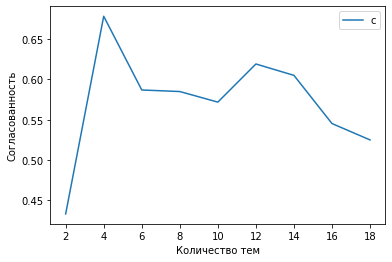

In [91]:
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [92]:
len(model_list)

9

In [105]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[5], corpus_bt, dictionary_bt)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.133201 -0.041748       1        1  10.372996
7     -0.140657 -0.089828       2        1   9.872701
4     -0.143019 -0.066265       3        1   9.284271
10    -0.051308 -0.041416       4        1   8.930780
3      0.092282  0.176673       5        1   8.592504
11    -0.096857 -0.005314       6        1   8.340693
0      0.100398  0.111273       7        1   8.326881
2     -0.058136 -0.030182       8        1   8.260416
6      0.104277  0.223894       9        1   7.755749
8      0.321821 -0.255536      10        1   7.437490
5     -0.002714  0.079766      11        1   6.764335
9      0.007113 -0.061317      12        1   6.061186, topic_info=     Category         Freq                                   Term  \
5503  Default  4324.000000                        client_whatsapp   
244   Default  3305.000000                        выдавать_ошибка   
1158  Default  3601.000000                                 пароль   
4789  Default  3054.000000                                   this   
5505  Default  3053.000000                                this_is   
5512  Default  3053.000000                              with_this   
5507  Default  3053.000000                               to_start   
5504  Default  3053.000000                         system_message   
233   Default  2647.000000                           рабочий_стол   
235   Default  2706.000000                              удалённый   
1671  Default  4934.000000                              поставщик   
1639  Default  2448.000000                       удалённый_доступ   
232   Default  2320.000000                                рабочий   
187   Default  4467.000000                                  зайти   
243   Default  2041.000000                               выдавать   
878   Default  2715.000000                           подключиться   
82    Default  2666.000000                                 доступ   
1946  Default  2575.000000                                принять   
646   Default  1895.000000                                      a   
2622  Default  1712.000000                               whatsapp   
1904  Default  1689.000000                                 system   
1899  Default  1687.000000                                message   
234   Default  1704.000000                                   стол   
3306  Default  1508.000000                             ошибка_пко   
4790  Default  1614.000000                                     to   
52    Default  1584.000000                                     is   
3035  Default  1568.000000                                 client   
132   Default  2401.000000                                   цена   
2504  Default  1538.000000                                  start   
5511  Default  1535.000000                                   with   
...       ...          ...                                    ...   
4288  Topic12   455.246979                        специалист_дать   
4290  Topic12   453.554108                     стараться_улучшить   
4286  Topic12   453.553955                               сервис_–   
414   Topic12   866.409302                                    пко   
681   Topic12   362.777252                                 family   
732   Topic12   313.752869                                   span   
654   Topic12   276.282166                                calibri   
2375  Topic12   415.642212                             смк_группа   
728   Topic12   244.167572                            serif_color   
662   Topic12   240.348618                                  color   
726   Topic12   238.771317                                  serif   
761   Topic12   243.797165                                оценить   
4289  Topic12   230.787247                              стараться   
3669  Topic12   229.917236                               улучшить   
2829  Topic12   226.953125 

In [100]:
model_list[1].get_document_topics(corpus_bt)[0]

[(0, 0.12545055), (1, 0.20613174), (2, 0.13187757), (3, 0.53654015)]

In [103]:
 model_list[1].get_topics()

array([[3.3896621e-03, 5.6661613e-04, 2.4193004e-03, ..., 5.0229773e-06,
        5.0077524e-06, 5.0093099e-06],
       [5.4080260e-06, 1.1946358e-03, 2.0538077e-03, ..., 3.9953939e-06,
        3.9735050e-06, 3.9744564e-06],
       [1.6714481e-05, 3.2173409e-04, 2.4938614e-03, ..., 7.2496987e-06,
        7.2395724e-06, 7.2426815e-06],
       [9.9738396e-04, 8.3608110e-04, 4.4113179e-03, ..., 4.0635769e-04,
        1.4203452e-04, 2.7950434e-04]], dtype=float32)

In [96]:
corpus_bt[0]

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 2),
 (8, 2),
 (9, 2),
 (10, 2)]

После нахождения наилучшей модели, с самой большой согласованность, сохраним ее и все сопутствующие к ней данные:
- Словарь,
- Корпус
- Устойчивые выражения

In [104]:
# Сохраняем модель
model_list[5].save('model/best_model.lda')
# Сохраняем словарь
from gensim import corpora
corpora.Dictionary.save(dictionary_bt, "model/dictionary.dict")
# Сохраняем корпус
corpora.BleiCorpus.save_corpus(fname="model/corpus.lda-c",corpus= corpus_bt)
# Сохраняем выражения 
bigram.save('./model/bigram.phs')
trigram.save('./model/trigram.phs')

In [222]:
!pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97715 sha256=a4834f767cfe6b16629ef2473c7c1241e5b5f91ab651c67ff0901195a04d1010
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=75219d64bf4fbf72d4ecc47802cf2af4f0eb2f4630ebfc43e5d3d6116483a709
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\20\5a\d8\1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [33]:
#Поиск доминирующей темы в каждом тексте
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [87]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus_bt, texts=text_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0            10.0              0.1860   
1            1             4.0              0.2585   
2            2             4.0              0.2085   
3            3             4.0              0.3119   
4            4             4.0              0.4789   
5            5             4.0              0.4789   
6            6             4.0              0.4954   
7            7             4.0              0.4954   
8            8             4.0              0.4954   
9            9             7.0              0.1620   

                                            Keywords  \
0  сервис, работа, данный_момент, дать, качество_...   
1  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
2  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
3  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
4  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
5  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
6  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
7  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
8  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
9  документ, просить_помочь, провести, отчёт, оши...   

                                                Text  
0  [сломаться, ноготь, сломать, ноготь, сломать, ...  
1  [сок, протечь, сломать, ноутбук, ерп, висеть, ...  
2  [работать, ерп, работать, ерп, ерп, упасть, на...  
3  [ерп, ерп, ерп, чинить, сволочь, зависнуть, ер...  
4  [висеть, ерп, висеть, ерп, весить, erp, висеть...  
5  [висеть, ерп, висеть, ерп, весить, erp, висеть...  
6  [загружаться, заказ, висеть, ерп, проверить, в...  
7  [загружаться, заказ, висеть, ерп, проверить, в...  
8  [загружаться, заказ, висеть, ерп, проверить, в...  
9  [заказ, загружаться, заказ, загружаться, заказ...

In [88]:
#Распределение тем по документам.
#Наконец, мы хотим понять объем и распределение тем, чтобы понять, насколько широко это обсуждалось.
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(20)

Dominant_Topic                                     Topic_Keywords  \
0             10.0  сервис, работа, данный_момент, дать, качество_...   
1              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
2              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
3              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
4              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
5              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
6              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
7              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
8              4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
9              7.0  документ, просить_помочь, провести, отчёт, оши...   
10             4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
11             4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
12             3.0  база, сервер, группа, группа_абд, 1с, самбрать...   
13             3.0  база, сервер, группа, группа_абд, 1с, самбрать...   
14             9.0  касса, поставщик, сей_пора, сервис_деск, 1с, п...   
15             9.0  касса, поставщик, сей_пора, сервис_деск, 1с, п...   
16             4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
17             4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
18             4.0  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
19             3.0  база, сервер, группа, группа_абд, 1с, самбрать...   

    Num_Documents  Perc_Documents  
0          1877.0          0.0525  
1          3424.0          0.0958  
2          2615.0          0.0731  
3          3329.0          0.0931  
4          4205.0          0.1176  
5          3084.0          0.0862  
6          4082.0          0.1142  
7          3231.0          0.0904  
8          1790.0          0.0501  
9          4472.0          0.1251  
10         2263.0          0.0633  
11         1386.0          0.0388  
12            NaN             NaN  
13            NaN             NaN  
14            NaN             NaN  
15            NaN             NaN  
16            NaN             NaN  
17            NaN             NaN  
18            NaN             NaN  
19            NaN             NaN

In [89]:
#Поиск наиболее представительного документа для каждой темы
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.8890   
1        1.0              0.9253   
2        2.0              0.8695   
3        3.0              0.9927   
4        4.0              0.8586   
5        5.0              0.8636   
6        6.0              0.9160   
7        7.0              0.8981   
8        8.0              0.9510   
9        9.0              0.7981   

                                            Keywords  \
0  подключиться_удалённый, подключиться, код, ссы...   
1  пароль, зайти, удалённый_доступ, доступ, учётн...   
2  позиция, рц, задача, поставщик, цб_рц, база, ч...   
3  база, сервер, группа, группа_абд, 1с, самбрать...   
4  выдавать_ошибка, фото_—, фото, ерп, выдавать, ...   
5  рабочий_стол, рабочий, удалённый, компьютер, с...   
6  принять, поставщик, всд, приёмка, эник, постав...   
7  документ, просить_помочь, провести, отчёт, оши...   
8  client_whatsapp, this, with_this, to_start, th...   
9  касса, поставщик, сей_пора, сервис_деск, 1с, п...   

                                                Text  
0  [подписание, документ, эцп, оператор, возникат...  
1  [ар00, ар00, ар00, ар00, ар00, ар00, ар00, ар0...  
2  [здравствовать, вопрос, заказ, поставщик, венг...  
3  [недоступный, база, вещевой, довольствие, srv,...  
4  [пз, кросс, док, кмс, реализация, товар, услуг...  
5  [здравствовать, работать, удалёнка, подключить...  
6  [здравствовать, выходить, вкладка, заполнить, ...  
7  [сп, поярковый, подсказать, значит, ставить, п...  
8  [this, is, system, message, which, allows, to,...  
9  [формироваться, отчёт, qlikview, сравнительный...